## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sys
from impyute.imputation.cs import fast_knn

In [2]:
df_train = pd.read_csv('train_data.csv')
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
df_train.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

### Missing data imputation using knn

In [4]:
df_train['products_purchased'] = fast_knn(df_train['products_purchased'].values.reshape(-1,1), k=70)

C:\Users\janhavi.kulkarni\.conda\envs\easyocr\lib\site-packages\impyute\imputation\cs\fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


In [5]:
# df_train.loc[df_train['products_purchased'].isna() == True, 'products_purchased'] = 0
df_train['signup_date'] = df_train['signup_date'].interpolate('linear')

In [6]:
df_train.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.000000,0.143723,0.222746,-0.027862,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,0.016137,-0.035218,-0.019808,0.001002,0.025785,-0.009223,-0.020762
campaign_var_1,0.143723,1.000000,0.561489,-0.014415,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,-0.087202
campaign_var_2,0.222746,0.561489,1.000000,0.021305,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,-0.080064
products_purchased,-0.027862,-0.014415,0.021305,1.000000,-0.009479,0.011023,0.000775,0.010831,-0.007867,0.001855,0.008707,-0.005779,0.008816,0.004380,-0.003545,-0.007717,0.004140
user_activity_var_1,0.012223,0.024100,-0.032969,-0.009479,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.011023,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.000775,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.010831,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706
user_activity_var_5,-0.006575,-0.023116,-0.030990,-0.007867,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972
user_activity_var_6,0.013992,0.029665,0.067304,0.001855,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951


In [7]:
df_train.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [8]:
y_train = df_train['buy']
df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_train['signup_date'] = pd.to_datetime(df_train['signup_date'])
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    18250 non-null  float64       
 5   signup_date           24048 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [10]:
df_train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [11]:
import seaborn as sns
df = df_train.drop(columns = ['created_at', 'signup_date', 'buy', 'id'], axis = 1)
l = df.columns
l

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

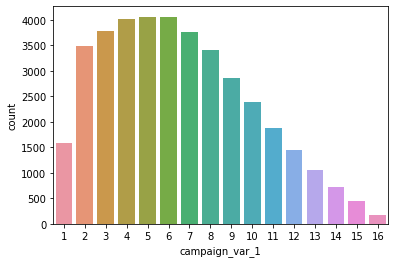

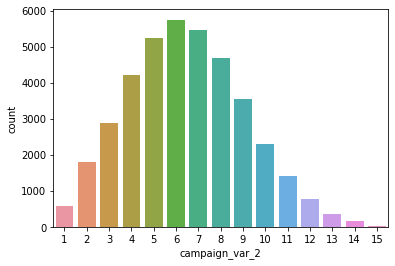

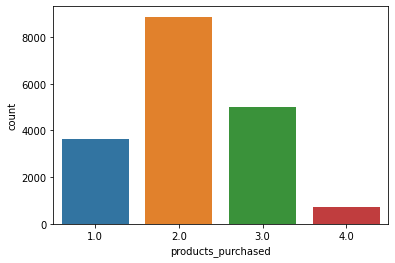

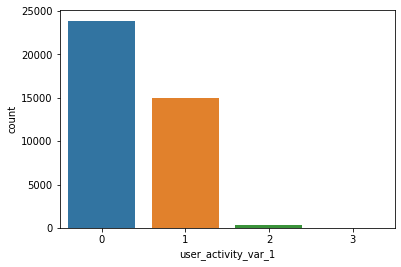

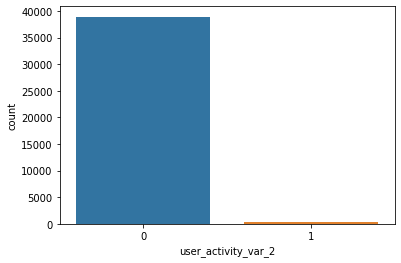

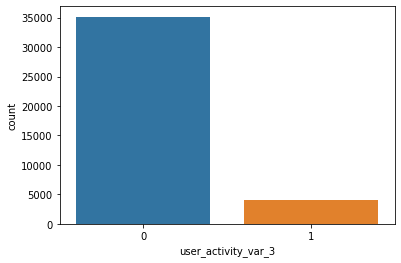

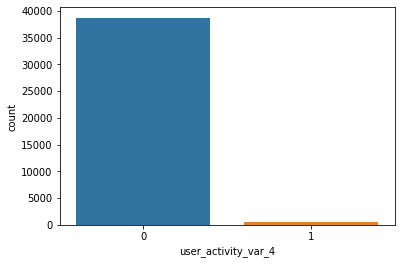

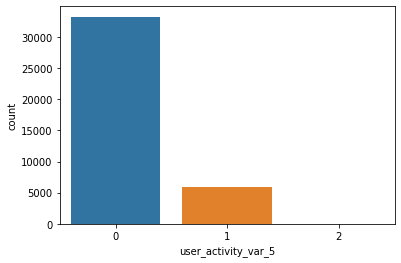

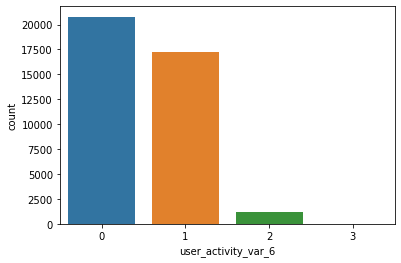

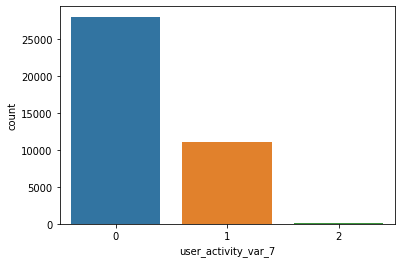

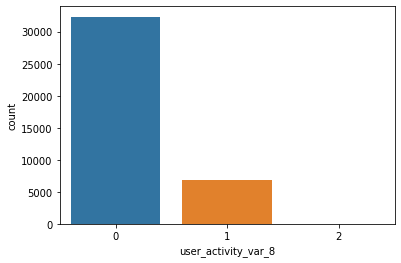

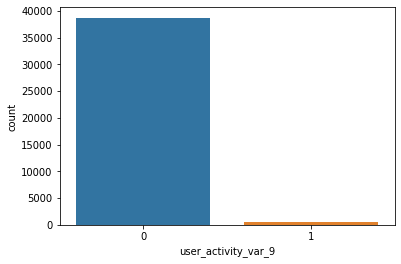

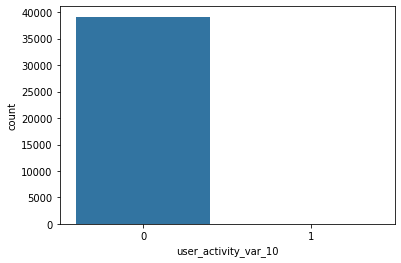

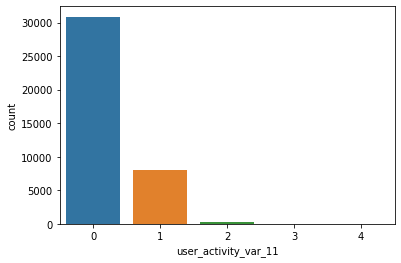

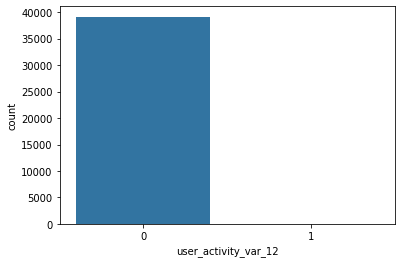

In [12]:
for col in l:
    sns.countplot(x = col, data = df_train)
    plt.show()

## Creating date features

In [13]:
df_train['month'] = df_train['created_at'].dt.month
df_train['day'] = df_train['created_at'].dt.day
df_train['week_day'] = df_train['created_at'].dt.dayofweek
df_train['day_year'] = df_train['created_at'].dt.dayofyear

df_train['month'] = df_train['signup_date'].dt.month
df_train['day'] = df_train['signup_date'].dt.day
df_train['week_day'] = df_train['signup_date'].dt.dayofweek
df_train['day_year'] = df_train['signup_date'].dt.dayofyear

In [15]:
X = df_train.drop(columns = ['created_at', 'signup_date', 'buy', 'id'], axis = 1)
# X = df_train[['user_activity_var_4', 'user_activity_var_5', 'user_activity_var_9', 'user_activity_var_11', 'month_sign']]
# X = pd.DataFrame(fast_knn(X.values, k=30))
y = df_train['buy']

## Modeling

In [16]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# #import plotly.offline as pyoff
# import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
# from multiscorer import MultiScorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=100, shuffle=True)

## XGBOOST

In [18]:
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(5)

In [19]:
parameter = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             #iid=False, 
                             cv=kfolds.split(X_train,y_train)
                            )

p_grid_search.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000026C6AD40C10>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interacti...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [20]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss', 
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1, 
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4,
                                      random_state = 101
                                     ).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.98
Accuracy of XGB classifier on test set: 0.98


In [21]:
df_test = pd.read_csv('test_data.csv')
df_test.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

In [22]:
df_test['products_purchased'] = fast_knn(df_test['products_purchased'].values.reshape(-1,1), k=70)
# df_test.loc[df_test['products_purchased'].isna() == True, 'products_purchased'] = 0
df_test['signup_date'] = df_test['signup_date'].interpolate('linear')

In [23]:
df_test['created_at'] = pd.to_datetime(df_test['created_at'])
df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])
df_test['month'] = df_test['created_at'].dt.month
df_test['day'] = df_test['created_at'].dt.day
df_test['week_day'] = df_test['created_at'].dt.dayofweek
df_test['day_year'] = df_test['created_at'].dt.dayofyear

df_test['month'] = df_test['signup_date'].dt.month
df_test['day'] = df_test['signup_date'].dt.day
df_test['week_day'] = df_test['signup_date'].dt.dayofweek
df_test['day_year'] = df_test['signup_date'].dt.dayofyear

In [24]:
X_pred = df_test.drop(columns = ['created_at', 'signup_date', 'id'], axis = 1)
# X_pred = df_test[['user_activity_var_4', 'user_activity_var_5', 'user_activity_var_9', 'user_activity_var_11', 'month_sign']]

In [25]:
y_pred = refined_xgb_model.predict(X_pred)

In [28]:
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['buy'] = y_pred
prediction.to_csv('predictions_xgb_102.csv', index = False)

## LightGBM

In [26]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(random_state = 101)
parameters = {'num_leaves':[80,100, 60, 40], 'min_child_samples':[10,15, 5],'max_depth':[2,5,6],
             'learning_rate':[0.1],'reg_alpha':[0.1,0.01,0.03]}
#Define the scoring
clf=GridSearchCV(lgb,parameters,scoring='accuracy', cv=kfolds.split(X_train,y_train))
clf.fit(X=X_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))

{'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 10, 'num_leaves': 60, 'reg_alpha': 0.01}
Classification of the result is:
0.9759989786799438


In [30]:
y_pred = clf.predict(X_pred)
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['buy'] = y_pred
prediction.to_csv('predictions_lgb_102.csv', index = False)

### Here I found that LGBM was the best performing model, hence final submission was done using the same model

## Histgbm

In [27]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state = 101)
parameters_hgb = [{'max_iter': [1000,1200,1500, 100, 500],
                'learning_rate': [0.1, 0.05, 0.5],
                'max_depth' : range(3,10,2),
                'scoring': ['f1_micro']}]
grid_search_hgb = GridSearchCV(estimator = model,
                           param_grid = parameters_hgb,
                           scoring = 'accuracy',
                           cv=kfolds.split(X_train,y_train),
                           n_jobs = -1)
grid_search_hgb.fit(X_train, y_train)
best_accuracy_hgb = grid_search_hgb.best_score_
best_paramaeter_hgb = grid_search_hgb.best_params_
print("Best Accuracy of HGB: {:.2f} %".format(best_accuracy_hgb.mean()*100))
print("Best Parameter of HGB:", best_paramaeter_hgb) 

Best Accuracy of HGB: 97.42 %
Best Parameter of HGB: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 1000, 'scoring': 'f1_micro'}


In [28]:
y_pred = grid_search_hgb.predict(X_pred)

In [33]:
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['buy'] = y_pred
prediction.to_csv('predictions_hist_101.csv', index = False)

## Catboost

In [29]:
from catboost import CatBoostClassifier

In [30]:
model = CatBoostClassifier()

grid = {'learning_rate': [0.05, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,
                                       cv=kfolds.split(X_train,y_train),
                                       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6189791	test: 0.6184614	best: 0.6184614 (0)	total: 150ms	remaining: 2m 29s
1:	learn: 0.5290620	test: 0.5277087	best: 0.5277087 (1)	total: 164ms	remaining: 1m 21s
2:	learn: 0.4704908	test: 0.4686465	best: 0.4686465 (2)	total: 174ms	remaining: 57.9s
3:	learn: 0.4205769	test: 0.4184882	best: 0.4184882 (3)	total: 183ms	remaining: 45.5s
4:	learn: 0.3765229	test: 0.3739026	best: 0.3739026 (4)	total: 196ms	remaining: 39.1s
5:	learn: 0.3423218	test: 0.3391345	best: 0.3391345 (5)	total: 206ms	remaining: 34s
6:	learn: 0.3127956	test: 0.3093448	best: 0.3093448 (6)	total: 214ms	remaining: 30.4s
7:	learn: 0.2876543	test: 0.2839493	best: 0.2839493 (7)	total: 224ms	remaining: 27.8s
8:	learn: 0.2660326	test: 0.2619531	best: 0.2619531 (8)	total: 236ms	remaining: 25.9s
9:	learn: 0.2486520	test: 0.2444039	best: 0.2444039 (9)	total: 244ms	remaining: 24.2s
10:	learn: 0.2323395	test: 0.2278743	best: 0.2278743 (10)	total: 253ms	remaining: 22.7s
11:	learn: 0.2160653	test: 0.2112525	best: 0.2112525

109:	learn: 0.0909632	test: 0.0796315	best: 0.0796315 (109)	total: 1.31s	remaining: 10.6s
110:	learn: 0.0908659	test: 0.0795418	best: 0.0795418 (110)	total: 1.32s	remaining: 10.6s
111:	learn: 0.0907659	test: 0.0794475	best: 0.0794475 (111)	total: 1.33s	remaining: 10.6s
112:	learn: 0.0906783	test: 0.0793673	best: 0.0793673 (112)	total: 1.34s	remaining: 10.5s
113:	learn: 0.0905953	test: 0.0792618	best: 0.0792618 (113)	total: 1.35s	remaining: 10.5s
114:	learn: 0.0905182	test: 0.0791949	best: 0.0791949 (114)	total: 1.36s	remaining: 10.5s
115:	learn: 0.0904085	test: 0.0790828	best: 0.0790828 (115)	total: 1.38s	remaining: 10.5s
116:	learn: 0.0903625	test: 0.0790599	best: 0.0790599 (116)	total: 1.38s	remaining: 10.4s
117:	learn: 0.0903310	test: 0.0790322	best: 0.0790322 (117)	total: 1.39s	remaining: 10.4s
118:	learn: 0.0902001	test: 0.0789073	best: 0.0789073 (118)	total: 1.4s	remaining: 10.4s
119:	learn: 0.0901777	test: 0.0788925	best: 0.0788925 (119)	total: 1.41s	remaining: 10.4s
120:	learn:

212:	learn: 0.0862732	test: 0.0761211	best: 0.0761211 (212)	total: 2.45s	remaining: 9.05s
213:	learn: 0.0862146	test: 0.0761077	best: 0.0761077 (213)	total: 2.46s	remaining: 9.03s
214:	learn: 0.0861995	test: 0.0760886	best: 0.0760886 (214)	total: 2.47s	remaining: 9.01s
215:	learn: 0.0861802	test: 0.0760421	best: 0.0760421 (215)	total: 2.48s	remaining: 9.01s
216:	learn: 0.0861353	test: 0.0760117	best: 0.0760117 (216)	total: 2.49s	remaining: 8.99s
217:	learn: 0.0860962	test: 0.0759767	best: 0.0759767 (217)	total: 2.5s	remaining: 8.97s
218:	learn: 0.0860725	test: 0.0760203	best: 0.0759767 (217)	total: 2.51s	remaining: 8.95s
219:	learn: 0.0860344	test: 0.0759787	best: 0.0759767 (217)	total: 2.53s	remaining: 8.97s
220:	learn: 0.0859765	test: 0.0759662	best: 0.0759662 (220)	total: 2.54s	remaining: 8.96s
221:	learn: 0.0859362	test: 0.0759366	best: 0.0759366 (221)	total: 2.55s	remaining: 8.94s
222:	learn: 0.0858869	test: 0.0759301	best: 0.0759301 (222)	total: 2.57s	remaining: 8.95s
223:	learn:

321:	learn: 0.0831544	test: 0.0754165	best: 0.0754165 (321)	total: 3.62s	remaining: 7.62s
322:	learn: 0.0831370	test: 0.0754318	best: 0.0754165 (321)	total: 3.63s	remaining: 7.6s
323:	learn: 0.0831249	test: 0.0754373	best: 0.0754165 (321)	total: 3.63s	remaining: 7.58s
324:	learn: 0.0831122	test: 0.0754463	best: 0.0754165 (321)	total: 3.65s	remaining: 7.57s
325:	learn: 0.0830897	test: 0.0754543	best: 0.0754165 (321)	total: 3.66s	remaining: 7.56s
326:	learn: 0.0830797	test: 0.0754564	best: 0.0754165 (321)	total: 3.67s	remaining: 7.55s
327:	learn: 0.0830137	test: 0.0754274	best: 0.0754165 (321)	total: 3.68s	remaining: 7.53s
328:	learn: 0.0829994	test: 0.0754294	best: 0.0754165 (321)	total: 3.68s	remaining: 7.51s
329:	learn: 0.0829724	test: 0.0754315	best: 0.0754165 (321)	total: 3.69s	remaining: 7.5s
330:	learn: 0.0829490	test: 0.0754186	best: 0.0754165 (321)	total: 3.7s	remaining: 7.48s
331:	learn: 0.0829145	test: 0.0754239	best: 0.0754165 (321)	total: 3.71s	remaining: 7.47s
332:	learn: 0

416:	learn: 0.0809876	test: 0.0755303	best: 0.0753996 (351)	total: 4.61s	remaining: 6.45s
417:	learn: 0.0809633	test: 0.0755264	best: 0.0753996 (351)	total: 4.62s	remaining: 6.43s
418:	learn: 0.0809531	test: 0.0755265	best: 0.0753996 (351)	total: 4.63s	remaining: 6.42s
419:	learn: 0.0809359	test: 0.0755311	best: 0.0753996 (351)	total: 4.64s	remaining: 6.41s
420:	learn: 0.0809147	test: 0.0755390	best: 0.0753996 (351)	total: 4.66s	remaining: 6.4s
421:	learn: 0.0809105	test: 0.0755331	best: 0.0753996 (351)	total: 4.67s	remaining: 6.39s
422:	learn: 0.0809057	test: 0.0755235	best: 0.0753996 (351)	total: 4.68s	remaining: 6.39s
423:	learn: 0.0808752	test: 0.0755553	best: 0.0753996 (351)	total: 4.69s	remaining: 6.38s
424:	learn: 0.0808363	test: 0.0755479	best: 0.0753996 (351)	total: 4.7s	remaining: 6.36s
425:	learn: 0.0808089	test: 0.0755694	best: 0.0753996 (351)	total: 4.71s	remaining: 6.35s
426:	learn: 0.0807847	test: 0.0755546	best: 0.0753996 (351)	total: 4.74s	remaining: 6.35s
427:	learn: 

509:	learn: 0.0790097	test: 0.0759794	best: 0.0753996 (351)	total: 5.61s	remaining: 5.39s
510:	learn: 0.0789675	test: 0.0759908	best: 0.0753996 (351)	total: 5.62s	remaining: 5.37s
511:	learn: 0.0789310	test: 0.0759989	best: 0.0753996 (351)	total: 5.63s	remaining: 5.36s
512:	learn: 0.0789245	test: 0.0759923	best: 0.0753996 (351)	total: 5.63s	remaining: 5.35s
513:	learn: 0.0789131	test: 0.0759891	best: 0.0753996 (351)	total: 5.65s	remaining: 5.34s
514:	learn: 0.0788972	test: 0.0759984	best: 0.0753996 (351)	total: 5.66s	remaining: 5.33s
515:	learn: 0.0788938	test: 0.0759954	best: 0.0753996 (351)	total: 5.67s	remaining: 5.32s
516:	learn: 0.0788866	test: 0.0759950	best: 0.0753996 (351)	total: 5.68s	remaining: 5.3s
517:	learn: 0.0788817	test: 0.0759887	best: 0.0753996 (351)	total: 5.69s	remaining: 5.29s
518:	learn: 0.0788651	test: 0.0759796	best: 0.0753996 (351)	total: 5.7s	remaining: 5.28s
519:	learn: 0.0788469	test: 0.0759675	best: 0.0753996 (351)	total: 5.71s	remaining: 5.27s
520:	learn: 

602:	learn: 0.0771381	test: 0.0761673	best: 0.0753996 (351)	total: 6.57s	remaining: 4.33s
603:	learn: 0.0771313	test: 0.0761601	best: 0.0753996 (351)	total: 6.58s	remaining: 4.31s
604:	learn: 0.0771144	test: 0.0761817	best: 0.0753996 (351)	total: 6.59s	remaining: 4.3s
605:	learn: 0.0771073	test: 0.0761735	best: 0.0753996 (351)	total: 6.6s	remaining: 4.29s
606:	learn: 0.0770909	test: 0.0761910	best: 0.0753996 (351)	total: 6.61s	remaining: 4.28s
607:	learn: 0.0770746	test: 0.0762004	best: 0.0753996 (351)	total: 6.62s	remaining: 4.27s
608:	learn: 0.0770533	test: 0.0762007	best: 0.0753996 (351)	total: 6.63s	remaining: 4.26s
609:	learn: 0.0770255	test: 0.0761905	best: 0.0753996 (351)	total: 6.64s	remaining: 4.25s
610:	learn: 0.0769995	test: 0.0762154	best: 0.0753996 (351)	total: 6.65s	remaining: 4.24s
611:	learn: 0.0769779	test: 0.0762125	best: 0.0753996 (351)	total: 6.66s	remaining: 4.22s
612:	learn: 0.0769645	test: 0.0762153	best: 0.0753996 (351)	total: 6.67s	remaining: 4.21s
613:	learn: 

710:	learn: 0.0752918	test: 0.0765173	best: 0.0753996 (351)	total: 7.71s	remaining: 3.13s
711:	learn: 0.0752810	test: 0.0765352	best: 0.0753996 (351)	total: 7.72s	remaining: 3.12s
712:	learn: 0.0752777	test: 0.0765282	best: 0.0753996 (351)	total: 7.74s	remaining: 3.12s
713:	learn: 0.0752723	test: 0.0765209	best: 0.0753996 (351)	total: 7.75s	remaining: 3.1s
714:	learn: 0.0752603	test: 0.0765294	best: 0.0753996 (351)	total: 7.76s	remaining: 3.09s
715:	learn: 0.0752382	test: 0.0765338	best: 0.0753996 (351)	total: 7.77s	remaining: 3.08s
716:	learn: 0.0752351	test: 0.0765272	best: 0.0753996 (351)	total: 7.78s	remaining: 3.07s
717:	learn: 0.0752150	test: 0.0765295	best: 0.0753996 (351)	total: 7.79s	remaining: 3.06s
718:	learn: 0.0752098	test: 0.0765426	best: 0.0753996 (351)	total: 7.8s	remaining: 3.05s
719:	learn: 0.0751839	test: 0.0765640	best: 0.0753996 (351)	total: 7.81s	remaining: 3.04s
720:	learn: 0.0751649	test: 0.0765500	best: 0.0753996 (351)	total: 7.82s	remaining: 3.02s
721:	learn: 

817:	learn: 0.0738408	test: 0.0770327	best: 0.0753996 (351)	total: 8.86s	remaining: 1.97s
818:	learn: 0.0738215	test: 0.0770410	best: 0.0753996 (351)	total: 8.87s	remaining: 1.96s
819:	learn: 0.0738174	test: 0.0770414	best: 0.0753996 (351)	total: 8.88s	remaining: 1.95s
820:	learn: 0.0738084	test: 0.0770443	best: 0.0753996 (351)	total: 8.89s	remaining: 1.94s
821:	learn: 0.0738044	test: 0.0770460	best: 0.0753996 (351)	total: 8.9s	remaining: 1.93s
822:	learn: 0.0737958	test: 0.0770492	best: 0.0753996 (351)	total: 8.91s	remaining: 1.92s
823:	learn: 0.0737827	test: 0.0770365	best: 0.0753996 (351)	total: 8.93s	remaining: 1.91s
824:	learn: 0.0737586	test: 0.0770771	best: 0.0753996 (351)	total: 8.94s	remaining: 1.9s
825:	learn: 0.0737524	test: 0.0770955	best: 0.0753996 (351)	total: 8.95s	remaining: 1.88s
826:	learn: 0.0737454	test: 0.0770974	best: 0.0753996 (351)	total: 8.96s	remaining: 1.87s
827:	learn: 0.0737293	test: 0.0770912	best: 0.0753996 (351)	total: 8.97s	remaining: 1.86s
828:	learn: 

909:	learn: 0.0726849	test: 0.0773832	best: 0.0753996 (351)	total: 9.82s	remaining: 971ms
910:	learn: 0.0726749	test: 0.0773828	best: 0.0753996 (351)	total: 9.83s	remaining: 960ms
911:	learn: 0.0726708	test: 0.0773848	best: 0.0753996 (351)	total: 9.84s	remaining: 950ms
912:	learn: 0.0726607	test: 0.0773753	best: 0.0753996 (351)	total: 9.85s	remaining: 939ms
913:	learn: 0.0726396	test: 0.0773920	best: 0.0753996 (351)	total: 9.86s	remaining: 928ms
914:	learn: 0.0726357	test: 0.0773970	best: 0.0753996 (351)	total: 9.87s	remaining: 917ms
915:	learn: 0.0726216	test: 0.0774169	best: 0.0753996 (351)	total: 9.88s	remaining: 906ms
916:	learn: 0.0726054	test: 0.0774479	best: 0.0753996 (351)	total: 9.89s	remaining: 896ms
917:	learn: 0.0725913	test: 0.0774351	best: 0.0753996 (351)	total: 9.9s	remaining: 885ms
918:	learn: 0.0725749	test: 0.0774152	best: 0.0753996 (351)	total: 9.92s	remaining: 874ms
919:	learn: 0.0725689	test: 0.0774270	best: 0.0753996 (351)	total: 9.93s	remaining: 863ms
920:	learn:

14:	learn: 0.1130061	test: 0.1040118	best: 0.1040118 (14)	total: 150ms	remaining: 9.85s
15:	learn: 0.1109042	test: 0.1016844	best: 0.1016844 (15)	total: 161ms	remaining: 9.9s
16:	learn: 0.1080543	test: 0.0986183	best: 0.0986183 (16)	total: 174ms	remaining: 10.1s
17:	learn: 0.1052920	test: 0.0956364	best: 0.0956364 (17)	total: 184ms	remaining: 10.1s
18:	learn: 0.1042783	test: 0.0944517	best: 0.0944517 (18)	total: 193ms	remaining: 9.98s
19:	learn: 0.1032748	test: 0.0933126	best: 0.0933126 (19)	total: 204ms	remaining: 9.99s
20:	learn: 0.1019144	test: 0.0918746	best: 0.0918746 (20)	total: 218ms	remaining: 10.2s
21:	learn: 0.1010161	test: 0.0908377	best: 0.0908377 (21)	total: 228ms	remaining: 10.1s
22:	learn: 0.1003837	test: 0.0902040	best: 0.0902040 (22)	total: 237ms	remaining: 10.1s
23:	learn: 0.0998943	test: 0.0897009	best: 0.0897009 (23)	total: 247ms	remaining: 10.1s
24:	learn: 0.0987691	test: 0.0884014	best: 0.0884014 (24)	total: 256ms	remaining: 10s
25:	learn: 0.0984434	test: 0.088064

118:	learn: 0.0853173	test: 0.0760703	best: 0.0760703 (118)	total: 1.3s	remaining: 9.66s
119:	learn: 0.0852715	test: 0.0760542	best: 0.0760542 (119)	total: 1.31s	remaining: 9.64s
120:	learn: 0.0852071	test: 0.0760606	best: 0.0760542 (119)	total: 1.32s	remaining: 9.63s
121:	learn: 0.0851554	test: 0.0760772	best: 0.0760542 (119)	total: 1.34s	remaining: 9.63s
122:	learn: 0.0851309	test: 0.0760839	best: 0.0760542 (119)	total: 1.35s	remaining: 9.6s
123:	learn: 0.0850673	test: 0.0760492	best: 0.0760492 (123)	total: 1.36s	remaining: 9.59s
124:	learn: 0.0850208	test: 0.0759816	best: 0.0759816 (124)	total: 1.37s	remaining: 9.58s
125:	learn: 0.0849496	test: 0.0759744	best: 0.0759744 (125)	total: 1.4s	remaining: 9.7s
126:	learn: 0.0848602	test: 0.0759264	best: 0.0759264 (126)	total: 1.41s	remaining: 9.68s
127:	learn: 0.0848086	test: 0.0758964	best: 0.0758964 (127)	total: 1.42s	remaining: 9.68s
128:	learn: 0.0847567	test: 0.0759152	best: 0.0758964 (127)	total: 1.44s	remaining: 9.71s
129:	learn: 0.

222:	learn: 0.0799802	test: 0.0762236	best: 0.0756630 (164)	total: 2.45s	remaining: 8.52s
223:	learn: 0.0799340	test: 0.0762122	best: 0.0756630 (164)	total: 2.46s	remaining: 8.51s
224:	learn: 0.0798902	test: 0.0762208	best: 0.0756630 (164)	total: 2.47s	remaining: 8.5s
225:	learn: 0.0798049	test: 0.0762470	best: 0.0756630 (164)	total: 2.48s	remaining: 8.49s
226:	learn: 0.0797645	test: 0.0762244	best: 0.0756630 (164)	total: 2.49s	remaining: 8.48s
227:	learn: 0.0797251	test: 0.0762192	best: 0.0756630 (164)	total: 2.5s	remaining: 8.48s
228:	learn: 0.0797098	test: 0.0762118	best: 0.0756630 (164)	total: 2.51s	remaining: 8.46s
229:	learn: 0.0796737	test: 0.0762329	best: 0.0756630 (164)	total: 2.52s	remaining: 8.45s
230:	learn: 0.0796540	test: 0.0762338	best: 0.0756630 (164)	total: 2.54s	remaining: 8.44s
231:	learn: 0.0796421	test: 0.0762427	best: 0.0756630 (164)	total: 2.54s	remaining: 8.43s
232:	learn: 0.0795927	test: 0.0762754	best: 0.0756630 (164)	total: 2.56s	remaining: 8.42s
233:	learn: 

327:	learn: 0.0758169	test: 0.0766029	best: 0.0756630 (164)	total: 3.61s	remaining: 7.41s
328:	learn: 0.0757847	test: 0.0766141	best: 0.0756630 (164)	total: 3.62s	remaining: 7.39s
329:	learn: 0.0757608	test: 0.0766108	best: 0.0756630 (164)	total: 3.63s	remaining: 7.38s
330:	learn: 0.0757446	test: 0.0766343	best: 0.0756630 (164)	total: 3.65s	remaining: 7.37s
331:	learn: 0.0757103	test: 0.0766566	best: 0.0756630 (164)	total: 3.66s	remaining: 7.36s
332:	learn: 0.0756561	test: 0.0766976	best: 0.0756630 (164)	total: 3.67s	remaining: 7.35s
333:	learn: 0.0756424	test: 0.0767222	best: 0.0756630 (164)	total: 3.68s	remaining: 7.34s
334:	learn: 0.0755733	test: 0.0767224	best: 0.0756630 (164)	total: 3.69s	remaining: 7.33s
335:	learn: 0.0755503	test: 0.0767409	best: 0.0756630 (164)	total: 3.7s	remaining: 7.31s
336:	learn: 0.0755185	test: 0.0767438	best: 0.0756630 (164)	total: 3.72s	remaining: 7.32s
337:	learn: 0.0755073	test: 0.0767680	best: 0.0756630 (164)	total: 3.73s	remaining: 7.3s
338:	learn: 

434:	learn: 0.0727265	test: 0.0775333	best: 0.0756630 (164)	total: 4.79s	remaining: 6.22s
435:	learn: 0.0727021	test: 0.0775300	best: 0.0756630 (164)	total: 4.8s	remaining: 6.21s
436:	learn: 0.0726913	test: 0.0775449	best: 0.0756630 (164)	total: 4.81s	remaining: 6.19s
437:	learn: 0.0726670	test: 0.0775458	best: 0.0756630 (164)	total: 4.82s	remaining: 6.18s
438:	learn: 0.0726361	test: 0.0775839	best: 0.0756630 (164)	total: 4.83s	remaining: 6.17s
439:	learn: 0.0725896	test: 0.0776531	best: 0.0756630 (164)	total: 4.84s	remaining: 6.16s
440:	learn: 0.0725619	test: 0.0776249	best: 0.0756630 (164)	total: 4.85s	remaining: 6.15s
441:	learn: 0.0725477	test: 0.0776125	best: 0.0756630 (164)	total: 4.86s	remaining: 6.14s
442:	learn: 0.0725218	test: 0.0776514	best: 0.0756630 (164)	total: 4.88s	remaining: 6.13s
443:	learn: 0.0724834	test: 0.0777185	best: 0.0756630 (164)	total: 4.89s	remaining: 6.12s
444:	learn: 0.0724621	test: 0.0776955	best: 0.0756630 (164)	total: 4.9s	remaining: 6.11s
445:	learn: 

538:	learn: 0.0702315	test: 0.0785103	best: 0.0756630 (164)	total: 5.93s	remaining: 5.08s
539:	learn: 0.0702187	test: 0.0785037	best: 0.0756630 (164)	total: 5.94s	remaining: 5.06s
540:	learn: 0.0701845	test: 0.0784953	best: 0.0756630 (164)	total: 5.95s	remaining: 5.05s
541:	learn: 0.0701700	test: 0.0785140	best: 0.0756630 (164)	total: 5.96s	remaining: 5.04s
542:	learn: 0.0701384	test: 0.0785635	best: 0.0756630 (164)	total: 5.97s	remaining: 5.03s
543:	learn: 0.0701145	test: 0.0785728	best: 0.0756630 (164)	total: 5.98s	remaining: 5.01s
544:	learn: 0.0700916	test: 0.0785673	best: 0.0756630 (164)	total: 5.99s	remaining: 5s
545:	learn: 0.0700680	test: 0.0785407	best: 0.0756630 (164)	total: 6s	remaining: 4.99s
546:	learn: 0.0700417	test: 0.0785893	best: 0.0756630 (164)	total: 6.01s	remaining: 4.98s
547:	learn: 0.0700214	test: 0.0785988	best: 0.0756630 (164)	total: 6.02s	remaining: 4.97s
548:	learn: 0.0699835	test: 0.0786306	best: 0.0756630 (164)	total: 6.03s	remaining: 4.96s
549:	learn: 0.06

643:	learn: 0.0677555	test: 0.0796065	best: 0.0756630 (164)	total: 7.08s	remaining: 3.91s
644:	learn: 0.0677024	test: 0.0797028	best: 0.0756630 (164)	total: 7.09s	remaining: 3.9s
645:	learn: 0.0676914	test: 0.0796915	best: 0.0756630 (164)	total: 7.1s	remaining: 3.89s
646:	learn: 0.0676753	test: 0.0796948	best: 0.0756630 (164)	total: 7.11s	remaining: 3.88s
647:	learn: 0.0676592	test: 0.0796992	best: 0.0756630 (164)	total: 7.12s	remaining: 3.87s
648:	learn: 0.0676302	test: 0.0797301	best: 0.0756630 (164)	total: 7.13s	remaining: 3.85s
649:	learn: 0.0676027	test: 0.0797407	best: 0.0756630 (164)	total: 7.14s	remaining: 3.84s
650:	learn: 0.0675932	test: 0.0797307	best: 0.0756630 (164)	total: 7.15s	remaining: 3.83s
651:	learn: 0.0675735	test: 0.0797665	best: 0.0756630 (164)	total: 7.16s	remaining: 3.82s
652:	learn: 0.0675540	test: 0.0797572	best: 0.0756630 (164)	total: 7.17s	remaining: 3.81s
653:	learn: 0.0675287	test: 0.0797865	best: 0.0756630 (164)	total: 7.18s	remaining: 3.8s
654:	learn: 0

748:	learn: 0.0656683	test: 0.0804140	best: 0.0756630 (164)	total: 8.22s	remaining: 2.76s
749:	learn: 0.0656661	test: 0.0804171	best: 0.0756630 (164)	total: 8.23s	remaining: 2.74s
750:	learn: 0.0656594	test: 0.0804121	best: 0.0756630 (164)	total: 8.24s	remaining: 2.73s
751:	learn: 0.0656447	test: 0.0804027	best: 0.0756630 (164)	total: 8.26s	remaining: 2.72s
752:	learn: 0.0656276	test: 0.0803996	best: 0.0756630 (164)	total: 8.27s	remaining: 2.71s
753:	learn: 0.0656148	test: 0.0804010	best: 0.0756630 (164)	total: 8.28s	remaining: 2.7s
754:	learn: 0.0655931	test: 0.0804328	best: 0.0756630 (164)	total: 8.29s	remaining: 2.69s
755:	learn: 0.0655654	test: 0.0804548	best: 0.0756630 (164)	total: 8.3s	remaining: 2.68s
756:	learn: 0.0655514	test: 0.0804613	best: 0.0756630 (164)	total: 8.31s	remaining: 2.67s
757:	learn: 0.0655274	test: 0.0804887	best: 0.0756630 (164)	total: 8.32s	remaining: 2.66s
758:	learn: 0.0655008	test: 0.0804961	best: 0.0756630 (164)	total: 8.34s	remaining: 2.65s
759:	learn: 

853:	learn: 0.0636181	test: 0.0809705	best: 0.0756630 (164)	total: 9.41s	remaining: 1.61s
854:	learn: 0.0636142	test: 0.0809770	best: 0.0756630 (164)	total: 9.42s	remaining: 1.6s
855:	learn: 0.0636025	test: 0.0809759	best: 0.0756630 (164)	total: 9.43s	remaining: 1.58s
856:	learn: 0.0635914	test: 0.0809700	best: 0.0756630 (164)	total: 9.44s	remaining: 1.57s
857:	learn: 0.0635653	test: 0.0810531	best: 0.0756630 (164)	total: 9.45s	remaining: 1.56s
858:	learn: 0.0635585	test: 0.0810528	best: 0.0756630 (164)	total: 9.46s	remaining: 1.55s
859:	learn: 0.0635472	test: 0.0810501	best: 0.0756630 (164)	total: 9.47s	remaining: 1.54s
860:	learn: 0.0635310	test: 0.0810438	best: 0.0756630 (164)	total: 9.48s	remaining: 1.53s
861:	learn: 0.0635229	test: 0.0810468	best: 0.0756630 (164)	total: 9.49s	remaining: 1.52s
862:	learn: 0.0635183	test: 0.0810425	best: 0.0756630 (164)	total: 9.5s	remaining: 1.51s
863:	learn: 0.0635045	test: 0.0810330	best: 0.0756630 (164)	total: 9.51s	remaining: 1.5s
864:	learn: 0

945:	learn: 0.0621364	test: 0.0816851	best: 0.0756630 (164)	total: 10.4s	remaining: 592ms
946:	learn: 0.0621258	test: 0.0816841	best: 0.0756630 (164)	total: 10.4s	remaining: 581ms
947:	learn: 0.0621113	test: 0.0816809	best: 0.0756630 (164)	total: 10.4s	remaining: 570ms
948:	learn: 0.0621034	test: 0.0816921	best: 0.0756630 (164)	total: 10.4s	remaining: 559ms
949:	learn: 0.0620993	test: 0.0817020	best: 0.0756630 (164)	total: 10.4s	remaining: 548ms
950:	learn: 0.0620815	test: 0.0816966	best: 0.0756630 (164)	total: 10.4s	remaining: 537ms
951:	learn: 0.0620743	test: 0.0817019	best: 0.0756630 (164)	total: 10.4s	remaining: 526ms
952:	learn: 0.0620402	test: 0.0816781	best: 0.0756630 (164)	total: 10.4s	remaining: 515ms
953:	learn: 0.0620367	test: 0.0816772	best: 0.0756630 (164)	total: 10.5s	remaining: 504ms
954:	learn: 0.0620257	test: 0.0816833	best: 0.0756630 (164)	total: 10.5s	remaining: 493ms
955:	learn: 0.0620209	test: 0.0816867	best: 0.0756630 (164)	total: 10.5s	remaining: 482ms
956:	learn

55:	learn: 0.0976655	test: 0.0870582	best: 0.0870582 (55)	total: 573ms	remaining: 9.65s
56:	learn: 0.0973401	test: 0.0866626	best: 0.0866626 (56)	total: 582ms	remaining: 9.63s
57:	learn: 0.0971039	test: 0.0864312	best: 0.0864312 (57)	total: 595ms	remaining: 9.66s
58:	learn: 0.0969930	test: 0.0862586	best: 0.0862586 (58)	total: 604ms	remaining: 9.63s
59:	learn: 0.0967003	test: 0.0859224	best: 0.0859224 (59)	total: 614ms	remaining: 9.62s
60:	learn: 0.0964167	test: 0.0856309	best: 0.0856309 (60)	total: 628ms	remaining: 9.67s
61:	learn: 0.0963389	test: 0.0855407	best: 0.0855407 (61)	total: 637ms	remaining: 9.63s
62:	learn: 0.0962552	test: 0.0854608	best: 0.0854608 (62)	total: 646ms	remaining: 9.62s
63:	learn: 0.0959942	test: 0.0851404	best: 0.0851404 (63)	total: 656ms	remaining: 9.59s
64:	learn: 0.0958152	test: 0.0849568	best: 0.0849568 (64)	total: 666ms	remaining: 9.59s
65:	learn: 0.0957634	test: 0.0849241	best: 0.0849241 (65)	total: 680ms	remaining: 9.63s
66:	learn: 0.0957349	test: 0.084

157:	learn: 0.0886083	test: 0.0773599	best: 0.0773599 (157)	total: 1.7s	remaining: 9.07s
158:	learn: 0.0885665	test: 0.0773156	best: 0.0773156 (158)	total: 1.71s	remaining: 9.06s
159:	learn: 0.0885338	test: 0.0773062	best: 0.0773062 (159)	total: 1.73s	remaining: 9.06s
160:	learn: 0.0885072	test: 0.0772682	best: 0.0772682 (160)	total: 1.74s	remaining: 9.05s
161:	learn: 0.0884604	test: 0.0772546	best: 0.0772546 (161)	total: 1.75s	remaining: 9.05s
162:	learn: 0.0884382	test: 0.0772432	best: 0.0772432 (162)	total: 1.76s	remaining: 9.04s
163:	learn: 0.0883953	test: 0.0772044	best: 0.0772044 (163)	total: 1.77s	remaining: 9.04s
164:	learn: 0.0883589	test: 0.0771555	best: 0.0771555 (164)	total: 1.78s	remaining: 9.02s
165:	learn: 0.0883390	test: 0.0771397	best: 0.0771397 (165)	total: 1.79s	remaining: 9.01s
166:	learn: 0.0883102	test: 0.0771525	best: 0.0771397 (165)	total: 1.8s	remaining: 9s
167:	learn: 0.0882798	test: 0.0771012	best: 0.0771012 (167)	total: 1.81s	remaining: 8.98s
168:	learn: 0.0

261:	learn: 0.0852720	test: 0.0758658	best: 0.0758658 (261)	total: 2.86s	remaining: 8.06s
262:	learn: 0.0852336	test: 0.0758658	best: 0.0758658 (262)	total: 2.87s	remaining: 8.05s
263:	learn: 0.0852205	test: 0.0758883	best: 0.0758658 (262)	total: 2.88s	remaining: 8.04s
264:	learn: 0.0852024	test: 0.0758975	best: 0.0758658 (262)	total: 2.89s	remaining: 8.02s
265:	learn: 0.0851574	test: 0.0759187	best: 0.0758658 (262)	total: 2.9s	remaining: 8.01s
266:	learn: 0.0851192	test: 0.0759250	best: 0.0758658 (262)	total: 2.92s	remaining: 8s
267:	learn: 0.0850538	test: 0.0758937	best: 0.0758658 (262)	total: 2.93s	remaining: 7.99s
268:	learn: 0.0850176	test: 0.0758967	best: 0.0758658 (262)	total: 2.94s	remaining: 7.98s
269:	learn: 0.0849849	test: 0.0759013	best: 0.0758658 (262)	total: 2.94s	remaining: 7.96s
270:	learn: 0.0849696	test: 0.0758879	best: 0.0758658 (262)	total: 2.96s	remaining: 7.95s
271:	learn: 0.0849573	test: 0.0758867	best: 0.0758658 (262)	total: 2.96s	remaining: 7.94s
272:	learn: 0.

365:	learn: 0.0827033	test: 0.0756896	best: 0.0756156 (346)	total: 3.97s	remaining: 6.88s
366:	learn: 0.0826806	test: 0.0756919	best: 0.0756156 (346)	total: 3.98s	remaining: 6.87s
367:	learn: 0.0826596	test: 0.0756947	best: 0.0756156 (346)	total: 4s	remaining: 6.86s
368:	learn: 0.0826282	test: 0.0756719	best: 0.0756156 (346)	total: 4s	remaining: 6.85s
369:	learn: 0.0826123	test: 0.0756888	best: 0.0756156 (346)	total: 4.01s	remaining: 6.83s
370:	learn: 0.0825718	test: 0.0756786	best: 0.0756156 (346)	total: 4.03s	remaining: 6.83s
371:	learn: 0.0825536	test: 0.0756660	best: 0.0756156 (346)	total: 4.04s	remaining: 6.81s
372:	learn: 0.0825284	test: 0.0756687	best: 0.0756156 (346)	total: 4.05s	remaining: 6.8s
373:	learn: 0.0824800	test: 0.0756503	best: 0.0756156 (346)	total: 4.06s	remaining: 6.79s
374:	learn: 0.0824663	test: 0.0756498	best: 0.0756156 (346)	total: 4.06s	remaining: 6.77s
375:	learn: 0.0824449	test: 0.0756593	best: 0.0756156 (346)	total: 4.08s	remaining: 6.76s
376:	learn: 0.082

470:	learn: 0.0807178	test: 0.0756876	best: 0.0755669 (417)	total: 5.12s	remaining: 5.75s
471:	learn: 0.0806828	test: 0.0757042	best: 0.0755669 (417)	total: 5.13s	remaining: 5.74s
472:	learn: 0.0806607	test: 0.0757011	best: 0.0755669 (417)	total: 5.14s	remaining: 5.72s
473:	learn: 0.0806335	test: 0.0756992	best: 0.0755669 (417)	total: 5.15s	remaining: 5.71s
474:	learn: 0.0806230	test: 0.0756989	best: 0.0755669 (417)	total: 5.16s	remaining: 5.7s
475:	learn: 0.0806107	test: 0.0757058	best: 0.0755669 (417)	total: 5.17s	remaining: 5.69s
476:	learn: 0.0805861	test: 0.0757282	best: 0.0755669 (417)	total: 5.18s	remaining: 5.68s
477:	learn: 0.0805774	test: 0.0757401	best: 0.0755669 (417)	total: 5.19s	remaining: 5.67s
478:	learn: 0.0805659	test: 0.0757393	best: 0.0755669 (417)	total: 5.2s	remaining: 5.66s
479:	learn: 0.0805524	test: 0.0757528	best: 0.0755669 (417)	total: 5.21s	remaining: 5.65s
480:	learn: 0.0805319	test: 0.0757612	best: 0.0755669 (417)	total: 5.22s	remaining: 5.64s
481:	learn: 

573:	learn: 0.0786506	test: 0.0759522	best: 0.0755669 (417)	total: 6.22s	remaining: 4.62s
574:	learn: 0.0786413	test: 0.0759525	best: 0.0755669 (417)	total: 6.23s	remaining: 4.61s
575:	learn: 0.0786223	test: 0.0759544	best: 0.0755669 (417)	total: 6.24s	remaining: 4.6s
576:	learn: 0.0786191	test: 0.0759473	best: 0.0755669 (417)	total: 6.25s	remaining: 4.58s
577:	learn: 0.0786138	test: 0.0759397	best: 0.0755669 (417)	total: 6.26s	remaining: 4.57s
578:	learn: 0.0785946	test: 0.0759646	best: 0.0755669 (417)	total: 6.28s	remaining: 4.57s
579:	learn: 0.0785767	test: 0.0759546	best: 0.0755669 (417)	total: 6.29s	remaining: 4.55s
580:	learn: 0.0785651	test: 0.0759651	best: 0.0755669 (417)	total: 6.3s	remaining: 4.54s
581:	learn: 0.0785545	test: 0.0759803	best: 0.0755669 (417)	total: 6.31s	remaining: 4.53s
582:	learn: 0.0785317	test: 0.0759906	best: 0.0755669 (417)	total: 6.33s	remaining: 4.53s
583:	learn: 0.0785157	test: 0.0759812	best: 0.0755669 (417)	total: 6.34s	remaining: 4.51s
584:	learn: 

682:	learn: 0.0769057	test: 0.0763955	best: 0.0755669 (417)	total: 7.38s	remaining: 3.42s
683:	learn: 0.0768882	test: 0.0764043	best: 0.0755669 (417)	total: 7.38s	remaining: 3.41s
684:	learn: 0.0768750	test: 0.0764134	best: 0.0755669 (417)	total: 7.4s	remaining: 3.4s
685:	learn: 0.0768606	test: 0.0764315	best: 0.0755669 (417)	total: 7.41s	remaining: 3.39s
686:	learn: 0.0768443	test: 0.0764301	best: 0.0755669 (417)	total: 7.42s	remaining: 3.38s
687:	learn: 0.0768341	test: 0.0764223	best: 0.0755669 (417)	total: 7.43s	remaining: 3.37s
688:	learn: 0.0768311	test: 0.0764260	best: 0.0755669 (417)	total: 7.44s	remaining: 3.36s
689:	learn: 0.0768084	test: 0.0764539	best: 0.0755669 (417)	total: 7.45s	remaining: 3.35s
690:	learn: 0.0767943	test: 0.0764440	best: 0.0755669 (417)	total: 7.46s	remaining: 3.33s
691:	learn: 0.0767920	test: 0.0764421	best: 0.0755669 (417)	total: 7.46s	remaining: 3.32s
692:	learn: 0.0767803	test: 0.0764378	best: 0.0755669 (417)	total: 7.47s	remaining: 3.31s
693:	learn: 

777:	learn: 0.0753244	test: 0.0767712	best: 0.0755669 (417)	total: 8.35s	remaining: 2.38s
778:	learn: 0.0753061	test: 0.0767776	best: 0.0755669 (417)	total: 8.36s	remaining: 2.37s
779:	learn: 0.0752927	test: 0.0767920	best: 0.0755669 (417)	total: 8.37s	remaining: 2.36s
780:	learn: 0.0752733	test: 0.0767948	best: 0.0755669 (417)	total: 8.39s	remaining: 2.35s
781:	learn: 0.0752665	test: 0.0767875	best: 0.0755669 (417)	total: 8.4s	remaining: 2.34s
782:	learn: 0.0752529	test: 0.0767872	best: 0.0755669 (417)	total: 8.41s	remaining: 2.33s
783:	learn: 0.0752371	test: 0.0767839	best: 0.0755669 (417)	total: 8.42s	remaining: 2.32s
784:	learn: 0.0752284	test: 0.0767783	best: 0.0755669 (417)	total: 8.43s	remaining: 2.31s
785:	learn: 0.0752076	test: 0.0767953	best: 0.0755669 (417)	total: 8.44s	remaining: 2.3s
786:	learn: 0.0751887	test: 0.0767999	best: 0.0755669 (417)	total: 8.45s	remaining: 2.29s
787:	learn: 0.0751813	test: 0.0768151	best: 0.0755669 (417)	total: 8.46s	remaining: 2.27s
788:	learn: 

884:	learn: 0.0740554	test: 0.0772458	best: 0.0755669 (417)	total: 9.51s	remaining: 1.24s
885:	learn: 0.0740527	test: 0.0772561	best: 0.0755669 (417)	total: 9.52s	remaining: 1.22s
886:	learn: 0.0740360	test: 0.0772757	best: 0.0755669 (417)	total: 9.53s	remaining: 1.21s
887:	learn: 0.0740211	test: 0.0772618	best: 0.0755669 (417)	total: 9.54s	remaining: 1.2s
888:	learn: 0.0740142	test: 0.0772628	best: 0.0755669 (417)	total: 9.55s	remaining: 1.19s
889:	learn: 0.0739831	test: 0.0772795	best: 0.0755669 (417)	total: 9.56s	remaining: 1.18s
890:	learn: 0.0739647	test: 0.0773014	best: 0.0755669 (417)	total: 9.58s	remaining: 1.17s
891:	learn: 0.0739583	test: 0.0773005	best: 0.0755669 (417)	total: 9.59s	remaining: 1.16s
892:	learn: 0.0739518	test: 0.0773160	best: 0.0755669 (417)	total: 9.6s	remaining: 1.15s
893:	learn: 0.0739274	test: 0.0773188	best: 0.0755669 (417)	total: 9.61s	remaining: 1.14s
894:	learn: 0.0739132	test: 0.0772981	best: 0.0755669 (417)	total: 9.62s	remaining: 1.13s
895:	learn: 

993:	learn: 0.0727162	test: 0.0778390	best: 0.0755669 (417)	total: 10.7s	remaining: 64.4ms
994:	learn: 0.0727106	test: 0.0778405	best: 0.0755669 (417)	total: 10.7s	remaining: 53.7ms
995:	learn: 0.0726959	test: 0.0778422	best: 0.0755669 (417)	total: 10.7s	remaining: 43ms
996:	learn: 0.0726938	test: 0.0778411	best: 0.0755669 (417)	total: 10.7s	remaining: 32.2ms
997:	learn: 0.0726911	test: 0.0778407	best: 0.0755669 (417)	total: 10.7s	remaining: 21.5ms
998:	learn: 0.0726888	test: 0.0778400	best: 0.0755669 (417)	total: 10.7s	remaining: 10.7ms
999:	learn: 0.0726793	test: 0.0778579	best: 0.0755669 (417)	total: 10.7s	remaining: 0us

bestTest = 0.07556685751
bestIteration = 417

2:	loss: 0.0755669	best: 0.0753996 (0)	total: 33.2s	remaining: 2m 46s
0:	learn: 0.5520419	test: 0.5508995	best: 0.5508995 (0)	total: 11.3ms	remaining: 11.3s
1:	learn: 0.4358788	test: 0.4339630	best: 0.4339630 (1)	total: 20.8ms	remaining: 10.4s
2:	learn: 0.3533781	test: 0.3501337	best: 0.3501337 (2)	total: 31ms	remaining

92:	learn: 0.0877538	test: 0.0767780	best: 0.0767780 (92)	total: 868ms	remaining: 8.47s
93:	learn: 0.0876309	test: 0.0767605	best: 0.0767605 (93)	total: 877ms	remaining: 8.46s
94:	learn: 0.0876034	test: 0.0767582	best: 0.0767582 (94)	total: 888ms	remaining: 8.46s
95:	learn: 0.0875026	test: 0.0766927	best: 0.0766927 (95)	total: 901ms	remaining: 8.48s
96:	learn: 0.0874339	test: 0.0766518	best: 0.0766518 (96)	total: 910ms	remaining: 8.47s
97:	learn: 0.0873261	test: 0.0765460	best: 0.0765460 (97)	total: 920ms	remaining: 8.46s
98:	learn: 0.0872630	test: 0.0764714	best: 0.0764714 (98)	total: 929ms	remaining: 8.45s
99:	learn: 0.0871753	test: 0.0764388	best: 0.0764388 (99)	total: 939ms	remaining: 8.45s
100:	learn: 0.0870979	test: 0.0763980	best: 0.0763980 (100)	total: 948ms	remaining: 8.44s
101:	learn: 0.0870562	test: 0.0763538	best: 0.0763538 (101)	total: 956ms	remaining: 8.42s
102:	learn: 0.0869643	test: 0.0763501	best: 0.0763501 (102)	total: 966ms	remaining: 8.41s
103:	learn: 0.0869121	test

191:	learn: 0.0822175	test: 0.0757480	best: 0.0756225 (179)	total: 1.81s	remaining: 7.63s
192:	learn: 0.0821947	test: 0.0757566	best: 0.0756225 (179)	total: 1.82s	remaining: 7.63s
193:	learn: 0.0821590	test: 0.0757569	best: 0.0756225 (179)	total: 1.83s	remaining: 7.62s
194:	learn: 0.0821010	test: 0.0757172	best: 0.0756225 (179)	total: 1.85s	remaining: 7.62s
195:	learn: 0.0820460	test: 0.0757266	best: 0.0756225 (179)	total: 1.86s	remaining: 7.62s
196:	learn: 0.0819884	test: 0.0756622	best: 0.0756225 (179)	total: 1.87s	remaining: 7.61s
197:	learn: 0.0819698	test: 0.0756911	best: 0.0756225 (179)	total: 1.88s	remaining: 7.61s
198:	learn: 0.0819229	test: 0.0756709	best: 0.0756225 (179)	total: 1.89s	remaining: 7.6s
199:	learn: 0.0818758	test: 0.0756839	best: 0.0756225 (179)	total: 1.9s	remaining: 7.6s
200:	learn: 0.0818145	test: 0.0757077	best: 0.0756225 (179)	total: 1.92s	remaining: 7.62s
201:	learn: 0.0817908	test: 0.0757419	best: 0.0756225 (179)	total: 1.93s	remaining: 7.62s
202:	learn: 0

297:	learn: 0.0779907	test: 0.0763814	best: 0.0756225 (179)	total: 2.99s	remaining: 7.05s
298:	learn: 0.0779602	test: 0.0763631	best: 0.0756225 (179)	total: 3.01s	remaining: 7.06s
299:	learn: 0.0779362	test: 0.0763746	best: 0.0756225 (179)	total: 3.02s	remaining: 7.05s
300:	learn: 0.0779041	test: 0.0763559	best: 0.0756225 (179)	total: 3.03s	remaining: 7.04s
301:	learn: 0.0778773	test: 0.0763526	best: 0.0756225 (179)	total: 3.04s	remaining: 7.04s
302:	learn: 0.0778357	test: 0.0763457	best: 0.0756225 (179)	total: 3.06s	remaining: 7.03s
303:	learn: 0.0778218	test: 0.0763332	best: 0.0756225 (179)	total: 3.07s	remaining: 7.02s
304:	learn: 0.0777945	test: 0.0763491	best: 0.0756225 (179)	total: 3.08s	remaining: 7.01s
305:	learn: 0.0777645	test: 0.0763586	best: 0.0756225 (179)	total: 3.09s	remaining: 7.01s
306:	learn: 0.0777422	test: 0.0763373	best: 0.0756225 (179)	total: 3.1s	remaining: 7s
307:	learn: 0.0777259	test: 0.0763357	best: 0.0756225 (179)	total: 3.11s	remaining: 6.99s
308:	learn: 0.

403:	learn: 0.0747304	test: 0.0771754	best: 0.0756225 (179)	total: 4.17s	remaining: 6.15s
404:	learn: 0.0746894	test: 0.0772366	best: 0.0756225 (179)	total: 4.18s	remaining: 6.14s
405:	learn: 0.0746572	test: 0.0772428	best: 0.0756225 (179)	total: 4.2s	remaining: 6.14s
406:	learn: 0.0746398	test: 0.0772346	best: 0.0756225 (179)	total: 4.21s	remaining: 6.13s
407:	learn: 0.0746270	test: 0.0772471	best: 0.0756225 (179)	total: 4.21s	remaining: 6.12s
408:	learn: 0.0746124	test: 0.0772457	best: 0.0756225 (179)	total: 4.22s	remaining: 6.1s
409:	learn: 0.0745665	test: 0.0771944	best: 0.0756225 (179)	total: 4.24s	remaining: 6.09s
410:	learn: 0.0745205	test: 0.0772370	best: 0.0756225 (179)	total: 4.25s	remaining: 6.08s
411:	learn: 0.0745081	test: 0.0772279	best: 0.0756225 (179)	total: 4.25s	remaining: 6.07s
412:	learn: 0.0744941	test: 0.0772528	best: 0.0756225 (179)	total: 4.26s	remaining: 6.06s
413:	learn: 0.0744866	test: 0.0772796	best: 0.0756225 (179)	total: 4.27s	remaining: 6.05s
414:	learn: 

509:	learn: 0.0720380	test: 0.0784154	best: 0.0756225 (179)	total: 5.34s	remaining: 5.13s
510:	learn: 0.0720089	test: 0.0784153	best: 0.0756225 (179)	total: 5.35s	remaining: 5.12s
511:	learn: 0.0719997	test: 0.0784192	best: 0.0756225 (179)	total: 5.36s	remaining: 5.11s
512:	learn: 0.0719892	test: 0.0784167	best: 0.0756225 (179)	total: 5.37s	remaining: 5.1s
513:	learn: 0.0719782	test: 0.0784085	best: 0.0756225 (179)	total: 5.38s	remaining: 5.09s
514:	learn: 0.0719744	test: 0.0784022	best: 0.0756225 (179)	total: 5.4s	remaining: 5.08s
515:	learn: 0.0719646	test: 0.0784122	best: 0.0756225 (179)	total: 5.41s	remaining: 5.07s
516:	learn: 0.0719334	test: 0.0784628	best: 0.0756225 (179)	total: 5.42s	remaining: 5.06s
517:	learn: 0.0719284	test: 0.0784586	best: 0.0756225 (179)	total: 5.43s	remaining: 5.05s
518:	learn: 0.0718890	test: 0.0784144	best: 0.0756225 (179)	total: 5.43s	remaining: 5.04s
519:	learn: 0.0718815	test: 0.0784014	best: 0.0756225 (179)	total: 5.45s	remaining: 5.03s
520:	learn: 

615:	learn: 0.0700672	test: 0.0788850	best: 0.0756225 (179)	total: 6.49s	remaining: 4.05s
616:	learn: 0.0700399	test: 0.0789055	best: 0.0756225 (179)	total: 6.5s	remaining: 4.04s
617:	learn: 0.0700317	test: 0.0789085	best: 0.0756225 (179)	total: 6.51s	remaining: 4.03s
618:	learn: 0.0699986	test: 0.0788926	best: 0.0756225 (179)	total: 6.52s	remaining: 4.01s
619:	learn: 0.0699963	test: 0.0788949	best: 0.0756225 (179)	total: 6.53s	remaining: 4s
620:	learn: 0.0699790	test: 0.0788932	best: 0.0756225 (179)	total: 6.54s	remaining: 3.99s
621:	learn: 0.0699452	test: 0.0789465	best: 0.0756225 (179)	total: 6.55s	remaining: 3.98s
622:	learn: 0.0699347	test: 0.0789727	best: 0.0756225 (179)	total: 6.56s	remaining: 3.97s
623:	learn: 0.0699187	test: 0.0789659	best: 0.0756225 (179)	total: 6.57s	remaining: 3.96s
624:	learn: 0.0699145	test: 0.0789724	best: 0.0756225 (179)	total: 6.58s	remaining: 3.95s
625:	learn: 0.0698720	test: 0.0789781	best: 0.0756225 (179)	total: 6.6s	remaining: 3.94s
626:	learn: 0.0

723:	learn: 0.0680177	test: 0.0795706	best: 0.0756225 (179)	total: 7.65s	remaining: 2.92s
724:	learn: 0.0680146	test: 0.0795692	best: 0.0756225 (179)	total: 7.66s	remaining: 2.9s
725:	learn: 0.0679879	test: 0.0795530	best: 0.0756225 (179)	total: 7.67s	remaining: 2.89s
726:	learn: 0.0679855	test: 0.0795606	best: 0.0756225 (179)	total: 7.68s	remaining: 2.88s
727:	learn: 0.0679714	test: 0.0795433	best: 0.0756225 (179)	total: 7.69s	remaining: 2.87s
728:	learn: 0.0679462	test: 0.0795759	best: 0.0756225 (179)	total: 7.7s	remaining: 2.86s
729:	learn: 0.0679177	test: 0.0796135	best: 0.0756225 (179)	total: 7.71s	remaining: 2.85s
730:	learn: 0.0679151	test: 0.0796117	best: 0.0756225 (179)	total: 7.72s	remaining: 2.84s
731:	learn: 0.0679124	test: 0.0796292	best: 0.0756225 (179)	total: 7.73s	remaining: 2.83s
732:	learn: 0.0679088	test: 0.0796358	best: 0.0756225 (179)	total: 7.74s	remaining: 2.82s
733:	learn: 0.0678904	test: 0.0796409	best: 0.0756225 (179)	total: 7.75s	remaining: 2.81s
734:	learn: 

831:	learn: 0.0662586	test: 0.0801699	best: 0.0756225 (179)	total: 8.82s	remaining: 1.78s
832:	learn: 0.0662560	test: 0.0801701	best: 0.0756225 (179)	total: 8.84s	remaining: 1.77s
833:	learn: 0.0662255	test: 0.0801638	best: 0.0756225 (179)	total: 8.85s	remaining: 1.76s
834:	learn: 0.0662047	test: 0.0801655	best: 0.0756225 (179)	total: 8.86s	remaining: 1.75s
835:	learn: 0.0661916	test: 0.0801704	best: 0.0756225 (179)	total: 8.88s	remaining: 1.74s
836:	learn: 0.0661771	test: 0.0801704	best: 0.0756225 (179)	total: 8.88s	remaining: 1.73s
837:	learn: 0.0661731	test: 0.0801689	best: 0.0756225 (179)	total: 8.9s	remaining: 1.72s
838:	learn: 0.0661697	test: 0.0801564	best: 0.0756225 (179)	total: 8.91s	remaining: 1.71s
839:	learn: 0.0661661	test: 0.0801634	best: 0.0756225 (179)	total: 8.92s	remaining: 1.7s
840:	learn: 0.0661647	test: 0.0801688	best: 0.0756225 (179)	total: 8.93s	remaining: 1.69s
841:	learn: 0.0661594	test: 0.0801720	best: 0.0756225 (179)	total: 8.94s	remaining: 1.68s
842:	learn: 

937:	learn: 0.0648556	test: 0.0808984	best: 0.0756225 (179)	total: 9.99s	remaining: 661ms
938:	learn: 0.0648350	test: 0.0809499	best: 0.0756225 (179)	total: 10s	remaining: 650ms
939:	learn: 0.0648315	test: 0.0809546	best: 0.0756225 (179)	total: 10s	remaining: 639ms
940:	learn: 0.0648174	test: 0.0809555	best: 0.0756225 (179)	total: 10s	remaining: 628ms
941:	learn: 0.0648092	test: 0.0809525	best: 0.0756225 (179)	total: 10s	remaining: 618ms
942:	learn: 0.0648057	test: 0.0809518	best: 0.0756225 (179)	total: 10s	remaining: 607ms
943:	learn: 0.0648010	test: 0.0809480	best: 0.0756225 (179)	total: 10.1s	remaining: 596ms
944:	learn: 0.0647801	test: 0.0809527	best: 0.0756225 (179)	total: 10.1s	remaining: 586ms
945:	learn: 0.0647688	test: 0.0809406	best: 0.0756225 (179)	total: 10.1s	remaining: 575ms
946:	learn: 0.0647548	test: 0.0809366	best: 0.0756225 (179)	total: 10.1s	remaining: 565ms
947:	learn: 0.0647481	test: 0.0809407	best: 0.0756225 (179)	total: 10.1s	remaining: 554ms
948:	learn: 0.064731

30:	learn: 0.1142739	test: 0.1055321	best: 0.1055321 (30)	total: 301ms	remaining: 9.42s
31:	learn: 0.1122293	test: 0.1033350	best: 0.1033350 (31)	total: 311ms	remaining: 9.41s
32:	learn: 0.1101150	test: 0.1010798	best: 0.1010798 (32)	total: 321ms	remaining: 9.42s
33:	learn: 0.1084697	test: 0.0992945	best: 0.0992945 (33)	total: 332ms	remaining: 9.43s
34:	learn: 0.1071210	test: 0.0977828	best: 0.0977828 (34)	total: 342ms	remaining: 9.43s
35:	learn: 0.1057628	test: 0.0963190	best: 0.0963190 (35)	total: 354ms	remaining: 9.49s
36:	learn: 0.1052634	test: 0.0957229	best: 0.0957229 (36)	total: 365ms	remaining: 9.49s
37:	learn: 0.1049419	test: 0.0953998	best: 0.0953998 (37)	total: 375ms	remaining: 9.49s
38:	learn: 0.1040017	test: 0.0943350	best: 0.0943350 (38)	total: 385ms	remaining: 9.5s
39:	learn: 0.1031688	test: 0.0934431	best: 0.0934431 (39)	total: 395ms	remaining: 9.49s
40:	learn: 0.1027635	test: 0.0929626	best: 0.0929626 (40)	total: 407ms	remaining: 9.51s
41:	learn: 0.1023497	test: 0.0925

136:	learn: 0.0900869	test: 0.0787672	best: 0.0787672 (136)	total: 1.46s	remaining: 9.18s
137:	learn: 0.0900462	test: 0.0787187	best: 0.0787187 (137)	total: 1.47s	remaining: 9.17s
138:	learn: 0.0900000	test: 0.0786917	best: 0.0786917 (138)	total: 1.48s	remaining: 9.16s
139:	learn: 0.0899709	test: 0.0786534	best: 0.0786534 (139)	total: 1.49s	remaining: 9.15s
140:	learn: 0.0899350	test: 0.0786449	best: 0.0786449 (140)	total: 1.5s	remaining: 9.14s
141:	learn: 0.0899198	test: 0.0786060	best: 0.0786060 (141)	total: 1.51s	remaining: 9.12s
142:	learn: 0.0897969	test: 0.0785124	best: 0.0785124 (142)	total: 1.52s	remaining: 9.11s
143:	learn: 0.0897216	test: 0.0784634	best: 0.0784634 (143)	total: 1.53s	remaining: 9.11s
144:	learn: 0.0897182	test: 0.0784602	best: 0.0784602 (144)	total: 1.54s	remaining: 9.1s
145:	learn: 0.0896580	test: 0.0783872	best: 0.0783872 (145)	total: 1.55s	remaining: 9.09s
146:	learn: 0.0896304	test: 0.0783540	best: 0.0783540 (146)	total: 1.57s	remaining: 9.09s
147:	learn: 

239:	learn: 0.0860816	test: 0.0761969	best: 0.0761702 (230)	total: 2.6s	remaining: 8.24s
240:	learn: 0.0860737	test: 0.0761987	best: 0.0761702 (230)	total: 2.62s	remaining: 8.24s
241:	learn: 0.0860510	test: 0.0761897	best: 0.0761702 (230)	total: 2.63s	remaining: 8.23s
242:	learn: 0.0860308	test: 0.0761661	best: 0.0761661 (242)	total: 2.64s	remaining: 8.22s
243:	learn: 0.0859995	test: 0.0761580	best: 0.0761580 (243)	total: 2.65s	remaining: 8.21s
244:	learn: 0.0859757	test: 0.0761510	best: 0.0761510 (244)	total: 2.66s	remaining: 8.2s
245:	learn: 0.0859487	test: 0.0761121	best: 0.0761121 (245)	total: 2.67s	remaining: 8.2s
246:	learn: 0.0859095	test: 0.0761121	best: 0.0761121 (246)	total: 2.69s	remaining: 8.19s
247:	learn: 0.0859019	test: 0.0761048	best: 0.0761048 (247)	total: 2.69s	remaining: 8.17s
248:	learn: 0.0858705	test: 0.0760855	best: 0.0760855 (248)	total: 2.7s	remaining: 8.16s
249:	learn: 0.0858471	test: 0.0760836	best: 0.0760836 (249)	total: 2.71s	remaining: 8.14s
250:	learn: 0.

331:	learn: 0.0838127	test: 0.0755727	best: 0.0755727 (331)	total: 3.59s	remaining: 7.22s
332:	learn: 0.0837788	test: 0.0755362	best: 0.0755362 (332)	total: 3.6s	remaining: 7.21s
333:	learn: 0.0837646	test: 0.0755182	best: 0.0755182 (333)	total: 3.61s	remaining: 7.2s
334:	learn: 0.0837395	test: 0.0755222	best: 0.0755182 (333)	total: 3.62s	remaining: 7.19s
335:	learn: 0.0837105	test: 0.0755274	best: 0.0755182 (333)	total: 3.63s	remaining: 7.17s
336:	learn: 0.0836947	test: 0.0755193	best: 0.0755182 (333)	total: 3.64s	remaining: 7.16s
337:	learn: 0.0836686	test: 0.0754875	best: 0.0754875 (337)	total: 3.65s	remaining: 7.15s
338:	learn: 0.0836581	test: 0.0754707	best: 0.0754707 (338)	total: 3.66s	remaining: 7.14s
339:	learn: 0.0836114	test: 0.0754488	best: 0.0754488 (339)	total: 3.67s	remaining: 7.13s
340:	learn: 0.0835894	test: 0.0754601	best: 0.0754488 (339)	total: 3.68s	remaining: 7.11s
341:	learn: 0.0835632	test: 0.0754667	best: 0.0754488 (339)	total: 3.69s	remaining: 7.1s
342:	learn: 0

423:	learn: 0.0819453	test: 0.0752886	best: 0.0752465 (391)	total: 4.53s	remaining: 6.16s
424:	learn: 0.0819190	test: 0.0753174	best: 0.0752465 (391)	total: 4.54s	remaining: 6.15s
425:	learn: 0.0819043	test: 0.0753223	best: 0.0752465 (391)	total: 4.55s	remaining: 6.14s
426:	learn: 0.0818950	test: 0.0753153	best: 0.0752465 (391)	total: 4.57s	remaining: 6.13s
427:	learn: 0.0818761	test: 0.0753088	best: 0.0752465 (391)	total: 4.58s	remaining: 6.12s
428:	learn: 0.0818716	test: 0.0753114	best: 0.0752465 (391)	total: 4.59s	remaining: 6.11s
429:	learn: 0.0818314	test: 0.0753349	best: 0.0752465 (391)	total: 4.6s	remaining: 6.09s
430:	learn: 0.0818060	test: 0.0753274	best: 0.0752465 (391)	total: 4.61s	remaining: 6.08s
431:	learn: 0.0817809	test: 0.0753247	best: 0.0752465 (391)	total: 4.62s	remaining: 6.07s
432:	learn: 0.0817357	test: 0.0753252	best: 0.0752465 (391)	total: 4.63s	remaining: 6.07s
433:	learn: 0.0817030	test: 0.0753382	best: 0.0752465 (391)	total: 4.64s	remaining: 6.05s
434:	learn:

532:	learn: 0.0798150	test: 0.0753696	best: 0.0752465 (391)	total: 5.74s	remaining: 5.03s
533:	learn: 0.0797704	test: 0.0754133	best: 0.0752465 (391)	total: 5.75s	remaining: 5.02s
534:	learn: 0.0797502	test: 0.0754133	best: 0.0752465 (391)	total: 5.76s	remaining: 5.01s
535:	learn: 0.0797362	test: 0.0754146	best: 0.0752465 (391)	total: 5.77s	remaining: 5s
536:	learn: 0.0797224	test: 0.0754155	best: 0.0752465 (391)	total: 5.78s	remaining: 4.99s
537:	learn: 0.0797130	test: 0.0754218	best: 0.0752465 (391)	total: 5.79s	remaining: 4.97s
538:	learn: 0.0797004	test: 0.0754232	best: 0.0752465 (391)	total: 5.8s	remaining: 4.96s
539:	learn: 0.0796961	test: 0.0754240	best: 0.0752465 (391)	total: 5.81s	remaining: 4.95s
540:	learn: 0.0796904	test: 0.0754217	best: 0.0752465 (391)	total: 5.83s	remaining: 4.94s
541:	learn: 0.0796790	test: 0.0754236	best: 0.0752465 (391)	total: 5.84s	remaining: 4.93s
542:	learn: 0.0796506	test: 0.0754483	best: 0.0752465 (391)	total: 5.85s	remaining: 4.92s
543:	learn: 0.

641:	learn: 0.0780723	test: 0.0757566	best: 0.0752465 (391)	total: 6.93s	remaining: 3.86s
642:	learn: 0.0780486	test: 0.0757903	best: 0.0752465 (391)	total: 6.94s	remaining: 3.85s
643:	learn: 0.0780326	test: 0.0757780	best: 0.0752465 (391)	total: 6.95s	remaining: 3.84s
644:	learn: 0.0780201	test: 0.0757813	best: 0.0752465 (391)	total: 6.96s	remaining: 3.83s
645:	learn: 0.0780150	test: 0.0757746	best: 0.0752465 (391)	total: 6.97s	remaining: 3.82s
646:	learn: 0.0780035	test: 0.0757666	best: 0.0752465 (391)	total: 6.98s	remaining: 3.81s
647:	learn: 0.0779596	test: 0.0757779	best: 0.0752465 (391)	total: 6.99s	remaining: 3.79s
648:	learn: 0.0779359	test: 0.0757816	best: 0.0752465 (391)	total: 6.99s	remaining: 3.78s
649:	learn: 0.0779190	test: 0.0757900	best: 0.0752465 (391)	total: 7s	remaining: 3.77s
650:	learn: 0.0778848	test: 0.0757930	best: 0.0752465 (391)	total: 7.01s	remaining: 3.76s
651:	learn: 0.0778799	test: 0.0757878	best: 0.0752465 (391)	total: 7.02s	remaining: 3.75s
652:	learn: 0

733:	learn: 0.0766315	test: 0.0760830	best: 0.0752465 (391)	total: 7.87s	remaining: 2.85s
734:	learn: 0.0766292	test: 0.0760780	best: 0.0752465 (391)	total: 7.88s	remaining: 2.84s
735:	learn: 0.0766152	test: 0.0760692	best: 0.0752465 (391)	total: 7.9s	remaining: 2.83s
736:	learn: 0.0765972	test: 0.0760918	best: 0.0752465 (391)	total: 7.91s	remaining: 2.82s
737:	learn: 0.0765887	test: 0.0760898	best: 0.0752465 (391)	total: 7.92s	remaining: 2.81s
738:	learn: 0.0765637	test: 0.0761022	best: 0.0752465 (391)	total: 7.93s	remaining: 2.8s
739:	learn: 0.0765480	test: 0.0761141	best: 0.0752465 (391)	total: 7.94s	remaining: 2.79s
740:	learn: 0.0765432	test: 0.0761096	best: 0.0752465 (391)	total: 7.95s	remaining: 2.78s
741:	learn: 0.0765195	test: 0.0761102	best: 0.0752465 (391)	total: 7.96s	remaining: 2.77s
742:	learn: 0.0765172	test: 0.0761064	best: 0.0752465 (391)	total: 7.97s	remaining: 2.76s
743:	learn: 0.0765151	test: 0.0761017	best: 0.0752465 (391)	total: 7.98s	remaining: 2.75s
744:	learn: 

827:	learn: 0.0753226	test: 0.0765771	best: 0.0752465 (391)	total: 8.83s	remaining: 1.83s
828:	learn: 0.0753192	test: 0.0765880	best: 0.0752465 (391)	total: 8.84s	remaining: 1.82s
829:	learn: 0.0753097	test: 0.0765942	best: 0.0752465 (391)	total: 8.85s	remaining: 1.81s
830:	learn: 0.0752913	test: 0.0766015	best: 0.0752465 (391)	total: 8.86s	remaining: 1.8s
831:	learn: 0.0752844	test: 0.0765981	best: 0.0752465 (391)	total: 8.88s	remaining: 1.79s
832:	learn: 0.0752492	test: 0.0766048	best: 0.0752465 (391)	total: 8.89s	remaining: 1.78s
833:	learn: 0.0752255	test: 0.0766099	best: 0.0752465 (391)	total: 8.9s	remaining: 1.77s
834:	learn: 0.0752149	test: 0.0766130	best: 0.0752465 (391)	total: 8.9s	remaining: 1.76s
835:	learn: 0.0751932	test: 0.0766337	best: 0.0752465 (391)	total: 8.91s	remaining: 1.75s
836:	learn: 0.0751634	test: 0.0766365	best: 0.0752465 (391)	total: 8.92s	remaining: 1.74s
837:	learn: 0.0751531	test: 0.0766454	best: 0.0752465 (391)	total: 8.94s	remaining: 1.73s
838:	learn: 0

937:	learn: 0.0737544	test: 0.0772339	best: 0.0752465 (391)	total: 9.98s	remaining: 660ms
938:	learn: 0.0737502	test: 0.0772278	best: 0.0752465 (391)	total: 9.99s	remaining: 649ms
939:	learn: 0.0737431	test: 0.0772362	best: 0.0752465 (391)	total: 10s	remaining: 638ms
940:	learn: 0.0737209	test: 0.0772526	best: 0.0752465 (391)	total: 10s	remaining: 627ms
941:	learn: 0.0737103	test: 0.0772662	best: 0.0752465 (391)	total: 10s	remaining: 617ms
942:	learn: 0.0737033	test: 0.0772610	best: 0.0752465 (391)	total: 10s	remaining: 606ms
943:	learn: 0.0736975	test: 0.0772604	best: 0.0752465 (391)	total: 10s	remaining: 595ms
944:	learn: 0.0736951	test: 0.0772706	best: 0.0752465 (391)	total: 10.1s	remaining: 585ms
945:	learn: 0.0736827	test: 0.0772653	best: 0.0752465 (391)	total: 10.1s	remaining: 574ms
946:	learn: 0.0736721	test: 0.0772689	best: 0.0752465 (391)	total: 10.1s	remaining: 564ms
947:	learn: 0.0736654	test: 0.0772809	best: 0.0752465 (391)	total: 10.1s	remaining: 553ms
948:	learn: 0.073656

29:	learn: 0.0964438	test: 0.0855081	best: 0.0855081 (29)	total: 286ms	remaining: 9.26s
30:	learn: 0.0962325	test: 0.0853112	best: 0.0853112 (30)	total: 295ms	remaining: 9.23s
31:	learn: 0.0955684	test: 0.0845873	best: 0.0845873 (31)	total: 305ms	remaining: 9.23s
32:	learn: 0.0953372	test: 0.0842421	best: 0.0842421 (32)	total: 314ms	remaining: 9.21s
33:	learn: 0.0951964	test: 0.0841004	best: 0.0841004 (33)	total: 327ms	remaining: 9.28s
34:	learn: 0.0947052	test: 0.0835664	best: 0.0835664 (34)	total: 337ms	remaining: 9.3s
35:	learn: 0.0945482	test: 0.0833378	best: 0.0833378 (35)	total: 349ms	remaining: 9.36s
36:	learn: 0.0942186	test: 0.0829206	best: 0.0829206 (36)	total: 359ms	remaining: 9.34s
37:	learn: 0.0937208	test: 0.0824100	best: 0.0824100 (37)	total: 369ms	remaining: 9.35s
38:	learn: 0.0935283	test: 0.0821008	best: 0.0821008 (38)	total: 379ms	remaining: 9.33s
39:	learn: 0.0931602	test: 0.0817273	best: 0.0817273 (39)	total: 391ms	remaining: 9.38s
40:	learn: 0.0928373	test: 0.0813

137:	learn: 0.0850489	test: 0.0757393	best: 0.0757378 (135)	total: 1.48s	remaining: 9.24s
138:	learn: 0.0849822	test: 0.0757243	best: 0.0757243 (138)	total: 1.49s	remaining: 9.23s
139:	learn: 0.0849141	test: 0.0756445	best: 0.0756445 (139)	total: 1.5s	remaining: 9.22s
140:	learn: 0.0848648	test: 0.0756570	best: 0.0756445 (139)	total: 1.51s	remaining: 9.22s
141:	learn: 0.0848022	test: 0.0756681	best: 0.0756445 (139)	total: 1.52s	remaining: 9.21s
142:	learn: 0.0847358	test: 0.0756836	best: 0.0756445 (139)	total: 1.53s	remaining: 9.2s
143:	learn: 0.0846442	test: 0.0756854	best: 0.0756445 (139)	total: 1.54s	remaining: 9.19s
144:	learn: 0.0845845	test: 0.0756896	best: 0.0756445 (139)	total: 1.56s	remaining: 9.18s
145:	learn: 0.0845304	test: 0.0757308	best: 0.0756445 (139)	total: 1.57s	remaining: 9.17s
146:	learn: 0.0844836	test: 0.0756875	best: 0.0756445 (139)	total: 1.58s	remaining: 9.16s
147:	learn: 0.0844640	test: 0.0756536	best: 0.0756445 (139)	total: 1.59s	remaining: 9.15s
148:	learn: 

229:	learn: 0.0812950	test: 0.0756005	best: 0.0753005 (177)	total: 2.46s	remaining: 8.25s
230:	learn: 0.0812783	test: 0.0755946	best: 0.0753005 (177)	total: 2.48s	remaining: 8.24s
231:	learn: 0.0812698	test: 0.0755841	best: 0.0753005 (177)	total: 2.48s	remaining: 8.23s
232:	learn: 0.0812354	test: 0.0755853	best: 0.0753005 (177)	total: 2.5s	remaining: 8.22s
233:	learn: 0.0811202	test: 0.0755813	best: 0.0753005 (177)	total: 2.51s	remaining: 8.2s
234:	learn: 0.0810361	test: 0.0755217	best: 0.0753005 (177)	total: 2.52s	remaining: 8.19s
235:	learn: 0.0809637	test: 0.0755548	best: 0.0753005 (177)	total: 2.53s	remaining: 8.19s
236:	learn: 0.0809219	test: 0.0755677	best: 0.0753005 (177)	total: 2.54s	remaining: 8.18s
237:	learn: 0.0808682	test: 0.0755940	best: 0.0753005 (177)	total: 2.55s	remaining: 8.16s
238:	learn: 0.0807754	test: 0.0756020	best: 0.0753005 (177)	total: 2.56s	remaining: 8.15s
239:	learn: 0.0807558	test: 0.0756245	best: 0.0753005 (177)	total: 2.57s	remaining: 8.14s
240:	learn: 

334:	learn: 0.0775709	test: 0.0761959	best: 0.0753005 (177)	total: 3.6s	remaining: 7.15s
335:	learn: 0.0775590	test: 0.0762012	best: 0.0753005 (177)	total: 3.61s	remaining: 7.14s
336:	learn: 0.0775265	test: 0.0761990	best: 0.0753005 (177)	total: 3.62s	remaining: 7.13s
337:	learn: 0.0774426	test: 0.0761882	best: 0.0753005 (177)	total: 3.64s	remaining: 7.13s
338:	learn: 0.0774141	test: 0.0761897	best: 0.0753005 (177)	total: 3.65s	remaining: 7.11s
339:	learn: 0.0773870	test: 0.0762127	best: 0.0753005 (177)	total: 3.66s	remaining: 7.1s
340:	learn: 0.0773797	test: 0.0762183	best: 0.0753005 (177)	total: 3.67s	remaining: 7.09s
341:	learn: 0.0773208	test: 0.0762683	best: 0.0753005 (177)	total: 3.69s	remaining: 7.09s
342:	learn: 0.0772981	test: 0.0762728	best: 0.0753005 (177)	total: 3.7s	remaining: 7.08s
343:	learn: 0.0772620	test: 0.0762719	best: 0.0753005 (177)	total: 3.71s	remaining: 7.08s
344:	learn: 0.0772559	test: 0.0762861	best: 0.0753005 (177)	total: 3.72s	remaining: 7.07s
345:	learn: 0

427:	learn: 0.0747689	test: 0.0774148	best: 0.0753005 (177)	total: 4.57s	remaining: 6.11s
428:	learn: 0.0747604	test: 0.0774189	best: 0.0753005 (177)	total: 4.58s	remaining: 6.1s
429:	learn: 0.0747390	test: 0.0774175	best: 0.0753005 (177)	total: 4.59s	remaining: 6.09s
430:	learn: 0.0747298	test: 0.0774104	best: 0.0753005 (177)	total: 4.6s	remaining: 6.08s
431:	learn: 0.0747147	test: 0.0773939	best: 0.0753005 (177)	total: 4.62s	remaining: 6.07s
432:	learn: 0.0746626	test: 0.0774013	best: 0.0753005 (177)	total: 4.63s	remaining: 6.07s
433:	learn: 0.0746481	test: 0.0774152	best: 0.0753005 (177)	total: 4.64s	remaining: 6.05s
434:	learn: 0.0746279	test: 0.0774067	best: 0.0753005 (177)	total: 4.65s	remaining: 6.04s
435:	learn: 0.0746183	test: 0.0774032	best: 0.0753005 (177)	total: 4.67s	remaining: 6.04s
436:	learn: 0.0746039	test: 0.0774249	best: 0.0753005 (177)	total: 4.68s	remaining: 6.02s
437:	learn: 0.0745783	test: 0.0774288	best: 0.0753005 (177)	total: 4.68s	remaining: 6.01s
438:	learn: 

531:	learn: 0.0726926	test: 0.0780098	best: 0.0753005 (177)	total: 5.72s	remaining: 5.03s
532:	learn: 0.0726727	test: 0.0780610	best: 0.0753005 (177)	total: 5.73s	remaining: 5.02s
533:	learn: 0.0726702	test: 0.0780561	best: 0.0753005 (177)	total: 5.74s	remaining: 5.01s
534:	learn: 0.0726683	test: 0.0780509	best: 0.0753005 (177)	total: 5.75s	remaining: 5s
535:	learn: 0.0726330	test: 0.0780579	best: 0.0753005 (177)	total: 5.76s	remaining: 4.99s
536:	learn: 0.0726221	test: 0.0780516	best: 0.0753005 (177)	total: 5.77s	remaining: 4.97s
537:	learn: 0.0726097	test: 0.0780786	best: 0.0753005 (177)	total: 5.78s	remaining: 4.96s
538:	learn: 0.0725844	test: 0.0780688	best: 0.0753005 (177)	total: 5.79s	remaining: 4.95s
539:	learn: 0.0725808	test: 0.0780885	best: 0.0753005 (177)	total: 5.8s	remaining: 4.95s
540:	learn: 0.0725567	test: 0.0780776	best: 0.0753005 (177)	total: 5.81s	remaining: 4.93s
541:	learn: 0.0725371	test: 0.0780791	best: 0.0753005 (177)	total: 5.83s	remaining: 4.92s
542:	learn: 0.

640:	learn: 0.0705250	test: 0.0787614	best: 0.0753005 (177)	total: 6.87s	remaining: 3.85s
641:	learn: 0.0705206	test: 0.0787647	best: 0.0753005 (177)	total: 6.88s	remaining: 3.84s
642:	learn: 0.0705026	test: 0.0787593	best: 0.0753005 (177)	total: 6.89s	remaining: 3.83s
643:	learn: 0.0704643	test: 0.0787794	best: 0.0753005 (177)	total: 6.9s	remaining: 3.81s
644:	learn: 0.0704617	test: 0.0787891	best: 0.0753005 (177)	total: 6.91s	remaining: 3.8s
645:	learn: 0.0704574	test: 0.0787738	best: 0.0753005 (177)	total: 6.92s	remaining: 3.79s
646:	learn: 0.0704362	test: 0.0787669	best: 0.0753005 (177)	total: 6.93s	remaining: 3.78s
647:	learn: 0.0704263	test: 0.0787728	best: 0.0753005 (177)	total: 6.94s	remaining: 3.77s
648:	learn: 0.0703936	test: 0.0787478	best: 0.0753005 (177)	total: 6.95s	remaining: 3.76s
649:	learn: 0.0703705	test: 0.0787356	best: 0.0753005 (177)	total: 6.96s	remaining: 3.75s
650:	learn: 0.0703639	test: 0.0787454	best: 0.0753005 (177)	total: 6.97s	remaining: 3.74s
651:	learn: 

749:	learn: 0.0687216	test: 0.0792688	best: 0.0753005 (177)	total: 8.02s	remaining: 2.67s
750:	learn: 0.0687150	test: 0.0792664	best: 0.0753005 (177)	total: 8.03s	remaining: 2.66s
751:	learn: 0.0686759	test: 0.0792715	best: 0.0753005 (177)	total: 8.04s	remaining: 2.65s
752:	learn: 0.0686465	test: 0.0792810	best: 0.0753005 (177)	total: 8.05s	remaining: 2.64s
753:	learn: 0.0685966	test: 0.0792851	best: 0.0753005 (177)	total: 8.06s	remaining: 2.63s
754:	learn: 0.0685823	test: 0.0792880	best: 0.0753005 (177)	total: 8.07s	remaining: 2.62s
755:	learn: 0.0685780	test: 0.0792892	best: 0.0753005 (177)	total: 8.08s	remaining: 2.61s
756:	learn: 0.0685579	test: 0.0792751	best: 0.0753005 (177)	total: 8.09s	remaining: 2.6s
757:	learn: 0.0685182	test: 0.0793066	best: 0.0753005 (177)	total: 8.1s	remaining: 2.59s
758:	learn: 0.0684610	test: 0.0793682	best: 0.0753005 (177)	total: 8.12s	remaining: 2.58s
759:	learn: 0.0684367	test: 0.0793667	best: 0.0753005 (177)	total: 8.12s	remaining: 2.56s
760:	learn: 

857:	learn: 0.0670357	test: 0.0799251	best: 0.0753005 (177)	total: 9.19s	remaining: 1.52s
858:	learn: 0.0670309	test: 0.0799277	best: 0.0753005 (177)	total: 9.2s	remaining: 1.51s
859:	learn: 0.0670141	test: 0.0799337	best: 0.0753005 (177)	total: 9.21s	remaining: 1.5s
860:	learn: 0.0670064	test: 0.0799342	best: 0.0753005 (177)	total: 9.22s	remaining: 1.49s
861:	learn: 0.0669863	test: 0.0799125	best: 0.0753005 (177)	total: 9.23s	remaining: 1.48s
862:	learn: 0.0669745	test: 0.0799306	best: 0.0753005 (177)	total: 9.24s	remaining: 1.47s
863:	learn: 0.0669589	test: 0.0799600	best: 0.0753005 (177)	total: 9.25s	remaining: 1.46s
864:	learn: 0.0669496	test: 0.0799676	best: 0.0753005 (177)	total: 9.26s	remaining: 1.45s
865:	learn: 0.0669274	test: 0.0799900	best: 0.0753005 (177)	total: 9.27s	remaining: 1.43s
866:	learn: 0.0668911	test: 0.0799843	best: 0.0753005 (177)	total: 9.28s	remaining: 1.42s
867:	learn: 0.0668870	test: 0.0799854	best: 0.0753005 (177)	total: 9.29s	remaining: 1.41s
868:	learn: 

964:	learn: 0.0655227	test: 0.0804105	best: 0.0753005 (177)	total: 10.3s	remaining: 374ms
965:	learn: 0.0655193	test: 0.0804086	best: 0.0753005 (177)	total: 10.3s	remaining: 364ms
966:	learn: 0.0655134	test: 0.0804104	best: 0.0753005 (177)	total: 10.3s	remaining: 353ms
967:	learn: 0.0655102	test: 0.0804114	best: 0.0753005 (177)	total: 10.3s	remaining: 342ms
968:	learn: 0.0654686	test: 0.0804133	best: 0.0753005 (177)	total: 10.4s	remaining: 331ms
969:	learn: 0.0654503	test: 0.0804251	best: 0.0753005 (177)	total: 10.4s	remaining: 321ms
970:	learn: 0.0654308	test: 0.0804137	best: 0.0753005 (177)	total: 10.4s	remaining: 310ms
971:	learn: 0.0654206	test: 0.0804117	best: 0.0753005 (177)	total: 10.4s	remaining: 299ms
972:	learn: 0.0654174	test: 0.0804100	best: 0.0753005 (177)	total: 10.4s	remaining: 289ms
973:	learn: 0.0654035	test: 0.0804071	best: 0.0753005 (177)	total: 10.4s	remaining: 278ms
974:	learn: 0.0653918	test: 0.0804080	best: 0.0753005 (177)	total: 10.4s	remaining: 267ms
975:	learn

62:	learn: 0.0923571	test: 0.0818600	best: 0.0818600 (62)	total: 830ms	remaining: 12.3s
63:	learn: 0.0921862	test: 0.0816799	best: 0.0816799 (63)	total: 843ms	remaining: 12.3s
64:	learn: 0.0921446	test: 0.0816190	best: 0.0816190 (64)	total: 855ms	remaining: 12.3s
65:	learn: 0.0920746	test: 0.0815025	best: 0.0815025 (65)	total: 868ms	remaining: 12.3s
66:	learn: 0.0919119	test: 0.0812946	best: 0.0812946 (66)	total: 882ms	remaining: 12.3s
67:	learn: 0.0917991	test: 0.0811617	best: 0.0811617 (67)	total: 899ms	remaining: 12.3s
68:	learn: 0.0915968	test: 0.0809999	best: 0.0809999 (68)	total: 913ms	remaining: 12.3s
69:	learn: 0.0913645	test: 0.0808812	best: 0.0808812 (69)	total: 925ms	remaining: 12.3s
70:	learn: 0.0912250	test: 0.0807396	best: 0.0807396 (70)	total: 939ms	remaining: 12.3s
71:	learn: 0.0909937	test: 0.0805103	best: 0.0805103 (71)	total: 952ms	remaining: 12.3s
72:	learn: 0.0908895	test: 0.0803564	best: 0.0803564 (72)	total: 967ms	remaining: 12.3s
73:	learn: 0.0907684	test: 0.080

166:	learn: 0.0835665	test: 0.0759767	best: 0.0759725 (165)	total: 2.22s	remaining: 11.1s
167:	learn: 0.0835314	test: 0.0759661	best: 0.0759661 (167)	total: 2.23s	remaining: 11s
168:	learn: 0.0834870	test: 0.0759431	best: 0.0759431 (168)	total: 2.24s	remaining: 11s
169:	learn: 0.0834423	test: 0.0759246	best: 0.0759246 (169)	total: 2.26s	remaining: 11s
170:	learn: 0.0833655	test: 0.0759328	best: 0.0759246 (169)	total: 2.27s	remaining: 11s
171:	learn: 0.0833123	test: 0.0759458	best: 0.0759246 (169)	total: 2.29s	remaining: 11s
172:	learn: 0.0832649	test: 0.0759214	best: 0.0759214 (172)	total: 2.3s	remaining: 11s
173:	learn: 0.0831937	test: 0.0758979	best: 0.0758979 (173)	total: 2.31s	remaining: 11s
174:	learn: 0.0831595	test: 0.0759300	best: 0.0758979 (173)	total: 2.33s	remaining: 11s
175:	learn: 0.0831223	test: 0.0758738	best: 0.0758738 (175)	total: 2.34s	remaining: 11s
176:	learn: 0.0829737	test: 0.0758150	best: 0.0758150 (176)	total: 2.35s	remaining: 10.9s
177:	learn: 0.0829230	test: 0

268:	learn: 0.0781624	test: 0.0755633	best: 0.0754580 (218)	total: 3.61s	remaining: 9.8s
269:	learn: 0.0781328	test: 0.0755550	best: 0.0754580 (218)	total: 3.62s	remaining: 9.79s
270:	learn: 0.0780939	test: 0.0755584	best: 0.0754580 (218)	total: 3.63s	remaining: 9.78s
271:	learn: 0.0780706	test: 0.0755561	best: 0.0754580 (218)	total: 3.65s	remaining: 9.77s
272:	learn: 0.0780195	test: 0.0755572	best: 0.0754580 (218)	total: 3.66s	remaining: 9.75s
273:	learn: 0.0779437	test: 0.0755650	best: 0.0754580 (218)	total: 3.68s	remaining: 9.74s
274:	learn: 0.0779002	test: 0.0755920	best: 0.0754580 (218)	total: 3.69s	remaining: 9.74s
275:	learn: 0.0778360	test: 0.0756065	best: 0.0754580 (218)	total: 3.71s	remaining: 9.72s
276:	learn: 0.0777830	test: 0.0756050	best: 0.0754580 (218)	total: 3.72s	remaining: 9.71s
277:	learn: 0.0777430	test: 0.0756117	best: 0.0754580 (218)	total: 3.73s	remaining: 9.69s
278:	learn: 0.0776810	test: 0.0756233	best: 0.0754580 (218)	total: 3.75s	remaining: 9.68s
279:	learn:

368:	learn: 0.0739963	test: 0.0757614	best: 0.0754580 (218)	total: 4.97s	remaining: 8.5s
369:	learn: 0.0739820	test: 0.0757644	best: 0.0754580 (218)	total: 4.99s	remaining: 8.49s
370:	learn: 0.0739628	test: 0.0757694	best: 0.0754580 (218)	total: 5s	remaining: 8.48s
371:	learn: 0.0739204	test: 0.0757462	best: 0.0754580 (218)	total: 5.01s	remaining: 8.46s
372:	learn: 0.0738812	test: 0.0757331	best: 0.0754580 (218)	total: 5.03s	remaining: 8.45s
373:	learn: 0.0738600	test: 0.0757702	best: 0.0754580 (218)	total: 5.04s	remaining: 8.44s
374:	learn: 0.0738514	test: 0.0757631	best: 0.0754580 (218)	total: 5.05s	remaining: 8.42s
375:	learn: 0.0738049	test: 0.0758188	best: 0.0754580 (218)	total: 5.07s	remaining: 8.41s
376:	learn: 0.0737852	test: 0.0758294	best: 0.0754580 (218)	total: 5.08s	remaining: 8.4s
377:	learn: 0.0737573	test: 0.0758645	best: 0.0754580 (218)	total: 5.1s	remaining: 8.39s
378:	learn: 0.0737316	test: 0.0758993	best: 0.0754580 (218)	total: 5.11s	remaining: 8.37s
379:	learn: 0.07

469:	learn: 0.0695666	test: 0.0763975	best: 0.0754580 (218)	total: 6.35s	remaining: 7.16s
470:	learn: 0.0695138	test: 0.0764109	best: 0.0754580 (218)	total: 6.37s	remaining: 7.15s
471:	learn: 0.0694931	test: 0.0764317	best: 0.0754580 (218)	total: 6.38s	remaining: 7.14s
472:	learn: 0.0694658	test: 0.0764246	best: 0.0754580 (218)	total: 6.4s	remaining: 7.13s
473:	learn: 0.0694266	test: 0.0764100	best: 0.0754580 (218)	total: 6.41s	remaining: 7.11s
474:	learn: 0.0694162	test: 0.0763940	best: 0.0754580 (218)	total: 6.43s	remaining: 7.1s
475:	learn: 0.0694087	test: 0.0764009	best: 0.0754580 (218)	total: 6.44s	remaining: 7.08s
476:	learn: 0.0693853	test: 0.0764067	best: 0.0754580 (218)	total: 6.45s	remaining: 7.07s
477:	learn: 0.0693647	test: 0.0764225	best: 0.0754580 (218)	total: 6.46s	remaining: 7.06s
478:	learn: 0.0693148	test: 0.0764281	best: 0.0754580 (218)	total: 6.48s	remaining: 7.04s
479:	learn: 0.0692835	test: 0.0764433	best: 0.0754580 (218)	total: 6.49s	remaining: 7.03s
480:	learn: 

561:	learn: 0.0665027	test: 0.0768179	best: 0.0754580 (218)	total: 7.55s	remaining: 5.89s
562:	learn: 0.0664926	test: 0.0768241	best: 0.0754580 (218)	total: 7.56s	remaining: 5.87s
563:	learn: 0.0664046	test: 0.0768417	best: 0.0754580 (218)	total: 7.58s	remaining: 5.86s
564:	learn: 0.0663694	test: 0.0768526	best: 0.0754580 (218)	total: 7.59s	remaining: 5.84s
565:	learn: 0.0663402	test: 0.0768767	best: 0.0754580 (218)	total: 7.6s	remaining: 5.83s
566:	learn: 0.0663107	test: 0.0768882	best: 0.0754580 (218)	total: 7.62s	remaining: 5.82s
567:	learn: 0.0662866	test: 0.0768971	best: 0.0754580 (218)	total: 7.63s	remaining: 5.8s
568:	learn: 0.0662453	test: 0.0769229	best: 0.0754580 (218)	total: 7.64s	remaining: 5.79s
569:	learn: 0.0662382	test: 0.0769331	best: 0.0754580 (218)	total: 7.66s	remaining: 5.78s
570:	learn: 0.0662234	test: 0.0769414	best: 0.0754580 (218)	total: 7.67s	remaining: 5.76s
571:	learn: 0.0661618	test: 0.0769473	best: 0.0754580 (218)	total: 7.68s	remaining: 5.75s
572:	learn: 

667:	learn: 0.0634271	test: 0.0774167	best: 0.0754580 (218)	total: 8.97s	remaining: 4.46s
668:	learn: 0.0633816	test: 0.0774342	best: 0.0754580 (218)	total: 8.98s	remaining: 4.45s
669:	learn: 0.0633729	test: 0.0774305	best: 0.0754580 (218)	total: 9s	remaining: 4.43s
670:	learn: 0.0633506	test: 0.0774160	best: 0.0754580 (218)	total: 9.01s	remaining: 4.42s
671:	learn: 0.0633022	test: 0.0774197	best: 0.0754580 (218)	total: 9.02s	remaining: 4.4s
672:	learn: 0.0632950	test: 0.0774339	best: 0.0754580 (218)	total: 9.04s	remaining: 4.39s
673:	learn: 0.0632819	test: 0.0774341	best: 0.0754580 (218)	total: 9.05s	remaining: 4.38s
674:	learn: 0.0632661	test: 0.0774271	best: 0.0754580 (218)	total: 9.06s	remaining: 4.36s
675:	learn: 0.0632428	test: 0.0774213	best: 0.0754580 (218)	total: 9.08s	remaining: 4.35s
676:	learn: 0.0632300	test: 0.0774176	best: 0.0754580 (218)	total: 9.09s	remaining: 4.34s
677:	learn: 0.0631931	test: 0.0774089	best: 0.0754580 (218)	total: 9.1s	remaining: 4.32s
678:	learn: 0.0

759:	learn: 0.0610529	test: 0.0781453	best: 0.0754580 (218)	total: 10.2s	remaining: 3.21s
760:	learn: 0.0610394	test: 0.0781402	best: 0.0754580 (218)	total: 10.2s	remaining: 3.19s
761:	learn: 0.0610152	test: 0.0781469	best: 0.0754580 (218)	total: 10.2s	remaining: 3.18s
762:	learn: 0.0610077	test: 0.0781470	best: 0.0754580 (218)	total: 10.2s	remaining: 3.17s
763:	learn: 0.0609768	test: 0.0781508	best: 0.0754580 (218)	total: 10.2s	remaining: 3.15s
764:	learn: 0.0609709	test: 0.0781439	best: 0.0754580 (218)	total: 10.2s	remaining: 3.14s
765:	learn: 0.0609052	test: 0.0781591	best: 0.0754580 (218)	total: 10.2s	remaining: 3.13s
766:	learn: 0.0609010	test: 0.0781483	best: 0.0754580 (218)	total: 10.3s	remaining: 3.12s
767:	learn: 0.0608829	test: 0.0781684	best: 0.0754580 (218)	total: 10.3s	remaining: 3.1s
768:	learn: 0.0608580	test: 0.0781665	best: 0.0754580 (218)	total: 10.3s	remaining: 3.09s
769:	learn: 0.0608104	test: 0.0781513	best: 0.0754580 (218)	total: 10.3s	remaining: 3.08s
770:	learn:

865:	learn: 0.0586293	test: 0.0789672	best: 0.0754580 (218)	total: 11.5s	remaining: 1.79s
866:	learn: 0.0586169	test: 0.0789667	best: 0.0754580 (218)	total: 11.6s	remaining: 1.77s
867:	learn: 0.0585904	test: 0.0789690	best: 0.0754580 (218)	total: 11.6s	remaining: 1.76s
868:	learn: 0.0585785	test: 0.0789730	best: 0.0754580 (218)	total: 11.6s	remaining: 1.75s
869:	learn: 0.0585680	test: 0.0789719	best: 0.0754580 (218)	total: 11.6s	remaining: 1.73s
870:	learn: 0.0585608	test: 0.0789779	best: 0.0754580 (218)	total: 11.6s	remaining: 1.72s
871:	learn: 0.0585223	test: 0.0790008	best: 0.0754580 (218)	total: 11.6s	remaining: 1.71s
872:	learn: 0.0584897	test: 0.0790294	best: 0.0754580 (218)	total: 11.6s	remaining: 1.69s
873:	learn: 0.0584875	test: 0.0790232	best: 0.0754580 (218)	total: 11.7s	remaining: 1.68s
874:	learn: 0.0584771	test: 0.0790236	best: 0.0754580 (218)	total: 11.7s	remaining: 1.67s
875:	learn: 0.0584203	test: 0.0790645	best: 0.0754580 (218)	total: 11.7s	remaining: 1.65s
876:	learn

966:	learn: 0.0562334	test: 0.0798619	best: 0.0754580 (218)	total: 12.9s	remaining: 441ms
967:	learn: 0.0562058	test: 0.0798649	best: 0.0754580 (218)	total: 12.9s	remaining: 427ms
968:	learn: 0.0561550	test: 0.0798921	best: 0.0754580 (218)	total: 12.9s	remaining: 414ms
969:	learn: 0.0561120	test: 0.0799344	best: 0.0754580 (218)	total: 13s	remaining: 401ms
970:	learn: 0.0561022	test: 0.0799355	best: 0.0754580 (218)	total: 13s	remaining: 387ms
971:	learn: 0.0560732	test: 0.0799684	best: 0.0754580 (218)	total: 13s	remaining: 374ms
972:	learn: 0.0560336	test: 0.0800106	best: 0.0754580 (218)	total: 13s	remaining: 361ms
973:	learn: 0.0560155	test: 0.0800209	best: 0.0754580 (218)	total: 13s	remaining: 347ms
974:	learn: 0.0559841	test: 0.0799991	best: 0.0754580 (218)	total: 13s	remaining: 334ms
975:	learn: 0.0559688	test: 0.0800399	best: 0.0754580 (218)	total: 13s	remaining: 321ms
976:	learn: 0.0559316	test: 0.0800618	best: 0.0754580 (218)	total: 13s	remaining: 307ms
977:	learn: 0.0559026	test

66:	learn: 0.0857747	test: 0.0768013	best: 0.0768013 (66)	total: 927ms	remaining: 12.9s
67:	learn: 0.0856336	test: 0.0767474	best: 0.0767474 (67)	total: 939ms	remaining: 12.9s
68:	learn: 0.0854035	test: 0.0766083	best: 0.0766083 (68)	total: 958ms	remaining: 12.9s
69:	learn: 0.0853418	test: 0.0765310	best: 0.0765310 (69)	total: 971ms	remaining: 12.9s
70:	learn: 0.0852476	test: 0.0765077	best: 0.0765077 (70)	total: 985ms	remaining: 12.9s
71:	learn: 0.0851943	test: 0.0764611	best: 0.0764611 (71)	total: 999ms	remaining: 12.9s
72:	learn: 0.0851472	test: 0.0763967	best: 0.0763967 (72)	total: 1.01s	remaining: 12.9s
73:	learn: 0.0849991	test: 0.0763624	best: 0.0763624 (73)	total: 1.03s	remaining: 12.9s
74:	learn: 0.0848704	test: 0.0764188	best: 0.0763624 (73)	total: 1.04s	remaining: 12.8s
75:	learn: 0.0847030	test: 0.0764154	best: 0.0763624 (73)	total: 1.05s	remaining: 12.8s
76:	learn: 0.0845703	test: 0.0763621	best: 0.0763621 (76)	total: 1.07s	remaining: 12.8s
77:	learn: 0.0844734	test: 0.076

167:	learn: 0.0753298	test: 0.0761059	best: 0.0755944 (102)	total: 2.3s	remaining: 11.4s
168:	learn: 0.0752352	test: 0.0760970	best: 0.0755944 (102)	total: 2.32s	remaining: 11.4s
169:	learn: 0.0751379	test: 0.0761112	best: 0.0755944 (102)	total: 2.33s	remaining: 11.4s
170:	learn: 0.0750543	test: 0.0761187	best: 0.0755944 (102)	total: 2.35s	remaining: 11.4s
171:	learn: 0.0749330	test: 0.0761204	best: 0.0755944 (102)	total: 2.36s	remaining: 11.4s
172:	learn: 0.0748626	test: 0.0761286	best: 0.0755944 (102)	total: 2.37s	remaining: 11.3s
173:	learn: 0.0747377	test: 0.0761982	best: 0.0755944 (102)	total: 2.39s	remaining: 11.3s
174:	learn: 0.0746527	test: 0.0761901	best: 0.0755944 (102)	total: 2.4s	remaining: 11.3s
175:	learn: 0.0744814	test: 0.0761641	best: 0.0755944 (102)	total: 2.42s	remaining: 11.3s
176:	learn: 0.0743835	test: 0.0761301	best: 0.0755944 (102)	total: 2.43s	remaining: 11.3s
177:	learn: 0.0743386	test: 0.0761523	best: 0.0755944 (102)	total: 2.44s	remaining: 11.3s
178:	learn: 

272:	learn: 0.0667842	test: 0.0773135	best: 0.0755944 (102)	total: 3.7s	remaining: 9.85s
273:	learn: 0.0666932	test: 0.0772825	best: 0.0755944 (102)	total: 3.71s	remaining: 9.84s
274:	learn: 0.0666778	test: 0.0772954	best: 0.0755944 (102)	total: 3.73s	remaining: 9.83s
275:	learn: 0.0666034	test: 0.0772875	best: 0.0755944 (102)	total: 3.75s	remaining: 9.82s
276:	learn: 0.0665335	test: 0.0772878	best: 0.0755944 (102)	total: 3.76s	remaining: 9.81s
277:	learn: 0.0665255	test: 0.0772862	best: 0.0755944 (102)	total: 3.77s	remaining: 9.79s
278:	learn: 0.0664630	test: 0.0773424	best: 0.0755944 (102)	total: 3.79s	remaining: 9.78s
279:	learn: 0.0664142	test: 0.0773596	best: 0.0755944 (102)	total: 3.8s	remaining: 9.77s
280:	learn: 0.0663883	test: 0.0773833	best: 0.0755944 (102)	total: 3.81s	remaining: 9.76s
281:	learn: 0.0662877	test: 0.0773511	best: 0.0755944 (102)	total: 3.83s	remaining: 9.75s
282:	learn: 0.0661515	test: 0.0773266	best: 0.0755944 (102)	total: 3.84s	remaining: 9.73s
283:	learn: 

371:	learn: 0.0608619	test: 0.0788092	best: 0.0755944 (102)	total: 5.1s	remaining: 8.61s
372:	learn: 0.0608219	test: 0.0788322	best: 0.0755944 (102)	total: 5.11s	remaining: 8.6s
373:	learn: 0.0607933	test: 0.0788426	best: 0.0755944 (102)	total: 5.13s	remaining: 8.58s
374:	learn: 0.0607745	test: 0.0788343	best: 0.0755944 (102)	total: 5.14s	remaining: 8.57s
375:	learn: 0.0607448	test: 0.0788457	best: 0.0755944 (102)	total: 5.16s	remaining: 8.56s
376:	learn: 0.0607297	test: 0.0788547	best: 0.0755944 (102)	total: 5.17s	remaining: 8.54s
377:	learn: 0.0606896	test: 0.0788925	best: 0.0755944 (102)	total: 5.18s	remaining: 8.53s
378:	learn: 0.0606498	test: 0.0789098	best: 0.0755944 (102)	total: 5.19s	remaining: 8.51s
379:	learn: 0.0605766	test: 0.0789610	best: 0.0755944 (102)	total: 5.21s	remaining: 8.49s
380:	learn: 0.0605718	test: 0.0789548	best: 0.0755944 (102)	total: 5.22s	remaining: 8.48s
381:	learn: 0.0605375	test: 0.0789227	best: 0.0755944 (102)	total: 5.23s	remaining: 8.46s
382:	learn: 

474:	learn: 0.0562445	test: 0.0803156	best: 0.0755944 (102)	total: 6.49s	remaining: 7.17s
475:	learn: 0.0561846	test: 0.0803630	best: 0.0755944 (102)	total: 6.5s	remaining: 7.16s
476:	learn: 0.0561139	test: 0.0804982	best: 0.0755944 (102)	total: 6.52s	remaining: 7.15s
477:	learn: 0.0560812	test: 0.0804642	best: 0.0755944 (102)	total: 6.53s	remaining: 7.13s
478:	learn: 0.0560728	test: 0.0804665	best: 0.0755944 (102)	total: 6.54s	remaining: 7.12s
479:	learn: 0.0560663	test: 0.0804599	best: 0.0755944 (102)	total: 6.56s	remaining: 7.11s
480:	learn: 0.0560326	test: 0.0804560	best: 0.0755944 (102)	total: 6.57s	remaining: 7.09s
481:	learn: 0.0559422	test: 0.0805425	best: 0.0755944 (102)	total: 6.59s	remaining: 7.08s
482:	learn: 0.0559152	test: 0.0805558	best: 0.0755944 (102)	total: 6.61s	remaining: 7.07s
483:	learn: 0.0558711	test: 0.0805750	best: 0.0755944 (102)	total: 6.62s	remaining: 7.06s
484:	learn: 0.0558408	test: 0.0805568	best: 0.0755944 (102)	total: 6.63s	remaining: 7.04s
485:	learn:

571:	learn: 0.0521850	test: 0.0821381	best: 0.0755944 (102)	total: 7.88s	remaining: 5.9s
572:	learn: 0.0521448	test: 0.0821600	best: 0.0755944 (102)	total: 7.9s	remaining: 5.88s
573:	learn: 0.0521147	test: 0.0821304	best: 0.0755944 (102)	total: 7.91s	remaining: 5.87s
574:	learn: 0.0520893	test: 0.0821426	best: 0.0755944 (102)	total: 7.92s	remaining: 5.86s
575:	learn: 0.0520372	test: 0.0821916	best: 0.0755944 (102)	total: 7.94s	remaining: 5.84s
576:	learn: 0.0520245	test: 0.0821890	best: 0.0755944 (102)	total: 7.95s	remaining: 5.83s
577:	learn: 0.0520135	test: 0.0821997	best: 0.0755944 (102)	total: 7.96s	remaining: 5.82s
578:	learn: 0.0519292	test: 0.0822271	best: 0.0755944 (102)	total: 7.98s	remaining: 5.8s
579:	learn: 0.0519185	test: 0.0822341	best: 0.0755944 (102)	total: 7.99s	remaining: 5.79s
580:	learn: 0.0519109	test: 0.0822381	best: 0.0755944 (102)	total: 8s	remaining: 5.77s
581:	learn: 0.0518636	test: 0.0823203	best: 0.0755944 (102)	total: 8.01s	remaining: 5.76s
582:	learn: 0.05

668:	learn: 0.0491527	test: 0.0829400	best: 0.0755944 (102)	total: 9.28s	remaining: 4.59s
669:	learn: 0.0491435	test: 0.0829539	best: 0.0755944 (102)	total: 9.29s	remaining: 4.58s
670:	learn: 0.0491408	test: 0.0829484	best: 0.0755944 (102)	total: 9.31s	remaining: 4.56s
671:	learn: 0.0491060	test: 0.0829361	best: 0.0755944 (102)	total: 9.32s	remaining: 4.55s
672:	learn: 0.0491040	test: 0.0829355	best: 0.0755944 (102)	total: 9.34s	remaining: 4.54s
673:	learn: 0.0490639	test: 0.0829549	best: 0.0755944 (102)	total: 9.35s	remaining: 4.52s
674:	learn: 0.0490579	test: 0.0829542	best: 0.0755944 (102)	total: 9.36s	remaining: 4.51s
675:	learn: 0.0490076	test: 0.0829792	best: 0.0755944 (102)	total: 9.38s	remaining: 4.5s
676:	learn: 0.0490058	test: 0.0829799	best: 0.0755944 (102)	total: 9.4s	remaining: 4.48s
677:	learn: 0.0489742	test: 0.0830040	best: 0.0755944 (102)	total: 9.41s	remaining: 4.47s
678:	learn: 0.0489635	test: 0.0830075	best: 0.0755944 (102)	total: 9.42s	remaining: 4.45s
679:	learn: 

770:	learn: 0.0462955	test: 0.0841422	best: 0.0755944 (102)	total: 10.7s	remaining: 3.17s
771:	learn: 0.0462371	test: 0.0841501	best: 0.0755944 (102)	total: 10.7s	remaining: 3.16s
772:	learn: 0.0461588	test: 0.0841917	best: 0.0755944 (102)	total: 10.7s	remaining: 3.14s
773:	learn: 0.0461145	test: 0.0841761	best: 0.0755944 (102)	total: 10.7s	remaining: 3.13s
774:	learn: 0.0460939	test: 0.0841762	best: 0.0755944 (102)	total: 10.7s	remaining: 3.12s
775:	learn: 0.0460386	test: 0.0842257	best: 0.0755944 (102)	total: 10.7s	remaining: 3.1s
776:	learn: 0.0460131	test: 0.0842697	best: 0.0755944 (102)	total: 10.8s	remaining: 3.09s
777:	learn: 0.0460100	test: 0.0842718	best: 0.0755944 (102)	total: 10.8s	remaining: 3.07s
778:	learn: 0.0460085	test: 0.0842708	best: 0.0755944 (102)	total: 10.8s	remaining: 3.06s
779:	learn: 0.0460070	test: 0.0842697	best: 0.0755944 (102)	total: 10.8s	remaining: 3.04s
780:	learn: 0.0460003	test: 0.0842642	best: 0.0755944 (102)	total: 10.8s	remaining: 3.03s
781:	learn:

862:	learn: 0.0438541	test: 0.0854698	best: 0.0755944 (102)	total: 11.9s	remaining: 1.88s
863:	learn: 0.0437965	test: 0.0854439	best: 0.0755944 (102)	total: 11.9s	remaining: 1.87s
864:	learn: 0.0437822	test: 0.0854516	best: 0.0755944 (102)	total: 11.9s	remaining: 1.85s
865:	learn: 0.0437671	test: 0.0854410	best: 0.0755944 (102)	total: 11.9s	remaining: 1.84s
866:	learn: 0.0437362	test: 0.0854186	best: 0.0755944 (102)	total: 11.9s	remaining: 1.83s
867:	learn: 0.0437112	test: 0.0854071	best: 0.0755944 (102)	total: 11.9s	remaining: 1.81s
868:	learn: 0.0436946	test: 0.0854172	best: 0.0755944 (102)	total: 11.9s	remaining: 1.8s
869:	learn: 0.0436872	test: 0.0854160	best: 0.0755944 (102)	total: 11.9s	remaining: 1.78s
870:	learn: 0.0436805	test: 0.0854156	best: 0.0755944 (102)	total: 12s	remaining: 1.77s
871:	learn: 0.0436514	test: 0.0854621	best: 0.0755944 (102)	total: 12s	remaining: 1.76s
872:	learn: 0.0436251	test: 0.0854776	best: 0.0755944 (102)	total: 12s	remaining: 1.74s
873:	learn: 0.043

958:	learn: 0.0414509	test: 0.0867077	best: 0.0755944 (102)	total: 13s	remaining: 558ms
959:	learn: 0.0414314	test: 0.0867054	best: 0.0755944 (102)	total: 13.1s	remaining: 544ms
960:	learn: 0.0414092	test: 0.0867119	best: 0.0755944 (102)	total: 13.1s	remaining: 530ms
961:	learn: 0.0413407	test: 0.0867733	best: 0.0755944 (102)	total: 13.1s	remaining: 517ms
962:	learn: 0.0413387	test: 0.0867872	best: 0.0755944 (102)	total: 13.1s	remaining: 503ms
963:	learn: 0.0413133	test: 0.0867994	best: 0.0755944 (102)	total: 13.1s	remaining: 490ms
964:	learn: 0.0412859	test: 0.0868383	best: 0.0755944 (102)	total: 13.1s	remaining: 476ms
965:	learn: 0.0412748	test: 0.0868366	best: 0.0755944 (102)	total: 13.1s	remaining: 463ms
966:	learn: 0.0411883	test: 0.0869119	best: 0.0755944 (102)	total: 13.2s	remaining: 449ms
967:	learn: 0.0411204	test: 0.0868180	best: 0.0755944 (102)	total: 13.2s	remaining: 435ms
968:	learn: 0.0411087	test: 0.0868235	best: 0.0755944 (102)	total: 13.2s	remaining: 422ms
969:	learn: 

61:	learn: 0.0925304	test: 0.0817824	best: 0.0817824 (61)	total: 815ms	remaining: 12.3s
62:	learn: 0.0924705	test: 0.0817102	best: 0.0817102 (62)	total: 827ms	remaining: 12.3s
63:	learn: 0.0924066	test: 0.0816652	best: 0.0816652 (63)	total: 839ms	remaining: 12.3s
64:	learn: 0.0922956	test: 0.0815350	best: 0.0815350 (64)	total: 853ms	remaining: 12.3s
65:	learn: 0.0921249	test: 0.0813733	best: 0.0813733 (65)	total: 867ms	remaining: 12.3s
66:	learn: 0.0919581	test: 0.0812190	best: 0.0812190 (66)	total: 877ms	remaining: 12.2s
67:	learn: 0.0918009	test: 0.0810859	best: 0.0810859 (67)	total: 893ms	remaining: 12.2s
68:	learn: 0.0916221	test: 0.0809641	best: 0.0809641 (68)	total: 905ms	remaining: 12.2s
69:	learn: 0.0914158	test: 0.0807446	best: 0.0807446 (69)	total: 918ms	remaining: 12.2s
70:	learn: 0.0913294	test: 0.0806423	best: 0.0806423 (70)	total: 935ms	remaining: 12.2s
71:	learn: 0.0912444	test: 0.0805126	best: 0.0805126 (71)	total: 949ms	remaining: 12.2s
72:	learn: 0.0911610	test: 0.080

163:	learn: 0.0844013	test: 0.0763318	best: 0.0763318 (163)	total: 2.21s	remaining: 11.3s
164:	learn: 0.0843533	test: 0.0763565	best: 0.0763318 (163)	total: 2.23s	remaining: 11.3s
165:	learn: 0.0842432	test: 0.0763125	best: 0.0763125 (165)	total: 2.24s	remaining: 11.3s
166:	learn: 0.0842023	test: 0.0763186	best: 0.0763125 (165)	total: 2.25s	remaining: 11.2s
167:	learn: 0.0841592	test: 0.0762799	best: 0.0762799 (167)	total: 2.27s	remaining: 11.2s
168:	learn: 0.0841106	test: 0.0762507	best: 0.0762507 (168)	total: 2.28s	remaining: 11.2s
169:	learn: 0.0840656	test: 0.0762317	best: 0.0762317 (169)	total: 2.29s	remaining: 11.2s
170:	learn: 0.0840216	test: 0.0762193	best: 0.0762193 (170)	total: 2.31s	remaining: 11.2s
171:	learn: 0.0839678	test: 0.0762312	best: 0.0762193 (170)	total: 2.32s	remaining: 11.2s
172:	learn: 0.0839406	test: 0.0762434	best: 0.0762193 (170)	total: 2.34s	remaining: 11.2s
173:	learn: 0.0839019	test: 0.0761995	best: 0.0761995 (173)	total: 2.35s	remaining: 11.2s
174:	learn

255:	learn: 0.0798035	test: 0.0757832	best: 0.0755943 (233)	total: 3.39s	remaining: 9.86s
256:	learn: 0.0797687	test: 0.0757784	best: 0.0755943 (233)	total: 3.4s	remaining: 9.84s
257:	learn: 0.0797277	test: 0.0757987	best: 0.0755943 (233)	total: 3.42s	remaining: 9.83s
258:	learn: 0.0797089	test: 0.0758142	best: 0.0755943 (233)	total: 3.43s	remaining: 9.81s
259:	learn: 0.0796810	test: 0.0758156	best: 0.0755943 (233)	total: 3.44s	remaining: 9.8s
260:	learn: 0.0796713	test: 0.0757985	best: 0.0755943 (233)	total: 3.46s	remaining: 9.78s
261:	learn: 0.0795948	test: 0.0758202	best: 0.0755943 (233)	total: 3.47s	remaining: 9.77s
262:	learn: 0.0795747	test: 0.0758286	best: 0.0755943 (233)	total: 3.48s	remaining: 9.75s
263:	learn: 0.0795173	test: 0.0758369	best: 0.0755943 (233)	total: 3.49s	remaining: 9.73s
264:	learn: 0.0795075	test: 0.0758409	best: 0.0755943 (233)	total: 3.5s	remaining: 9.72s
265:	learn: 0.0794897	test: 0.0758076	best: 0.0755943 (233)	total: 3.52s	remaining: 9.71s
266:	learn: 0

357:	learn: 0.0756545	test: 0.0755606	best: 0.0755495 (350)	total: 4.75s	remaining: 8.51s
358:	learn: 0.0756368	test: 0.0755658	best: 0.0755495 (350)	total: 4.76s	remaining: 8.5s
359:	learn: 0.0755770	test: 0.0755756	best: 0.0755495 (350)	total: 4.78s	remaining: 8.49s
360:	learn: 0.0755282	test: 0.0756123	best: 0.0755495 (350)	total: 4.79s	remaining: 8.48s
361:	learn: 0.0755045	test: 0.0756243	best: 0.0755495 (350)	total: 4.8s	remaining: 8.46s
362:	learn: 0.0754551	test: 0.0756431	best: 0.0755495 (350)	total: 4.82s	remaining: 8.45s
363:	learn: 0.0754511	test: 0.0756353	best: 0.0755495 (350)	total: 4.83s	remaining: 8.44s
364:	learn: 0.0753866	test: 0.0756431	best: 0.0755495 (350)	total: 4.84s	remaining: 8.42s
365:	learn: 0.0753784	test: 0.0756267	best: 0.0755495 (350)	total: 4.86s	remaining: 8.41s
366:	learn: 0.0753119	test: 0.0756190	best: 0.0755495 (350)	total: 4.87s	remaining: 8.4s
367:	learn: 0.0753009	test: 0.0756280	best: 0.0755495 (350)	total: 4.88s	remaining: 8.38s
368:	learn: 0

459:	learn: 0.0714463	test: 0.0756657	best: 0.0755495 (350)	total: 6.13s	remaining: 7.2s
460:	learn: 0.0714332	test: 0.0756699	best: 0.0755495 (350)	total: 6.14s	remaining: 7.18s
461:	learn: 0.0713952	test: 0.0756622	best: 0.0755495 (350)	total: 6.16s	remaining: 7.17s
462:	learn: 0.0713550	test: 0.0756519	best: 0.0755495 (350)	total: 6.17s	remaining: 7.15s
463:	learn: 0.0713118	test: 0.0756636	best: 0.0755495 (350)	total: 6.18s	remaining: 7.14s
464:	learn: 0.0712977	test: 0.0756783	best: 0.0755495 (350)	total: 6.19s	remaining: 7.12s
465:	learn: 0.0712261	test: 0.0756923	best: 0.0755495 (350)	total: 6.2s	remaining: 7.11s
466:	learn: 0.0711644	test: 0.0757013	best: 0.0755495 (350)	total: 6.21s	remaining: 7.09s
467:	learn: 0.0711304	test: 0.0757031	best: 0.0755495 (350)	total: 6.23s	remaining: 7.08s
468:	learn: 0.0711160	test: 0.0757089	best: 0.0755495 (350)	total: 6.24s	remaining: 7.07s
469:	learn: 0.0710413	test: 0.0756974	best: 0.0755495 (350)	total: 6.26s	remaining: 7.05s
470:	learn: 

562:	learn: 0.0676514	test: 0.0764377	best: 0.0755495 (350)	total: 7.53s	remaining: 5.84s
563:	learn: 0.0676104	test: 0.0764445	best: 0.0755495 (350)	total: 7.54s	remaining: 5.83s
564:	learn: 0.0676080	test: 0.0764392	best: 0.0755495 (350)	total: 7.55s	remaining: 5.81s
565:	learn: 0.0675632	test: 0.0764510	best: 0.0755495 (350)	total: 7.57s	remaining: 5.8s
566:	learn: 0.0675547	test: 0.0764473	best: 0.0755495 (350)	total: 7.58s	remaining: 5.79s
567:	learn: 0.0675465	test: 0.0764632	best: 0.0755495 (350)	total: 7.59s	remaining: 5.78s
568:	learn: 0.0675324	test: 0.0764728	best: 0.0755495 (350)	total: 7.61s	remaining: 5.76s
569:	learn: 0.0675231	test: 0.0764761	best: 0.0755495 (350)	total: 7.62s	remaining: 5.75s
570:	learn: 0.0675016	test: 0.0764744	best: 0.0755495 (350)	total: 7.63s	remaining: 5.74s
571:	learn: 0.0674932	test: 0.0764656	best: 0.0755495 (350)	total: 7.65s	remaining: 5.72s
572:	learn: 0.0674822	test: 0.0764543	best: 0.0755495 (350)	total: 7.66s	remaining: 5.71s
573:	learn:

663:	learn: 0.0647237	test: 0.0770534	best: 0.0755495 (350)	total: 8.92s	remaining: 4.51s
664:	learn: 0.0647150	test: 0.0770709	best: 0.0755495 (350)	total: 8.93s	remaining: 4.5s
665:	learn: 0.0646648	test: 0.0770560	best: 0.0755495 (350)	total: 8.95s	remaining: 4.49s
666:	learn: 0.0646155	test: 0.0770617	best: 0.0755495 (350)	total: 8.96s	remaining: 4.47s
667:	learn: 0.0645745	test: 0.0770863	best: 0.0755495 (350)	total: 8.98s	remaining: 4.46s
668:	learn: 0.0645651	test: 0.0770947	best: 0.0755495 (350)	total: 8.99s	remaining: 4.45s
669:	learn: 0.0645493	test: 0.0770987	best: 0.0755495 (350)	total: 9s	remaining: 4.43s
670:	learn: 0.0645470	test: 0.0770942	best: 0.0755495 (350)	total: 9.02s	remaining: 4.42s
671:	learn: 0.0645115	test: 0.0770943	best: 0.0755495 (350)	total: 9.03s	remaining: 4.41s
672:	learn: 0.0644871	test: 0.0770666	best: 0.0755495 (350)	total: 9.05s	remaining: 4.39s
673:	learn: 0.0644823	test: 0.0770724	best: 0.0755495 (350)	total: 9.06s	remaining: 4.38s
674:	learn: 0.

764:	learn: 0.0625412	test: 0.0776459	best: 0.0755495 (350)	total: 10.3s	remaining: 3.17s
765:	learn: 0.0625388	test: 0.0776456	best: 0.0755495 (350)	total: 10.3s	remaining: 3.15s
766:	learn: 0.0625273	test: 0.0776496	best: 0.0755495 (350)	total: 10.3s	remaining: 3.14s
767:	learn: 0.0625258	test: 0.0776450	best: 0.0755495 (350)	total: 10.3s	remaining: 3.13s
768:	learn: 0.0625244	test: 0.0776414	best: 0.0755495 (350)	total: 10.4s	remaining: 3.11s
769:	learn: 0.0625206	test: 0.0776357	best: 0.0755495 (350)	total: 10.4s	remaining: 3.1s
770:	learn: 0.0624849	test: 0.0776423	best: 0.0755495 (350)	total: 10.4s	remaining: 3.09s
771:	learn: 0.0624781	test: 0.0776584	best: 0.0755495 (350)	total: 10.4s	remaining: 3.07s
772:	learn: 0.0624551	test: 0.0776511	best: 0.0755495 (350)	total: 10.4s	remaining: 3.06s
773:	learn: 0.0624495	test: 0.0776483	best: 0.0755495 (350)	total: 10.4s	remaining: 3.04s
774:	learn: 0.0624346	test: 0.0776529	best: 0.0755495 (350)	total: 10.4s	remaining: 3.03s
775:	learn:

857:	learn: 0.0607520	test: 0.0781450	best: 0.0755495 (350)	total: 11.5s	remaining: 1.9s
858:	learn: 0.0607227	test: 0.0781314	best: 0.0755495 (350)	total: 11.5s	remaining: 1.89s
859:	learn: 0.0607182	test: 0.0781350	best: 0.0755495 (350)	total: 11.5s	remaining: 1.88s
860:	learn: 0.0606621	test: 0.0781532	best: 0.0755495 (350)	total: 11.5s	remaining: 1.86s
861:	learn: 0.0606463	test: 0.0781845	best: 0.0755495 (350)	total: 11.5s	remaining: 1.85s
862:	learn: 0.0606163	test: 0.0782073	best: 0.0755495 (350)	total: 11.6s	remaining: 1.83s
863:	learn: 0.0605956	test: 0.0782111	best: 0.0755495 (350)	total: 11.6s	remaining: 1.82s
864:	learn: 0.0605767	test: 0.0782072	best: 0.0755495 (350)	total: 11.6s	remaining: 1.81s
865:	learn: 0.0605717	test: 0.0782146	best: 0.0755495 (350)	total: 11.6s	remaining: 1.79s
866:	learn: 0.0605566	test: 0.0782118	best: 0.0755495 (350)	total: 11.6s	remaining: 1.78s
867:	learn: 0.0605426	test: 0.0782192	best: 0.0755495 (350)	total: 11.6s	remaining: 1.77s
868:	learn:

955:	learn: 0.0588962	test: 0.0787307	best: 0.0755495 (350)	total: 12.7s	remaining: 584ms
956:	learn: 0.0588800	test: 0.0787324	best: 0.0755495 (350)	total: 12.7s	remaining: 570ms
957:	learn: 0.0588723	test: 0.0787286	best: 0.0755495 (350)	total: 12.7s	remaining: 557ms
958:	learn: 0.0588700	test: 0.0787241	best: 0.0755495 (350)	total: 12.7s	remaining: 544ms
959:	learn: 0.0588655	test: 0.0787232	best: 0.0755495 (350)	total: 12.7s	remaining: 530ms
960:	learn: 0.0588316	test: 0.0787311	best: 0.0755495 (350)	total: 12.7s	remaining: 517ms
961:	learn: 0.0588300	test: 0.0787338	best: 0.0755495 (350)	total: 12.8s	remaining: 504ms
962:	learn: 0.0588094	test: 0.0787503	best: 0.0755495 (350)	total: 12.8s	remaining: 490ms
963:	learn: 0.0587875	test: 0.0787450	best: 0.0755495 (350)	total: 12.8s	remaining: 477ms
964:	learn: 0.0587427	test: 0.0787836	best: 0.0755495 (350)	total: 12.8s	remaining: 464ms
965:	learn: 0.0587138	test: 0.0787866	best: 0.0755495 (350)	total: 12.8s	remaining: 451ms
966:	learn

47:	learn: 0.0888062	test: 0.0783129	best: 0.0783129 (47)	total: 602ms	remaining: 11.9s
48:	learn: 0.0886599	test: 0.0782781	best: 0.0782781 (48)	total: 615ms	remaining: 11.9s
49:	learn: 0.0885953	test: 0.0781990	best: 0.0781990 (49)	total: 627ms	remaining: 11.9s
50:	learn: 0.0885242	test: 0.0781391	best: 0.0781391 (50)	total: 640ms	remaining: 11.9s
51:	learn: 0.0882516	test: 0.0779078	best: 0.0779078 (51)	total: 652ms	remaining: 11.9s
52:	learn: 0.0881655	test: 0.0778695	best: 0.0778695 (52)	total: 664ms	remaining: 11.9s
53:	learn: 0.0880820	test: 0.0777175	best: 0.0777175 (53)	total: 677ms	remaining: 11.9s
54:	learn: 0.0878782	test: 0.0775541	best: 0.0775541 (54)	total: 688ms	remaining: 11.8s
55:	learn: 0.0877843	test: 0.0775369	best: 0.0775369 (55)	total: 699ms	remaining: 11.8s
56:	learn: 0.0876886	test: 0.0774424	best: 0.0774424 (56)	total: 714ms	remaining: 11.8s
57:	learn: 0.0876300	test: 0.0773863	best: 0.0773863 (57)	total: 727ms	remaining: 11.8s
58:	learn: 0.0875380	test: 0.077

152:	learn: 0.0781742	test: 0.0758563	best: 0.0757143 (135)	total: 1.99s	remaining: 11s
153:	learn: 0.0780257	test: 0.0758216	best: 0.0757143 (135)	total: 2s	remaining: 11s
154:	learn: 0.0779838	test: 0.0758515	best: 0.0757143 (135)	total: 2.01s	remaining: 11s
155:	learn: 0.0778675	test: 0.0758134	best: 0.0757143 (135)	total: 2.03s	remaining: 11s
156:	learn: 0.0778293	test: 0.0757735	best: 0.0757143 (135)	total: 2.04s	remaining: 11s
157:	learn: 0.0776548	test: 0.0757742	best: 0.0757143 (135)	total: 2.06s	remaining: 11s
158:	learn: 0.0775392	test: 0.0757193	best: 0.0757143 (135)	total: 2.07s	remaining: 11s
159:	learn: 0.0774795	test: 0.0758082	best: 0.0757143 (135)	total: 2.08s	remaining: 10.9s
160:	learn: 0.0773545	test: 0.0758340	best: 0.0757143 (135)	total: 2.1s	remaining: 11s
161:	learn: 0.0772460	test: 0.0758602	best: 0.0757143 (135)	total: 2.12s	remaining: 10.9s
162:	learn: 0.0771693	test: 0.0758372	best: 0.0757143 (135)	total: 2.13s	remaining: 10.9s
163:	learn: 0.0770857	test: 0.

254:	learn: 0.0700869	test: 0.0764274	best: 0.0757143 (135)	total: 3.36s	remaining: 9.82s
255:	learn: 0.0699811	test: 0.0764579	best: 0.0757143 (135)	total: 3.38s	remaining: 9.82s
256:	learn: 0.0699424	test: 0.0764858	best: 0.0757143 (135)	total: 3.39s	remaining: 9.81s
257:	learn: 0.0698569	test: 0.0765151	best: 0.0757143 (135)	total: 3.4s	remaining: 9.79s
258:	learn: 0.0698208	test: 0.0765253	best: 0.0757143 (135)	total: 3.42s	remaining: 9.8s
259:	learn: 0.0696852	test: 0.0765577	best: 0.0757143 (135)	total: 3.44s	remaining: 9.78s
260:	learn: 0.0696019	test: 0.0765516	best: 0.0757143 (135)	total: 3.45s	remaining: 9.77s
261:	learn: 0.0694614	test: 0.0764939	best: 0.0757143 (135)	total: 3.46s	remaining: 9.76s
262:	learn: 0.0693180	test: 0.0764883	best: 0.0757143 (135)	total: 3.48s	remaining: 9.75s
263:	learn: 0.0692735	test: 0.0765142	best: 0.0757143 (135)	total: 3.49s	remaining: 9.74s
264:	learn: 0.0692508	test: 0.0765390	best: 0.0757143 (135)	total: 3.51s	remaining: 9.73s
265:	learn: 

352:	learn: 0.0634431	test: 0.0779393	best: 0.0757143 (135)	total: 4.73s	remaining: 8.67s
353:	learn: 0.0634392	test: 0.0779287	best: 0.0757143 (135)	total: 4.74s	remaining: 8.65s
354:	learn: 0.0633164	test: 0.0779268	best: 0.0757143 (135)	total: 4.75s	remaining: 8.64s
355:	learn: 0.0632984	test: 0.0779329	best: 0.0757143 (135)	total: 4.77s	remaining: 8.63s
356:	learn: 0.0632839	test: 0.0779083	best: 0.0757143 (135)	total: 4.78s	remaining: 8.61s
357:	learn: 0.0631940	test: 0.0779160	best: 0.0757143 (135)	total: 4.8s	remaining: 8.6s
358:	learn: 0.0631243	test: 0.0779346	best: 0.0757143 (135)	total: 4.81s	remaining: 8.6s
359:	learn: 0.0630774	test: 0.0779607	best: 0.0757143 (135)	total: 4.83s	remaining: 8.58s
360:	learn: 0.0629448	test: 0.0779635	best: 0.0757143 (135)	total: 4.84s	remaining: 8.57s
361:	learn: 0.0629043	test: 0.0779628	best: 0.0757143 (135)	total: 4.85s	remaining: 8.55s
362:	learn: 0.0628749	test: 0.0779954	best: 0.0757143 (135)	total: 4.87s	remaining: 8.54s
363:	learn: 0

455:	learn: 0.0589270	test: 0.0794487	best: 0.0757143 (135)	total: 6.13s	remaining: 7.31s
456:	learn: 0.0588869	test: 0.0794261	best: 0.0757143 (135)	total: 6.14s	remaining: 7.29s
457:	learn: 0.0588523	test: 0.0794306	best: 0.0757143 (135)	total: 6.15s	remaining: 7.28s
458:	learn: 0.0588411	test: 0.0794227	best: 0.0757143 (135)	total: 6.16s	remaining: 7.26s
459:	learn: 0.0587565	test: 0.0794429	best: 0.0757143 (135)	total: 6.18s	remaining: 7.25s
460:	learn: 0.0587049	test: 0.0794831	best: 0.0757143 (135)	total: 6.19s	remaining: 7.24s
461:	learn: 0.0586250	test: 0.0795471	best: 0.0757143 (135)	total: 6.2s	remaining: 7.22s
462:	learn: 0.0585582	test: 0.0795822	best: 0.0757143 (135)	total: 6.22s	remaining: 7.21s
463:	learn: 0.0584945	test: 0.0796028	best: 0.0757143 (135)	total: 6.23s	remaining: 7.2s
464:	learn: 0.0584736	test: 0.0795960	best: 0.0757143 (135)	total: 6.24s	remaining: 7.18s
465:	learn: 0.0584234	test: 0.0796025	best: 0.0757143 (135)	total: 6.26s	remaining: 7.17s
466:	learn: 

561:	learn: 0.0550588	test: 0.0803427	best: 0.0757143 (135)	total: 7.5s	remaining: 5.85s
562:	learn: 0.0550036	test: 0.0803747	best: 0.0757143 (135)	total: 7.51s	remaining: 5.83s
563:	learn: 0.0549785	test: 0.0803922	best: 0.0757143 (135)	total: 7.53s	remaining: 5.82s
564:	learn: 0.0549383	test: 0.0804547	best: 0.0757143 (135)	total: 7.54s	remaining: 5.81s
565:	learn: 0.0549297	test: 0.0804565	best: 0.0757143 (135)	total: 7.55s	remaining: 5.79s
566:	learn: 0.0549135	test: 0.0804761	best: 0.0757143 (135)	total: 7.57s	remaining: 5.78s
567:	learn: 0.0549026	test: 0.0804889	best: 0.0757143 (135)	total: 7.58s	remaining: 5.76s
568:	learn: 0.0549001	test: 0.0804874	best: 0.0757143 (135)	total: 7.59s	remaining: 5.75s
569:	learn: 0.0548965	test: 0.0804788	best: 0.0757143 (135)	total: 7.61s	remaining: 5.74s
570:	learn: 0.0548834	test: 0.0804936	best: 0.0757143 (135)	total: 7.62s	remaining: 5.73s
571:	learn: 0.0548307	test: 0.0805305	best: 0.0757143 (135)	total: 7.63s	remaining: 5.71s
572:	learn:

655:	learn: 0.0519543	test: 0.0818498	best: 0.0757143 (135)	total: 8.7s	remaining: 4.56s
656:	learn: 0.0518997	test: 0.0818604	best: 0.0757143 (135)	total: 8.71s	remaining: 4.55s
657:	learn: 0.0518745	test: 0.0818451	best: 0.0757143 (135)	total: 8.72s	remaining: 4.53s
658:	learn: 0.0518306	test: 0.0818437	best: 0.0757143 (135)	total: 8.73s	remaining: 4.52s
659:	learn: 0.0517922	test: 0.0818603	best: 0.0757143 (135)	total: 8.75s	remaining: 4.51s
660:	learn: 0.0517839	test: 0.0818612	best: 0.0757143 (135)	total: 8.76s	remaining: 4.49s
661:	learn: 0.0517780	test: 0.0818617	best: 0.0757143 (135)	total: 8.77s	remaining: 4.48s
662:	learn: 0.0517285	test: 0.0818681	best: 0.0757143 (135)	total: 8.78s	remaining: 4.46s
663:	learn: 0.0517139	test: 0.0818546	best: 0.0757143 (135)	total: 8.81s	remaining: 4.46s
664:	learn: 0.0517111	test: 0.0818532	best: 0.0757143 (135)	total: 8.82s	remaining: 4.44s
665:	learn: 0.0517038	test: 0.0818421	best: 0.0757143 (135)	total: 8.83s	remaining: 4.43s
666:	learn:

758:	learn: 0.0492038	test: 0.0824793	best: 0.0757143 (135)	total: 10.1s	remaining: 3.21s
759:	learn: 0.0491833	test: 0.0824835	best: 0.0757143 (135)	total: 10.1s	remaining: 3.19s
760:	learn: 0.0491525	test: 0.0824439	best: 0.0757143 (135)	total: 10.1s	remaining: 3.18s
761:	learn: 0.0491512	test: 0.0824429	best: 0.0757143 (135)	total: 10.1s	remaining: 3.17s
762:	learn: 0.0491326	test: 0.0824475	best: 0.0757143 (135)	total: 10.1s	remaining: 3.15s
763:	learn: 0.0491067	test: 0.0824650	best: 0.0757143 (135)	total: 10.2s	remaining: 3.14s
764:	learn: 0.0490869	test: 0.0824891	best: 0.0757143 (135)	total: 10.2s	remaining: 3.13s
765:	learn: 0.0490385	test: 0.0825138	best: 0.0757143 (135)	total: 10.2s	remaining: 3.11s
766:	learn: 0.0490371	test: 0.0825122	best: 0.0757143 (135)	total: 10.2s	remaining: 3.1s
767:	learn: 0.0489771	test: 0.0824867	best: 0.0757143 (135)	total: 10.2s	remaining: 3.09s
768:	learn: 0.0489577	test: 0.0825000	best: 0.0757143 (135)	total: 10.2s	remaining: 3.07s
769:	learn:

862:	learn: 0.0462737	test: 0.0831506	best: 0.0757143 (135)	total: 11.5s	remaining: 1.82s
863:	learn: 0.0462385	test: 0.0832191	best: 0.0757143 (135)	total: 11.5s	remaining: 1.81s
864:	learn: 0.0462279	test: 0.0832154	best: 0.0757143 (135)	total: 11.5s	remaining: 1.8s
865:	learn: 0.0461978	test: 0.0833049	best: 0.0757143 (135)	total: 11.5s	remaining: 1.79s
866:	learn: 0.0461811	test: 0.0833208	best: 0.0757143 (135)	total: 11.6s	remaining: 1.77s
867:	learn: 0.0461520	test: 0.0833346	best: 0.0757143 (135)	total: 11.6s	remaining: 1.76s
868:	learn: 0.0461380	test: 0.0833330	best: 0.0757143 (135)	total: 11.6s	remaining: 1.75s
869:	learn: 0.0461096	test: 0.0834133	best: 0.0757143 (135)	total: 11.6s	remaining: 1.73s
870:	learn: 0.0460926	test: 0.0834372	best: 0.0757143 (135)	total: 11.6s	remaining: 1.72s
871:	learn: 0.0460486	test: 0.0834614	best: 0.0757143 (135)	total: 11.6s	remaining: 1.7s
872:	learn: 0.0460352	test: 0.0834684	best: 0.0757143 (135)	total: 11.6s	remaining: 1.69s
873:	learn: 

962:	learn: 0.0441432	test: 0.0844284	best: 0.0757143 (135)	total: 12.9s	remaining: 496ms
963:	learn: 0.0441007	test: 0.0844596	best: 0.0757143 (135)	total: 12.9s	remaining: 482ms
964:	learn: 0.0440924	test: 0.0844964	best: 0.0757143 (135)	total: 12.9s	remaining: 469ms
965:	learn: 0.0440879	test: 0.0844954	best: 0.0757143 (135)	total: 12.9s	remaining: 455ms
966:	learn: 0.0440788	test: 0.0845309	best: 0.0757143 (135)	total: 13s	remaining: 442ms
967:	learn: 0.0440503	test: 0.0845481	best: 0.0757143 (135)	total: 13s	remaining: 429ms
968:	learn: 0.0440244	test: 0.0845478	best: 0.0757143 (135)	total: 13s	remaining: 415ms
969:	learn: 0.0439982	test: 0.0845990	best: 0.0757143 (135)	total: 13s	remaining: 402ms
970:	learn: 0.0439855	test: 0.0846022	best: 0.0757143 (135)	total: 13s	remaining: 389ms
971:	learn: 0.0439442	test: 0.0845905	best: 0.0757143 (135)	total: 13s	remaining: 375ms
972:	learn: 0.0439362	test: 0.0845776	best: 0.0757143 (135)	total: 13s	remaining: 362ms
973:	learn: 0.0439068	te

57:	learn: 0.0937037	test: 0.0831060	best: 0.0831060 (57)	total: 822ms	remaining: 13.4s
58:	learn: 0.0934460	test: 0.0828674	best: 0.0828674 (58)	total: 842ms	remaining: 13.4s
59:	learn: 0.0932447	test: 0.0826789	best: 0.0826789 (59)	total: 856ms	remaining: 13.4s
60:	learn: 0.0931240	test: 0.0825798	best: 0.0825798 (60)	total: 868ms	remaining: 13.4s
61:	learn: 0.0929829	test: 0.0824875	best: 0.0824875 (61)	total: 887ms	remaining: 13.4s
62:	learn: 0.0928902	test: 0.0823486	best: 0.0823486 (62)	total: 899ms	remaining: 13.4s
63:	learn: 0.0928199	test: 0.0822499	best: 0.0822499 (63)	total: 914ms	remaining: 13.4s
64:	learn: 0.0927828	test: 0.0821994	best: 0.0821994 (64)	total: 925ms	remaining: 13.3s
65:	learn: 0.0926880	test: 0.0820396	best: 0.0820396 (65)	total: 937ms	remaining: 13.3s
66:	learn: 0.0925119	test: 0.0818290	best: 0.0818290 (66)	total: 953ms	remaining: 13.3s
67:	learn: 0.0923404	test: 0.0815851	best: 0.0815851 (67)	total: 966ms	remaining: 13.2s
68:	learn: 0.0921548	test: 0.081

158:	learn: 0.0853062	test: 0.0761549	best: 0.0761549 (158)	total: 2.19s	remaining: 11.6s
159:	learn: 0.0852621	test: 0.0761428	best: 0.0761428 (159)	total: 2.21s	remaining: 11.6s
160:	learn: 0.0852359	test: 0.0761362	best: 0.0761362 (160)	total: 2.22s	remaining: 11.6s
161:	learn: 0.0852003	test: 0.0761375	best: 0.0761362 (160)	total: 2.23s	remaining: 11.6s
162:	learn: 0.0851481	test: 0.0761166	best: 0.0761166 (162)	total: 2.26s	remaining: 11.6s
163:	learn: 0.0851076	test: 0.0760797	best: 0.0760797 (163)	total: 2.27s	remaining: 11.6s
164:	learn: 0.0850535	test: 0.0761040	best: 0.0760797 (163)	total: 2.29s	remaining: 11.6s
165:	learn: 0.0849380	test: 0.0760533	best: 0.0760533 (165)	total: 2.3s	remaining: 11.6s
166:	learn: 0.0848981	test: 0.0760596	best: 0.0760533 (165)	total: 2.32s	remaining: 11.6s
167:	learn: 0.0848433	test: 0.0760505	best: 0.0760505 (167)	total: 2.33s	remaining: 11.5s
168:	learn: 0.0848045	test: 0.0760274	best: 0.0760274 (168)	total: 2.34s	remaining: 11.5s
169:	learn:

262:	learn: 0.0807517	test: 0.0755505	best: 0.0754221 (239)	total: 3.6s	remaining: 10.1s
263:	learn: 0.0807436	test: 0.0755359	best: 0.0754221 (239)	total: 3.61s	remaining: 10.1s
264:	learn: 0.0807279	test: 0.0755067	best: 0.0754221 (239)	total: 3.62s	remaining: 10.1s
265:	learn: 0.0806643	test: 0.0755235	best: 0.0754221 (239)	total: 3.64s	remaining: 10s
266:	learn: 0.0806324	test: 0.0755428	best: 0.0754221 (239)	total: 3.65s	remaining: 10s
267:	learn: 0.0805953	test: 0.0755599	best: 0.0754221 (239)	total: 3.66s	remaining: 10s
268:	learn: 0.0805519	test: 0.0755799	best: 0.0754221 (239)	total: 3.68s	remaining: 9.99s
269:	learn: 0.0805217	test: 0.0755799	best: 0.0754221 (239)	total: 3.69s	remaining: 9.97s
270:	learn: 0.0804897	test: 0.0755979	best: 0.0754221 (239)	total: 3.7s	remaining: 9.96s
271:	learn: 0.0804332	test: 0.0755710	best: 0.0754221 (239)	total: 3.71s	remaining: 9.94s
272:	learn: 0.0803970	test: 0.0755571	best: 0.0754221 (239)	total: 3.72s	remaining: 9.92s
273:	learn: 0.0803

366:	learn: 0.0767973	test: 0.0755034	best: 0.0754067 (326)	total: 5s	remaining: 8.62s
367:	learn: 0.0767614	test: 0.0755010	best: 0.0754067 (326)	total: 5.01s	remaining: 8.6s
368:	learn: 0.0767076	test: 0.0755083	best: 0.0754067 (326)	total: 5.02s	remaining: 8.59s
369:	learn: 0.0766662	test: 0.0755064	best: 0.0754067 (326)	total: 5.04s	remaining: 8.58s
370:	learn: 0.0765883	test: 0.0754884	best: 0.0754067 (326)	total: 5.05s	remaining: 8.57s
371:	learn: 0.0765084	test: 0.0755204	best: 0.0754067 (326)	total: 5.07s	remaining: 8.56s
372:	learn: 0.0764975	test: 0.0755185	best: 0.0754067 (326)	total: 5.08s	remaining: 8.54s
373:	learn: 0.0764750	test: 0.0755411	best: 0.0754067 (326)	total: 5.09s	remaining: 8.52s
374:	learn: 0.0764690	test: 0.0755321	best: 0.0754067 (326)	total: 5.1s	remaining: 8.5s
375:	learn: 0.0764201	test: 0.0755191	best: 0.0754067 (326)	total: 5.11s	remaining: 8.48s
376:	learn: 0.0763951	test: 0.0755159	best: 0.0754067 (326)	total: 5.12s	remaining: 8.47s
377:	learn: 0.07

470:	learn: 0.0727917	test: 0.0755099	best: 0.0754067 (326)	total: 6.39s	remaining: 7.18s
471:	learn: 0.0727751	test: 0.0755057	best: 0.0754067 (326)	total: 6.41s	remaining: 7.17s
472:	learn: 0.0727187	test: 0.0755316	best: 0.0754067 (326)	total: 6.42s	remaining: 7.16s
473:	learn: 0.0727108	test: 0.0755230	best: 0.0754067 (326)	total: 6.43s	remaining: 7.14s
474:	learn: 0.0727085	test: 0.0755182	best: 0.0754067 (326)	total: 6.45s	remaining: 7.13s
475:	learn: 0.0726369	test: 0.0755294	best: 0.0754067 (326)	total: 6.46s	remaining: 7.11s
476:	learn: 0.0726131	test: 0.0755403	best: 0.0754067 (326)	total: 6.47s	remaining: 7.1s
477:	learn: 0.0725975	test: 0.0755366	best: 0.0754067 (326)	total: 6.49s	remaining: 7.08s
478:	learn: 0.0725951	test: 0.0755322	best: 0.0754067 (326)	total: 6.5s	remaining: 7.07s
479:	learn: 0.0725402	test: 0.0755504	best: 0.0754067 (326)	total: 6.51s	remaining: 7.05s
480:	learn: 0.0725278	test: 0.0755569	best: 0.0754067 (326)	total: 6.53s	remaining: 7.04s
481:	learn: 

574:	learn: 0.0690107	test: 0.0762805	best: 0.0754067 (326)	total: 7.76s	remaining: 5.74s
575:	learn: 0.0689417	test: 0.0763176	best: 0.0754067 (326)	total: 7.78s	remaining: 5.72s
576:	learn: 0.0689076	test: 0.0762958	best: 0.0754067 (326)	total: 7.79s	remaining: 5.71s
577:	learn: 0.0688579	test: 0.0763033	best: 0.0754067 (326)	total: 7.81s	remaining: 5.7s
578:	learn: 0.0688461	test: 0.0763080	best: 0.0754067 (326)	total: 7.82s	remaining: 5.69s
579:	learn: 0.0688257	test: 0.0762924	best: 0.0754067 (326)	total: 7.84s	remaining: 5.68s
580:	learn: 0.0688068	test: 0.0762781	best: 0.0754067 (326)	total: 7.85s	remaining: 5.66s
581:	learn: 0.0687310	test: 0.0762873	best: 0.0754067 (326)	total: 7.86s	remaining: 5.65s
582:	learn: 0.0686938	test: 0.0762943	best: 0.0754067 (326)	total: 7.88s	remaining: 5.63s
583:	learn: 0.0686844	test: 0.0762865	best: 0.0754067 (326)	total: 7.89s	remaining: 5.62s
584:	learn: 0.0686701	test: 0.0763099	best: 0.0754067 (326)	total: 7.9s	remaining: 5.6s
585:	learn: 0

678:	learn: 0.0658296	test: 0.0770277	best: 0.0754067 (326)	total: 9.16s	remaining: 4.33s
679:	learn: 0.0657912	test: 0.0770368	best: 0.0754067 (326)	total: 9.17s	remaining: 4.32s
680:	learn: 0.0657851	test: 0.0770419	best: 0.0754067 (326)	total: 9.18s	remaining: 4.3s
681:	learn: 0.0657551	test: 0.0770281	best: 0.0754067 (326)	total: 9.2s	remaining: 4.29s
682:	learn: 0.0657359	test: 0.0770255	best: 0.0754067 (326)	total: 9.21s	remaining: 4.28s
683:	learn: 0.0657325	test: 0.0770254	best: 0.0754067 (326)	total: 9.23s	remaining: 4.26s
684:	learn: 0.0656972	test: 0.0770356	best: 0.0754067 (326)	total: 9.24s	remaining: 4.25s
685:	learn: 0.0656901	test: 0.0770319	best: 0.0754067 (326)	total: 9.26s	remaining: 4.24s
686:	learn: 0.0656884	test: 0.0770276	best: 0.0754067 (326)	total: 9.27s	remaining: 4.22s
687:	learn: 0.0656508	test: 0.0770257	best: 0.0754067 (326)	total: 9.28s	remaining: 4.21s
688:	learn: 0.0656051	test: 0.0770142	best: 0.0754067 (326)	total: 9.3s	remaining: 4.2s
689:	learn: 0.

780:	learn: 0.0631956	test: 0.0775296	best: 0.0754067 (326)	total: 10.6s	remaining: 2.96s
781:	learn: 0.0631798	test: 0.0775325	best: 0.0754067 (326)	total: 10.6s	remaining: 2.95s
782:	learn: 0.0631775	test: 0.0775351	best: 0.0754067 (326)	total: 10.6s	remaining: 2.94s
783:	learn: 0.0631705	test: 0.0775456	best: 0.0754067 (326)	total: 10.6s	remaining: 2.92s
784:	learn: 0.0631422	test: 0.0775435	best: 0.0754067 (326)	total: 10.6s	remaining: 2.91s
785:	learn: 0.0631030	test: 0.0775487	best: 0.0754067 (326)	total: 10.6s	remaining: 2.9s
786:	learn: 0.0630845	test: 0.0775381	best: 0.0754067 (326)	total: 10.7s	remaining: 2.88s
787:	learn: 0.0630794	test: 0.0775537	best: 0.0754067 (326)	total: 10.7s	remaining: 2.87s
788:	learn: 0.0630627	test: 0.0775647	best: 0.0754067 (326)	total: 10.7s	remaining: 2.86s
789:	learn: 0.0630591	test: 0.0775637	best: 0.0754067 (326)	total: 10.7s	remaining: 2.85s
790:	learn: 0.0630542	test: 0.0775755	best: 0.0754067 (326)	total: 10.7s	remaining: 2.83s
791:	learn:

882:	learn: 0.0611629	test: 0.0782059	best: 0.0754067 (326)	total: 12s	remaining: 1.58s
883:	learn: 0.0611042	test: 0.0782060	best: 0.0754067 (326)	total: 12s	remaining: 1.57s
884:	learn: 0.0610414	test: 0.0782205	best: 0.0754067 (326)	total: 12s	remaining: 1.55s
885:	learn: 0.0610281	test: 0.0782248	best: 0.0754067 (326)	total: 12s	remaining: 1.54s
886:	learn: 0.0610267	test: 0.0782205	best: 0.0754067 (326)	total: 12s	remaining: 1.53s
887:	learn: 0.0610231	test: 0.0782161	best: 0.0754067 (326)	total: 12s	remaining: 1.51s
888:	learn: 0.0610202	test: 0.0782157	best: 0.0754067 (326)	total: 12s	remaining: 1.5s
889:	learn: 0.0610064	test: 0.0782096	best: 0.0754067 (326)	total: 12s	remaining: 1.49s
890:	learn: 0.0609775	test: 0.0781993	best: 0.0754067 (326)	total: 12s	remaining: 1.47s
891:	learn: 0.0609596	test: 0.0782010	best: 0.0754067 (326)	total: 12.1s	remaining: 1.46s
892:	learn: 0.0609586	test: 0.0781982	best: 0.0754067 (326)	total: 12.1s	remaining: 1.45s
893:	learn: 0.0609574	test: 0

978:	learn: 0.0594960	test: 0.0786422	best: 0.0754067 (326)	total: 13.1s	remaining: 282ms
979:	learn: 0.0594778	test: 0.0786480	best: 0.0754067 (326)	total: 13.1s	remaining: 268ms
980:	learn: 0.0594619	test: 0.0786619	best: 0.0754067 (326)	total: 13.2s	remaining: 255ms
981:	learn: 0.0594504	test: 0.0786752	best: 0.0754067 (326)	total: 13.2s	remaining: 242ms
982:	learn: 0.0594444	test: 0.0786722	best: 0.0754067 (326)	total: 13.2s	remaining: 228ms
983:	learn: 0.0594107	test: 0.0786936	best: 0.0754067 (326)	total: 13.2s	remaining: 215ms
984:	learn: 0.0593877	test: 0.0786894	best: 0.0754067 (326)	total: 13.2s	remaining: 201ms
985:	learn: 0.0593564	test: 0.0787325	best: 0.0754067 (326)	total: 13.2s	remaining: 188ms
986:	learn: 0.0593470	test: 0.0787289	best: 0.0754067 (326)	total: 13.2s	remaining: 174ms
987:	learn: 0.0593273	test: 0.0787367	best: 0.0754067 (326)	total: 13.2s	remaining: 161ms
988:	learn: 0.0593202	test: 0.0787486	best: 0.0754067 (326)	total: 13.3s	remaining: 147ms
989:	learn

81:	learn: 0.0848912	test: 0.0769604	best: 0.0769604 (81)	total: 1.12s	remaining: 12.6s
82:	learn: 0.0848130	test: 0.0769545	best: 0.0769545 (82)	total: 1.14s	remaining: 12.6s
83:	learn: 0.0846516	test: 0.0769285	best: 0.0769285 (83)	total: 1.15s	remaining: 12.5s
84:	learn: 0.0845160	test: 0.0768930	best: 0.0768930 (84)	total: 1.16s	remaining: 12.5s
85:	learn: 0.0844684	test: 0.0768763	best: 0.0768763 (85)	total: 1.17s	remaining: 12.4s
86:	learn: 0.0843859	test: 0.0768356	best: 0.0768356 (86)	total: 1.19s	remaining: 12.4s
87:	learn: 0.0843353	test: 0.0767732	best: 0.0767732 (87)	total: 1.2s	remaining: 12.4s
88:	learn: 0.0842715	test: 0.0767819	best: 0.0767732 (87)	total: 1.21s	remaining: 12.4s
89:	learn: 0.0842104	test: 0.0768044	best: 0.0767732 (87)	total: 1.23s	remaining: 12.4s
90:	learn: 0.0840980	test: 0.0767615	best: 0.0767615 (90)	total: 1.25s	remaining: 12.5s
91:	learn: 0.0840609	test: 0.0767076	best: 0.0767076 (91)	total: 1.27s	remaining: 12.5s
92:	learn: 0.0839546	test: 0.0766

184:	learn: 0.0760848	test: 0.0765395	best: 0.0763668 (123)	total: 2.53s	remaining: 11.2s
185:	learn: 0.0760677	test: 0.0765012	best: 0.0763668 (123)	total: 2.54s	remaining: 11.1s
186:	learn: 0.0760458	test: 0.0765233	best: 0.0763668 (123)	total: 2.56s	remaining: 11.1s
187:	learn: 0.0759153	test: 0.0764673	best: 0.0763668 (123)	total: 2.58s	remaining: 11.1s
188:	learn: 0.0758405	test: 0.0764885	best: 0.0763668 (123)	total: 2.59s	remaining: 11.1s
189:	learn: 0.0758189	test: 0.0764859	best: 0.0763668 (123)	total: 2.6s	remaining: 11.1s
190:	learn: 0.0757263	test: 0.0765623	best: 0.0763668 (123)	total: 2.62s	remaining: 11.1s
191:	learn: 0.0756674	test: 0.0765721	best: 0.0763668 (123)	total: 2.64s	remaining: 11.1s
192:	learn: 0.0755477	test: 0.0765914	best: 0.0763668 (123)	total: 2.65s	remaining: 11.1s
193:	learn: 0.0754529	test: 0.0765854	best: 0.0763668 (123)	total: 2.67s	remaining: 11.1s
194:	learn: 0.0754134	test: 0.0766109	best: 0.0763668 (123)	total: 2.68s	remaining: 11.1s
195:	learn:

285:	learn: 0.0690695	test: 0.0769729	best: 0.0763668 (123)	total: 3.93s	remaining: 9.82s
286:	learn: 0.0689515	test: 0.0770095	best: 0.0763668 (123)	total: 3.94s	remaining: 9.8s
287:	learn: 0.0688586	test: 0.0770403	best: 0.0763668 (123)	total: 3.96s	remaining: 9.79s
288:	learn: 0.0686995	test: 0.0770274	best: 0.0763668 (123)	total: 3.97s	remaining: 9.77s
289:	learn: 0.0686194	test: 0.0769845	best: 0.0763668 (123)	total: 3.99s	remaining: 9.76s
290:	learn: 0.0684830	test: 0.0770775	best: 0.0763668 (123)	total: 4s	remaining: 9.74s
291:	learn: 0.0683486	test: 0.0772171	best: 0.0763668 (123)	total: 4.01s	remaining: 9.72s
292:	learn: 0.0682800	test: 0.0772343	best: 0.0763668 (123)	total: 4.02s	remaining: 9.7s
293:	learn: 0.0682374	test: 0.0772331	best: 0.0763668 (123)	total: 4.03s	remaining: 9.68s
294:	learn: 0.0682289	test: 0.0772372	best: 0.0763668 (123)	total: 4.04s	remaining: 9.66s
295:	learn: 0.0681375	test: 0.0772738	best: 0.0763668 (123)	total: 4.05s	remaining: 9.64s
296:	learn: 0.0

389:	learn: 0.0636364	test: 0.0784632	best: 0.0763668 (123)	total: 5.32s	remaining: 8.32s
390:	learn: 0.0636333	test: 0.0784614	best: 0.0763668 (123)	total: 5.33s	remaining: 8.3s
391:	learn: 0.0636202	test: 0.0784860	best: 0.0763668 (123)	total: 5.34s	remaining: 8.28s
392:	learn: 0.0635575	test: 0.0784966	best: 0.0763668 (123)	total: 5.36s	remaining: 8.27s
393:	learn: 0.0634836	test: 0.0784473	best: 0.0763668 (123)	total: 5.37s	remaining: 8.27s
394:	learn: 0.0634232	test: 0.0784470	best: 0.0763668 (123)	total: 5.39s	remaining: 8.25s
395:	learn: 0.0634111	test: 0.0784561	best: 0.0763668 (123)	total: 5.4s	remaining: 8.23s
396:	learn: 0.0634023	test: 0.0784488	best: 0.0763668 (123)	total: 5.41s	remaining: 8.22s
397:	learn: 0.0633738	test: 0.0784464	best: 0.0763668 (123)	total: 5.42s	remaining: 8.2s
398:	learn: 0.0633196	test: 0.0784601	best: 0.0763668 (123)	total: 5.44s	remaining: 8.19s
399:	learn: 0.0633046	test: 0.0784966	best: 0.0763668 (123)	total: 5.45s	remaining: 8.18s
400:	learn: 0

491:	learn: 0.0593820	test: 0.0795155	best: 0.0763668 (123)	total: 6.7s	remaining: 6.92s
492:	learn: 0.0593724	test: 0.0795202	best: 0.0763668 (123)	total: 6.72s	remaining: 6.91s
493:	learn: 0.0592422	test: 0.0796399	best: 0.0763668 (123)	total: 6.73s	remaining: 6.89s
494:	learn: 0.0591939	test: 0.0796255	best: 0.0763668 (123)	total: 6.74s	remaining: 6.88s
495:	learn: 0.0591756	test: 0.0796341	best: 0.0763668 (123)	total: 6.75s	remaining: 6.86s
496:	learn: 0.0591433	test: 0.0796495	best: 0.0763668 (123)	total: 6.77s	remaining: 6.85s
497:	learn: 0.0591168	test: 0.0796406	best: 0.0763668 (123)	total: 6.78s	remaining: 6.83s
498:	learn: 0.0590694	test: 0.0796455	best: 0.0763668 (123)	total: 6.79s	remaining: 6.82s
499:	learn: 0.0590546	test: 0.0796509	best: 0.0763668 (123)	total: 6.8s	remaining: 6.8s
500:	learn: 0.0590017	test: 0.0796482	best: 0.0763668 (123)	total: 6.82s	remaining: 6.79s
501:	learn: 0.0589927	test: 0.0796534	best: 0.0763668 (123)	total: 6.83s	remaining: 6.78s
502:	learn: 0

583:	learn: 0.0562259	test: 0.0805334	best: 0.0763668 (123)	total: 7.89s	remaining: 5.62s
584:	learn: 0.0562033	test: 0.0805865	best: 0.0763668 (123)	total: 7.9s	remaining: 5.6s
585:	learn: 0.0561952	test: 0.0805907	best: 0.0763668 (123)	total: 7.91s	remaining: 5.59s
586:	learn: 0.0561827	test: 0.0805995	best: 0.0763668 (123)	total: 7.92s	remaining: 5.57s
587:	learn: 0.0561721	test: 0.0806198	best: 0.0763668 (123)	total: 7.93s	remaining: 5.56s
588:	learn: 0.0561382	test: 0.0806501	best: 0.0763668 (123)	total: 7.95s	remaining: 5.54s
589:	learn: 0.0561077	test: 0.0807102	best: 0.0763668 (123)	total: 7.96s	remaining: 5.53s
590:	learn: 0.0560663	test: 0.0806992	best: 0.0763668 (123)	total: 7.98s	remaining: 5.52s
591:	learn: 0.0560598	test: 0.0807044	best: 0.0763668 (123)	total: 7.99s	remaining: 5.5s
592:	learn: 0.0560051	test: 0.0807870	best: 0.0763668 (123)	total: 8s	remaining: 5.49s
593:	learn: 0.0559944	test: 0.0807958	best: 0.0763668 (123)	total: 8.02s	remaining: 5.48s
594:	learn: 0.05

684:	learn: 0.0533199	test: 0.0817189	best: 0.0763668 (123)	total: 9.3s	remaining: 4.28s
685:	learn: 0.0533054	test: 0.0817444	best: 0.0763668 (123)	total: 9.31s	remaining: 4.26s
686:	learn: 0.0532918	test: 0.0817617	best: 0.0763668 (123)	total: 9.32s	remaining: 4.25s
687:	learn: 0.0532836	test: 0.0817805	best: 0.0763668 (123)	total: 9.34s	remaining: 4.24s
688:	learn: 0.0532817	test: 0.0817786	best: 0.0763668 (123)	total: 9.35s	remaining: 4.22s
689:	learn: 0.0532606	test: 0.0817609	best: 0.0763668 (123)	total: 9.36s	remaining: 4.21s
690:	learn: 0.0532527	test: 0.0817538	best: 0.0763668 (123)	total: 9.38s	remaining: 4.19s
691:	learn: 0.0532434	test: 0.0817781	best: 0.0763668 (123)	total: 9.39s	remaining: 4.18s
692:	learn: 0.0531792	test: 0.0817771	best: 0.0763668 (123)	total: 9.41s	remaining: 4.17s
693:	learn: 0.0531774	test: 0.0817705	best: 0.0763668 (123)	total: 9.42s	remaining: 4.15s
694:	learn: 0.0531725	test: 0.0817795	best: 0.0763668 (123)	total: 9.43s	remaining: 4.14s
695:	learn:

788:	learn: 0.0507540	test: 0.0829521	best: 0.0763668 (123)	total: 10.7s	remaining: 2.86s
789:	learn: 0.0507341	test: 0.0829546	best: 0.0763668 (123)	total: 10.7s	remaining: 2.85s
790:	learn: 0.0507306	test: 0.0829623	best: 0.0763668 (123)	total: 10.7s	remaining: 2.83s
791:	learn: 0.0506943	test: 0.0830013	best: 0.0763668 (123)	total: 10.7s	remaining: 2.82s
792:	learn: 0.0506884	test: 0.0829980	best: 0.0763668 (123)	total: 10.7s	remaining: 2.8s
793:	learn: 0.0506800	test: 0.0829712	best: 0.0763668 (123)	total: 10.8s	remaining: 2.79s
794:	learn: 0.0506733	test: 0.0829570	best: 0.0763668 (123)	total: 10.8s	remaining: 2.78s
795:	learn: 0.0506423	test: 0.0829707	best: 0.0763668 (123)	total: 10.8s	remaining: 2.76s
796:	learn: 0.0506381	test: 0.0829736	best: 0.0763668 (123)	total: 10.8s	remaining: 2.75s
797:	learn: 0.0506141	test: 0.0829764	best: 0.0763668 (123)	total: 10.8s	remaining: 2.74s
798:	learn: 0.0505894	test: 0.0829735	best: 0.0763668 (123)	total: 10.8s	remaining: 2.72s
799:	learn:

890:	learn: 0.0485894	test: 0.0839159	best: 0.0763668 (123)	total: 12.1s	remaining: 1.48s
891:	learn: 0.0485602	test: 0.0839217	best: 0.0763668 (123)	total: 12.1s	remaining: 1.46s
892:	learn: 0.0485051	test: 0.0840289	best: 0.0763668 (123)	total: 12.1s	remaining: 1.45s
893:	learn: 0.0484989	test: 0.0840584	best: 0.0763668 (123)	total: 12.1s	remaining: 1.44s
894:	learn: 0.0484822	test: 0.0840337	best: 0.0763668 (123)	total: 12.1s	remaining: 1.42s
895:	learn: 0.0484124	test: 0.0839958	best: 0.0763668 (123)	total: 12.1s	remaining: 1.41s
896:	learn: 0.0483816	test: 0.0839940	best: 0.0763668 (123)	total: 12.1s	remaining: 1.39s
897:	learn: 0.0483387	test: 0.0840170	best: 0.0763668 (123)	total: 12.2s	remaining: 1.38s
898:	learn: 0.0482961	test: 0.0840042	best: 0.0763668 (123)	total: 12.2s	remaining: 1.37s
899:	learn: 0.0482880	test: 0.0840005	best: 0.0763668 (123)	total: 12.2s	remaining: 1.35s
900:	learn: 0.0482289	test: 0.0839680	best: 0.0763668 (123)	total: 12.2s	remaining: 1.34s
901:	learn

988:	learn: 0.0460887	test: 0.0846730	best: 0.0763668 (123)	total: 13.4s	remaining: 149ms
989:	learn: 0.0460724	test: 0.0847207	best: 0.0763668 (123)	total: 13.4s	remaining: 136ms
990:	learn: 0.0460599	test: 0.0847114	best: 0.0763668 (123)	total: 13.5s	remaining: 122ms
991:	learn: 0.0460380	test: 0.0847331	best: 0.0763668 (123)	total: 13.5s	remaining: 109ms
992:	learn: 0.0459974	test: 0.0847597	best: 0.0763668 (123)	total: 13.5s	remaining: 95.1ms
993:	learn: 0.0459772	test: 0.0847865	best: 0.0763668 (123)	total: 13.5s	remaining: 81.5ms
994:	learn: 0.0459464	test: 0.0848267	best: 0.0763668 (123)	total: 13.5s	remaining: 67.9ms
995:	learn: 0.0459301	test: 0.0848205	best: 0.0763668 (123)	total: 13.5s	remaining: 54.3ms
996:	learn: 0.0459089	test: 0.0848362	best: 0.0763668 (123)	total: 13.5s	remaining: 40.7ms
997:	learn: 0.0458974	test: 0.0848404	best: 0.0763668 (123)	total: 13.6s	remaining: 27.2ms
998:	learn: 0.0458868	test: 0.0848224	best: 0.0763668 (123)	total: 13.6s	remaining: 13.6ms
999

80:	learn: 0.0814309	test: 0.0784786	best: 0.0784786 (80)	total: 3.61s	remaining: 41s
81:	learn: 0.0813038	test: 0.0783276	best: 0.0783276 (81)	total: 3.64s	remaining: 40.8s
82:	learn: 0.0812447	test: 0.0782601	best: 0.0782601 (82)	total: 3.66s	remaining: 40.4s
83:	learn: 0.0811399	test: 0.0782102	best: 0.0782102 (83)	total: 3.71s	remaining: 40.4s
84:	learn: 0.0809497	test: 0.0780800	best: 0.0780800 (84)	total: 3.75s	remaining: 40.4s
85:	learn: 0.0809382	test: 0.0780505	best: 0.0780505 (85)	total: 3.77s	remaining: 40s
86:	learn: 0.0806839	test: 0.0779679	best: 0.0779679 (86)	total: 3.81s	remaining: 40s
87:	learn: 0.0805628	test: 0.0778933	best: 0.0778933 (87)	total: 3.86s	remaining: 40s
88:	learn: 0.0803299	test: 0.0779403	best: 0.0778933 (87)	total: 3.91s	remaining: 40s
89:	learn: 0.0799926	test: 0.0779736	best: 0.0778933 (87)	total: 3.95s	remaining: 40s
90:	learn: 0.0797695	test: 0.0779364	best: 0.0778933 (87)	total: 4s	remaining: 39.9s
91:	learn: 0.0794772	test: 0.0779067	best: 0.07

176:	learn: 0.0667532	test: 0.0770122	best: 0.0769999 (175)	total: 7.92s	remaining: 36.8s
177:	learn: 0.0666650	test: 0.0769815	best: 0.0769815 (177)	total: 7.97s	remaining: 36.8s
178:	learn: 0.0665568	test: 0.0769754	best: 0.0769754 (178)	total: 8.02s	remaining: 36.8s
179:	learn: 0.0664683	test: 0.0769238	best: 0.0769238 (179)	total: 8.07s	remaining: 36.8s
180:	learn: 0.0663810	test: 0.0769430	best: 0.0769238 (179)	total: 8.12s	remaining: 36.7s
181:	learn: 0.0663104	test: 0.0769385	best: 0.0769238 (179)	total: 8.17s	remaining: 36.7s
182:	learn: 0.0662076	test: 0.0769459	best: 0.0769238 (179)	total: 8.23s	remaining: 36.7s
183:	learn: 0.0661464	test: 0.0769423	best: 0.0769238 (179)	total: 8.27s	remaining: 36.7s
184:	learn: 0.0661186	test: 0.0768989	best: 0.0768989 (184)	total: 8.32s	remaining: 36.7s
185:	learn: 0.0660614	test: 0.0768967	best: 0.0768967 (185)	total: 8.37s	remaining: 36.6s
186:	learn: 0.0659179	test: 0.0769051	best: 0.0768967 (185)	total: 8.42s	remaining: 36.6s
187:	learn

271:	learn: 0.0557566	test: 0.0772236	best: 0.0768863 (211)	total: 12.6s	remaining: 33.6s
272:	learn: 0.0555545	test: 0.0772335	best: 0.0768863 (211)	total: 12.6s	remaining: 33.6s
273:	learn: 0.0554321	test: 0.0772117	best: 0.0768863 (211)	total: 12.7s	remaining: 33.6s
274:	learn: 0.0552867	test: 0.0772229	best: 0.0768863 (211)	total: 12.7s	remaining: 33.5s
275:	learn: 0.0551879	test: 0.0772371	best: 0.0768863 (211)	total: 12.8s	remaining: 33.5s
276:	learn: 0.0551660	test: 0.0772209	best: 0.0768863 (211)	total: 12.8s	remaining: 33.5s
277:	learn: 0.0549888	test: 0.0772489	best: 0.0768863 (211)	total: 12.9s	remaining: 33.4s
278:	learn: 0.0548630	test: 0.0772637	best: 0.0768863 (211)	total: 12.9s	remaining: 33.3s
279:	learn: 0.0546792	test: 0.0772381	best: 0.0768863 (211)	total: 12.9s	remaining: 33.3s
280:	learn: 0.0545808	test: 0.0772619	best: 0.0768863 (211)	total: 13s	remaining: 33.2s
281:	learn: 0.0543847	test: 0.0772530	best: 0.0768863 (211)	total: 13s	remaining: 33.2s
282:	learn: 0.

363:	learn: 0.0481718	test: 0.0789502	best: 0.0768863 (211)	total: 17.1s	remaining: 29.8s
364:	learn: 0.0479722	test: 0.0789848	best: 0.0768863 (211)	total: 17.1s	remaining: 29.8s
365:	learn: 0.0479468	test: 0.0790118	best: 0.0768863 (211)	total: 17.2s	remaining: 29.7s
366:	learn: 0.0479000	test: 0.0790495	best: 0.0768863 (211)	total: 17.2s	remaining: 29.7s
367:	learn: 0.0478632	test: 0.0790675	best: 0.0768863 (211)	total: 17.3s	remaining: 29.7s
368:	learn: 0.0478251	test: 0.0790648	best: 0.0768863 (211)	total: 17.3s	remaining: 29.6s
369:	learn: 0.0476404	test: 0.0791050	best: 0.0768863 (211)	total: 17.4s	remaining: 29.6s
370:	learn: 0.0474478	test: 0.0790299	best: 0.0768863 (211)	total: 17.4s	remaining: 29.5s
371:	learn: 0.0472026	test: 0.0790138	best: 0.0768863 (211)	total: 17.5s	remaining: 29.5s
372:	learn: 0.0470657	test: 0.0790330	best: 0.0768863 (211)	total: 17.5s	remaining: 29.5s
373:	learn: 0.0469730	test: 0.0789948	best: 0.0768863 (211)	total: 17.6s	remaining: 29.4s
374:	learn

456:	learn: 0.0424907	test: 0.0795574	best: 0.0768863 (211)	total: 21.7s	remaining: 25.8s
457:	learn: 0.0424707	test: 0.0795577	best: 0.0768863 (211)	total: 21.8s	remaining: 25.7s
458:	learn: 0.0423498	test: 0.0795692	best: 0.0768863 (211)	total: 21.8s	remaining: 25.7s
459:	learn: 0.0423145	test: 0.0795560	best: 0.0768863 (211)	total: 21.8s	remaining: 25.6s
460:	learn: 0.0422775	test: 0.0795435	best: 0.0768863 (211)	total: 21.9s	remaining: 25.6s
461:	learn: 0.0422574	test: 0.0795390	best: 0.0768863 (211)	total: 21.9s	remaining: 25.6s
462:	learn: 0.0421581	test: 0.0795766	best: 0.0768863 (211)	total: 22s	remaining: 25.5s
463:	learn: 0.0421479	test: 0.0795690	best: 0.0768863 (211)	total: 22s	remaining: 25.4s
464:	learn: 0.0421037	test: 0.0796033	best: 0.0768863 (211)	total: 22.1s	remaining: 25.4s
465:	learn: 0.0420610	test: 0.0795871	best: 0.0768863 (211)	total: 22.1s	remaining: 25.4s
466:	learn: 0.0420030	test: 0.0796141	best: 0.0768863 (211)	total: 22.2s	remaining: 25.3s
467:	learn: 0.

548:	learn: 0.0380438	test: 0.0804708	best: 0.0768863 (211)	total: 26.2s	remaining: 21.5s
549:	learn: 0.0380185	test: 0.0804924	best: 0.0768863 (211)	total: 26.2s	remaining: 21.5s
550:	learn: 0.0379570	test: 0.0805177	best: 0.0768863 (211)	total: 26.3s	remaining: 21.4s
551:	learn: 0.0378714	test: 0.0805686	best: 0.0768863 (211)	total: 26.3s	remaining: 21.4s
552:	learn: 0.0378513	test: 0.0805803	best: 0.0768863 (211)	total: 26.4s	remaining: 21.3s
553:	learn: 0.0377955	test: 0.0805999	best: 0.0768863 (211)	total: 26.4s	remaining: 21.3s
554:	learn: 0.0377001	test: 0.0805711	best: 0.0768863 (211)	total: 26.5s	remaining: 21.2s
555:	learn: 0.0376893	test: 0.0805846	best: 0.0768863 (211)	total: 26.5s	remaining: 21.2s
556:	learn: 0.0376439	test: 0.0806165	best: 0.0768863 (211)	total: 26.6s	remaining: 21.1s
557:	learn: 0.0376166	test: 0.0806225	best: 0.0768863 (211)	total: 26.6s	remaining: 21.1s
558:	learn: 0.0375726	test: 0.0806406	best: 0.0768863 (211)	total: 26.7s	remaining: 21.1s
559:	learn

643:	learn: 0.0338000	test: 0.0821862	best: 0.0768863 (211)	total: 30.8s	remaining: 17s
644:	learn: 0.0337206	test: 0.0822385	best: 0.0768863 (211)	total: 30.9s	remaining: 17s
645:	learn: 0.0337161	test: 0.0822391	best: 0.0768863 (211)	total: 30.9s	remaining: 16.9s
646:	learn: 0.0336227	test: 0.0822688	best: 0.0768863 (211)	total: 31s	remaining: 16.9s
647:	learn: 0.0335997	test: 0.0822790	best: 0.0768863 (211)	total: 31s	remaining: 16.8s
648:	learn: 0.0335453	test: 0.0823083	best: 0.0768863 (211)	total: 31.1s	remaining: 16.8s
649:	learn: 0.0335139	test: 0.0823234	best: 0.0768863 (211)	total: 31.1s	remaining: 16.7s
650:	learn: 0.0334889	test: 0.0823465	best: 0.0768863 (211)	total: 31.1s	remaining: 16.7s
651:	learn: 0.0334486	test: 0.0823713	best: 0.0768863 (211)	total: 31.2s	remaining: 16.7s
652:	learn: 0.0334290	test: 0.0823900	best: 0.0768863 (211)	total: 31.2s	remaining: 16.6s
653:	learn: 0.0334202	test: 0.0823929	best: 0.0768863 (211)	total: 31.3s	remaining: 16.6s
654:	learn: 0.0333

738:	learn: 0.0307638	test: 0.0835604	best: 0.0768863 (211)	total: 35.3s	remaining: 12.5s
739:	learn: 0.0307594	test: 0.0835547	best: 0.0768863 (211)	total: 35.4s	remaining: 12.4s
740:	learn: 0.0307546	test: 0.0835511	best: 0.0768863 (211)	total: 35.4s	remaining: 12.4s
741:	learn: 0.0307107	test: 0.0835927	best: 0.0768863 (211)	total: 35.4s	remaining: 12.3s
742:	learn: 0.0306623	test: 0.0836258	best: 0.0768863 (211)	total: 35.5s	remaining: 12.3s
743:	learn: 0.0306265	test: 0.0836549	best: 0.0768863 (211)	total: 35.5s	remaining: 12.2s
744:	learn: 0.0306094	test: 0.0836643	best: 0.0768863 (211)	total: 35.6s	remaining: 12.2s
745:	learn: 0.0305674	test: 0.0836833	best: 0.0768863 (211)	total: 35.6s	remaining: 12.1s
746:	learn: 0.0305475	test: 0.0836923	best: 0.0768863 (211)	total: 35.7s	remaining: 12.1s
747:	learn: 0.0305381	test: 0.0836926	best: 0.0768863 (211)	total: 35.7s	remaining: 12s
748:	learn: 0.0305278	test: 0.0837180	best: 0.0768863 (211)	total: 35.8s	remaining: 12s
749:	learn: 0.

834:	learn: 0.0280459	test: 0.0849670	best: 0.0768863 (211)	total: 40s	remaining: 7.89s
835:	learn: 0.0280409	test: 0.0849720	best: 0.0768863 (211)	total: 40s	remaining: 7.85s
836:	learn: 0.0280165	test: 0.0849362	best: 0.0768863 (211)	total: 40s	remaining: 7.8s
837:	learn: 0.0280140	test: 0.0849536	best: 0.0768863 (211)	total: 40.1s	remaining: 7.75s
838:	learn: 0.0279911	test: 0.0849873	best: 0.0768863 (211)	total: 40.1s	remaining: 7.7s
839:	learn: 0.0279433	test: 0.0849796	best: 0.0768863 (211)	total: 40.2s	remaining: 7.66s
840:	learn: 0.0279101	test: 0.0849535	best: 0.0768863 (211)	total: 40.2s	remaining: 7.61s
841:	learn: 0.0279041	test: 0.0849418	best: 0.0768863 (211)	total: 40.3s	remaining: 7.56s
842:	learn: 0.0278763	test: 0.0849450	best: 0.0768863 (211)	total: 40.3s	remaining: 7.51s
843:	learn: 0.0278681	test: 0.0849570	best: 0.0768863 (211)	total: 40.4s	remaining: 7.46s
844:	learn: 0.0278649	test: 0.0849839	best: 0.0768863 (211)	total: 40.4s	remaining: 7.42s
845:	learn: 0.0278

928:	learn: 0.0258993	test: 0.0861980	best: 0.0768863 (211)	total: 44.4s	remaining: 3.39s
929:	learn: 0.0258901	test: 0.0862116	best: 0.0768863 (211)	total: 44.4s	remaining: 3.34s
930:	learn: 0.0258866	test: 0.0862073	best: 0.0768863 (211)	total: 44.5s	remaining: 3.3s
931:	learn: 0.0258805	test: 0.0862029	best: 0.0768863 (211)	total: 44.5s	remaining: 3.25s
932:	learn: 0.0258757	test: 0.0862042	best: 0.0768863 (211)	total: 44.6s	remaining: 3.2s
933:	learn: 0.0258712	test: 0.0862056	best: 0.0768863 (211)	total: 44.6s	remaining: 3.15s
934:	learn: 0.0258532	test: 0.0862268	best: 0.0768863 (211)	total: 44.7s	remaining: 3.1s
935:	learn: 0.0258251	test: 0.0862555	best: 0.0768863 (211)	total: 44.7s	remaining: 3.06s
936:	learn: 0.0258175	test: 0.0862629	best: 0.0768863 (211)	total: 44.8s	remaining: 3.01s
937:	learn: 0.0258097	test: 0.0862756	best: 0.0768863 (211)	total: 44.8s	remaining: 2.96s
938:	learn: 0.0258069	test: 0.0862719	best: 0.0768863 (211)	total: 44.9s	remaining: 2.91s
939:	learn: 0

22:	learn: 0.0914491	test: 0.0840034	best: 0.0840034 (22)	total: 974ms	remaining: 41.4s
23:	learn: 0.0899809	test: 0.0833059	best: 0.0833059 (23)	total: 1.03s	remaining: 41.8s
24:	learn: 0.0891235	test: 0.0823882	best: 0.0823882 (24)	total: 1.08s	remaining: 42.1s
25:	learn: 0.0889047	test: 0.0821038	best: 0.0821038 (25)	total: 1.1s	remaining: 41.4s
26:	learn: 0.0884878	test: 0.0815695	best: 0.0815695 (26)	total: 1.15s	remaining: 41.5s
27:	learn: 0.0878589	test: 0.0811605	best: 0.0811605 (27)	total: 1.2s	remaining: 41.7s
28:	learn: 0.0872009	test: 0.0806899	best: 0.0806899 (28)	total: 1.25s	remaining: 41.8s
29:	learn: 0.0863451	test: 0.0805935	best: 0.0805935 (29)	total: 1.3s	remaining: 42.1s
30:	learn: 0.0860417	test: 0.0803206	best: 0.0803206 (30)	total: 1.35s	remaining: 42.2s
31:	learn: 0.0855893	test: 0.0799954	best: 0.0799954 (31)	total: 1.4s	remaining: 42.4s
32:	learn: 0.0853491	test: 0.0797389	best: 0.0797389 (32)	total: 1.42s	remaining: 41.7s
33:	learn: 0.0851718	test: 0.0796780

120:	learn: 0.0602005	test: 0.0774763	best: 0.0766917 (67)	total: 5.63s	remaining: 40.9s
121:	learn: 0.0601163	test: 0.0774628	best: 0.0766917 (67)	total: 5.67s	remaining: 40.8s
122:	learn: 0.0600109	test: 0.0774722	best: 0.0766917 (67)	total: 5.72s	remaining: 40.8s
123:	learn: 0.0596672	test: 0.0776082	best: 0.0766917 (67)	total: 5.77s	remaining: 40.8s
124:	learn: 0.0596162	test: 0.0775522	best: 0.0766917 (67)	total: 5.82s	remaining: 40.8s
125:	learn: 0.0589928	test: 0.0777341	best: 0.0766917 (67)	total: 5.87s	remaining: 40.8s
126:	learn: 0.0587471	test: 0.0777098	best: 0.0766917 (67)	total: 5.92s	remaining: 40.7s
127:	learn: 0.0584176	test: 0.0778261	best: 0.0766917 (67)	total: 5.97s	remaining: 40.7s
128:	learn: 0.0581925	test: 0.0778836	best: 0.0766917 (67)	total: 6.02s	remaining: 40.6s
129:	learn: 0.0579443	test: 0.0778897	best: 0.0766917 (67)	total: 6.07s	remaining: 40.6s
130:	learn: 0.0578999	test: 0.0778567	best: 0.0766917 (67)	total: 6.12s	remaining: 40.6s
131:	learn: 0.0575088

216:	learn: 0.0434180	test: 0.0806107	best: 0.0766917 (67)	total: 10.4s	remaining: 37.4s
217:	learn: 0.0433629	test: 0.0806463	best: 0.0766917 (67)	total: 10.4s	remaining: 37.4s
218:	learn: 0.0433353	test: 0.0806303	best: 0.0766917 (67)	total: 10.5s	remaining: 37.3s
219:	learn: 0.0431940	test: 0.0806229	best: 0.0766917 (67)	total: 10.5s	remaining: 37.2s
220:	learn: 0.0431269	test: 0.0806681	best: 0.0766917 (67)	total: 10.6s	remaining: 37.2s
221:	learn: 0.0429932	test: 0.0806661	best: 0.0766917 (67)	total: 10.6s	remaining: 37.2s
222:	learn: 0.0428908	test: 0.0806846	best: 0.0766917 (67)	total: 10.7s	remaining: 37.1s
223:	learn: 0.0427886	test: 0.0807115	best: 0.0766917 (67)	total: 10.7s	remaining: 37.1s
224:	learn: 0.0427311	test: 0.0807036	best: 0.0766917 (67)	total: 10.8s	remaining: 37s
225:	learn: 0.0426516	test: 0.0807841	best: 0.0766917 (67)	total: 10.8s	remaining: 37s
226:	learn: 0.0425954	test: 0.0808787	best: 0.0766917 (67)	total: 10.8s	remaining: 36.9s
227:	learn: 0.0425473	tes

313:	learn: 0.0355569	test: 0.0828940	best: 0.0766917 (67)	total: 15.1s	remaining: 32.9s
314:	learn: 0.0354981	test: 0.0829424	best: 0.0766917 (67)	total: 15.1s	remaining: 32.8s
315:	learn: 0.0352477	test: 0.0829603	best: 0.0766917 (67)	total: 15.2s	remaining: 32.8s
316:	learn: 0.0352210	test: 0.0829762	best: 0.0766917 (67)	total: 15.2s	remaining: 32.7s
317:	learn: 0.0351748	test: 0.0830263	best: 0.0766917 (67)	total: 15.2s	remaining: 32.7s
318:	learn: 0.0351594	test: 0.0830299	best: 0.0766917 (67)	total: 15.3s	remaining: 32.6s
319:	learn: 0.0350933	test: 0.0830328	best: 0.0766917 (67)	total: 15.3s	remaining: 32.6s
320:	learn: 0.0350760	test: 0.0830505	best: 0.0766917 (67)	total: 15.4s	remaining: 32.5s
321:	learn: 0.0349984	test: 0.0831034	best: 0.0766917 (67)	total: 15.4s	remaining: 32.5s
322:	learn: 0.0349154	test: 0.0831351	best: 0.0766917 (67)	total: 15.5s	remaining: 32.4s
323:	learn: 0.0348824	test: 0.0831590	best: 0.0766917 (67)	total: 15.5s	remaining: 32.4s
324:	learn: 0.0348691

408:	learn: 0.0284962	test: 0.0856556	best: 0.0766917 (67)	total: 19.4s	remaining: 28.1s
409:	learn: 0.0284487	test: 0.0856950	best: 0.0766917 (67)	total: 19.5s	remaining: 28s
410:	learn: 0.0284387	test: 0.0856920	best: 0.0766917 (67)	total: 19.5s	remaining: 28s
411:	learn: 0.0283967	test: 0.0857015	best: 0.0766917 (67)	total: 19.6s	remaining: 27.9s
412:	learn: 0.0283690	test: 0.0857235	best: 0.0766917 (67)	total: 19.6s	remaining: 27.8s
413:	learn: 0.0283226	test: 0.0857330	best: 0.0766917 (67)	total: 19.6s	remaining: 27.8s
414:	learn: 0.0282462	test: 0.0858224	best: 0.0766917 (67)	total: 19.7s	remaining: 27.8s
415:	learn: 0.0280892	test: 0.0860023	best: 0.0766917 (67)	total: 19.7s	remaining: 27.7s
416:	learn: 0.0280607	test: 0.0860268	best: 0.0766917 (67)	total: 19.8s	remaining: 27.7s
417:	learn: 0.0280470	test: 0.0860455	best: 0.0766917 (67)	total: 19.8s	remaining: 27.6s
418:	learn: 0.0280160	test: 0.0860807	best: 0.0766917 (67)	total: 19.9s	remaining: 27.6s
419:	learn: 0.0280066	tes

503:	learn: 0.0244430	test: 0.0886170	best: 0.0766917 (67)	total: 23.8s	remaining: 23.4s
504:	learn: 0.0244414	test: 0.0886160	best: 0.0766917 (67)	total: 23.9s	remaining: 23.4s
505:	learn: 0.0243852	test: 0.0886427	best: 0.0766917 (67)	total: 23.9s	remaining: 23.3s
506:	learn: 0.0243660	test: 0.0887208	best: 0.0766917 (67)	total: 24s	remaining: 23.3s
507:	learn: 0.0243563	test: 0.0887240	best: 0.0766917 (67)	total: 24s	remaining: 23.3s
508:	learn: 0.0243403	test: 0.0887335	best: 0.0766917 (67)	total: 24.1s	remaining: 23.2s
509:	learn: 0.0242824	test: 0.0887789	best: 0.0766917 (67)	total: 24.1s	remaining: 23.2s
510:	learn: 0.0242809	test: 0.0887777	best: 0.0766917 (67)	total: 24.2s	remaining: 23.1s
511:	learn: 0.0242541	test: 0.0888334	best: 0.0766917 (67)	total: 24.2s	remaining: 23.1s
512:	learn: 0.0241240	test: 0.0888642	best: 0.0766917 (67)	total: 24.2s	remaining: 23s
513:	learn: 0.0241031	test: 0.0888804	best: 0.0766917 (67)	total: 24.3s	remaining: 23s
514:	learn: 0.0240849	test: 0

596:	learn: 0.0214513	test: 0.0906608	best: 0.0766917 (67)	total: 28.2s	remaining: 19.1s
597:	learn: 0.0214339	test: 0.0906921	best: 0.0766917 (67)	total: 28.3s	remaining: 19s
598:	learn: 0.0213781	test: 0.0907323	best: 0.0766917 (67)	total: 28.3s	remaining: 19s
599:	learn: 0.0212799	test: 0.0909204	best: 0.0766917 (67)	total: 28.4s	remaining: 18.9s
600:	learn: 0.0212114	test: 0.0910463	best: 0.0766917 (67)	total: 28.4s	remaining: 18.9s
601:	learn: 0.0211820	test: 0.0910429	best: 0.0766917 (67)	total: 28.5s	remaining: 18.8s
602:	learn: 0.0211588	test: 0.0911157	best: 0.0766917 (67)	total: 28.5s	remaining: 18.8s
603:	learn: 0.0211514	test: 0.0911529	best: 0.0766917 (67)	total: 28.6s	remaining: 18.7s
604:	learn: 0.0211469	test: 0.0911418	best: 0.0766917 (67)	total: 28.6s	remaining: 18.7s
605:	learn: 0.0211344	test: 0.0911230	best: 0.0766917 (67)	total: 28.7s	remaining: 18.6s
606:	learn: 0.0211034	test: 0.0910894	best: 0.0766917 (67)	total: 28.7s	remaining: 18.6s
607:	learn: 0.0210906	tes

689:	learn: 0.0183141	test: 0.0934008	best: 0.0766917 (67)	total: 32.7s	remaining: 14.7s
690:	learn: 0.0183026	test: 0.0934466	best: 0.0766917 (67)	total: 32.8s	remaining: 14.6s
691:	learn: 0.0182927	test: 0.0934422	best: 0.0766917 (67)	total: 32.8s	remaining: 14.6s
692:	learn: 0.0182848	test: 0.0934892	best: 0.0766917 (67)	total: 32.8s	remaining: 14.5s
693:	learn: 0.0182756	test: 0.0934801	best: 0.0766917 (67)	total: 32.9s	remaining: 14.5s
694:	learn: 0.0182704	test: 0.0934845	best: 0.0766917 (67)	total: 32.9s	remaining: 14.4s
695:	learn: 0.0182577	test: 0.0935210	best: 0.0766917 (67)	total: 33s	remaining: 14.4s
696:	learn: 0.0182224	test: 0.0935791	best: 0.0766917 (67)	total: 33s	remaining: 14.3s
697:	learn: 0.0182170	test: 0.0935855	best: 0.0766917 (67)	total: 33.1s	remaining: 14.3s
698:	learn: 0.0182138	test: 0.0936290	best: 0.0766917 (67)	total: 33.1s	remaining: 14.3s
699:	learn: 0.0182098	test: 0.0936328	best: 0.0766917 (67)	total: 33.1s	remaining: 14.2s
700:	learn: 0.0182031	tes

783:	learn: 0.0165565	test: 0.0953587	best: 0.0766917 (67)	total: 37.1s	remaining: 10.2s
784:	learn: 0.0165244	test: 0.0953405	best: 0.0766917 (67)	total: 37.2s	remaining: 10.2s
785:	learn: 0.0165142	test: 0.0953523	best: 0.0766917 (67)	total: 37.2s	remaining: 10.1s
786:	learn: 0.0165075	test: 0.0953596	best: 0.0766917 (67)	total: 37.3s	remaining: 10.1s
787:	learn: 0.0164935	test: 0.0953491	best: 0.0766917 (67)	total: 37.3s	remaining: 10s
788:	learn: 0.0164655	test: 0.0954304	best: 0.0766917 (67)	total: 37.4s	remaining: 9.99s
789:	learn: 0.0164578	test: 0.0954303	best: 0.0766917 (67)	total: 37.4s	remaining: 9.95s
790:	learn: 0.0164386	test: 0.0954585	best: 0.0766917 (67)	total: 37.5s	remaining: 9.9s
791:	learn: 0.0164135	test: 0.0954623	best: 0.0766917 (67)	total: 37.5s	remaining: 9.85s
792:	learn: 0.0163987	test: 0.0955078	best: 0.0766917 (67)	total: 37.6s	remaining: 9.8s
793:	learn: 0.0163919	test: 0.0955452	best: 0.0766917 (67)	total: 37.6s	remaining: 9.76s
794:	learn: 0.0163844	tes

877:	learn: 0.0146711	test: 0.0974472	best: 0.0766917 (67)	total: 41.5s	remaining: 5.77s
878:	learn: 0.0146657	test: 0.0974739	best: 0.0766917 (67)	total: 41.6s	remaining: 5.72s
879:	learn: 0.0146459	test: 0.0974868	best: 0.0766917 (67)	total: 41.6s	remaining: 5.67s
880:	learn: 0.0146304	test: 0.0975225	best: 0.0766917 (67)	total: 41.6s	remaining: 5.63s
881:	learn: 0.0146271	test: 0.0975429	best: 0.0766917 (67)	total: 41.7s	remaining: 5.58s
882:	learn: 0.0145776	test: 0.0975414	best: 0.0766917 (67)	total: 41.8s	remaining: 5.53s
883:	learn: 0.0145775	test: 0.0975407	best: 0.0766917 (67)	total: 41.8s	remaining: 5.48s
884:	learn: 0.0145772	test: 0.0975408	best: 0.0766917 (67)	total: 41.8s	remaining: 5.44s
885:	learn: 0.0145771	test: 0.0975408	best: 0.0766917 (67)	total: 41.9s	remaining: 5.39s
886:	learn: 0.0145617	test: 0.0975743	best: 0.0766917 (67)	total: 41.9s	remaining: 5.34s
887:	learn: 0.0145343	test: 0.0975903	best: 0.0766917 (67)	total: 42s	remaining: 5.29s
888:	learn: 0.0145321	t

970:	learn: 0.0133298	test: 0.0993611	best: 0.0766917 (67)	total: 45.9s	remaining: 1.37s
971:	learn: 0.0133269	test: 0.0993750	best: 0.0766917 (67)	total: 45.9s	remaining: 1.32s
972:	learn: 0.0133203	test: 0.0993930	best: 0.0766917 (67)	total: 46s	remaining: 1.28s
973:	learn: 0.0133036	test: 0.0994376	best: 0.0766917 (67)	total: 46s	remaining: 1.23s
974:	learn: 0.0132818	test: 0.0994344	best: 0.0766917 (67)	total: 46.1s	remaining: 1.18s
975:	learn: 0.0132659	test: 0.0994414	best: 0.0766917 (67)	total: 46.1s	remaining: 1.13s
976:	learn: 0.0132626	test: 0.0994533	best: 0.0766917 (67)	total: 46.2s	remaining: 1.09s
977:	learn: 0.0132327	test: 0.0994855	best: 0.0766917 (67)	total: 46.2s	remaining: 1.04s
978:	learn: 0.0132226	test: 0.0994989	best: 0.0766917 (67)	total: 46.3s	remaining: 993ms
979:	learn: 0.0132151	test: 0.0995085	best: 0.0766917 (67)	total: 46.3s	remaining: 946ms
980:	learn: 0.0131749	test: 0.0995725	best: 0.0766917 (67)	total: 46.4s	remaining: 898ms
981:	learn: 0.0131570	tes

67:	learn: 0.0873853	test: 0.0799516	best: 0.0799516 (67)	total: 2.8s	remaining: 38.3s
68:	learn: 0.0871715	test: 0.0797332	best: 0.0797332 (68)	total: 2.84s	remaining: 38.3s
69:	learn: 0.0871126	test: 0.0796598	best: 0.0796598 (69)	total: 2.88s	remaining: 38.3s
70:	learn: 0.0869354	test: 0.0795417	best: 0.0795417 (70)	total: 2.94s	remaining: 38.5s
71:	learn: 0.0867239	test: 0.0793971	best: 0.0793971 (71)	total: 2.99s	remaining: 38.5s
72:	learn: 0.0865667	test: 0.0792870	best: 0.0792870 (72)	total: 3.04s	remaining: 38.6s
73:	learn: 0.0863467	test: 0.0792255	best: 0.0792255 (73)	total: 3.09s	remaining: 38.6s
74:	learn: 0.0863267	test: 0.0791939	best: 0.0791939 (74)	total: 3.1s	remaining: 38.2s
75:	learn: 0.0861768	test: 0.0791024	best: 0.0791024 (75)	total: 3.15s	remaining: 38.3s
76:	learn: 0.0860096	test: 0.0790936	best: 0.0790936 (76)	total: 3.2s	remaining: 38.4s
77:	learn: 0.0858664	test: 0.0790470	best: 0.0790470 (77)	total: 3.25s	remaining: 38.4s
78:	learn: 0.0854302	test: 0.078966

164:	learn: 0.0729442	test: 0.0769273	best: 0.0767250 (146)	total: 7.04s	remaining: 35.6s
165:	learn: 0.0728888	test: 0.0768990	best: 0.0767250 (146)	total: 7.09s	remaining: 35.6s
166:	learn: 0.0728840	test: 0.0768869	best: 0.0767250 (146)	total: 7.1s	remaining: 35.4s
167:	learn: 0.0727467	test: 0.0768744	best: 0.0767250 (146)	total: 7.15s	remaining: 35.4s
168:	learn: 0.0727040	test: 0.0768635	best: 0.0767250 (146)	total: 7.2s	remaining: 35.4s
169:	learn: 0.0725785	test: 0.0768797	best: 0.0767250 (146)	total: 7.25s	remaining: 35.4s
170:	learn: 0.0724231	test: 0.0769086	best: 0.0767250 (146)	total: 7.3s	remaining: 35.4s
171:	learn: 0.0720957	test: 0.0769315	best: 0.0767250 (146)	total: 7.35s	remaining: 35.4s
172:	learn: 0.0719973	test: 0.0769277	best: 0.0767250 (146)	total: 7.4s	remaining: 35.4s
173:	learn: 0.0718904	test: 0.0768999	best: 0.0767250 (146)	total: 7.45s	remaining: 35.4s
174:	learn: 0.0718187	test: 0.0769402	best: 0.0767250 (146)	total: 7.5s	remaining: 35.4s
175:	learn: 0.0

258:	learn: 0.0614490	test: 0.0778191	best: 0.0767250 (146)	total: 11.4s	remaining: 32.7s
259:	learn: 0.0612647	test: 0.0778300	best: 0.0767250 (146)	total: 11.5s	remaining: 32.7s
260:	learn: 0.0611453	test: 0.0778385	best: 0.0767250 (146)	total: 11.5s	remaining: 32.7s
261:	learn: 0.0610922	test: 0.0778339	best: 0.0767250 (146)	total: 11.6s	remaining: 32.6s
262:	learn: 0.0610341	test: 0.0778434	best: 0.0767250 (146)	total: 11.6s	remaining: 32.6s
263:	learn: 0.0609106	test: 0.0779095	best: 0.0767250 (146)	total: 11.7s	remaining: 32.6s
264:	learn: 0.0607636	test: 0.0779304	best: 0.0767250 (146)	total: 11.7s	remaining: 32.6s
265:	learn: 0.0606044	test: 0.0779228	best: 0.0767250 (146)	total: 11.8s	remaining: 32.5s
266:	learn: 0.0605368	test: 0.0779271	best: 0.0767250 (146)	total: 11.8s	remaining: 32.5s
267:	learn: 0.0603924	test: 0.0778871	best: 0.0767250 (146)	total: 11.9s	remaining: 32.5s
268:	learn: 0.0603561	test: 0.0778774	best: 0.0767250 (146)	total: 11.9s	remaining: 32.5s
269:	learn

354:	learn: 0.0546705	test: 0.0789629	best: 0.0767250 (146)	total: 16.2s	remaining: 29.4s
355:	learn: 0.0546314	test: 0.0789725	best: 0.0767250 (146)	total: 16.2s	remaining: 29.4s
356:	learn: 0.0546203	test: 0.0789720	best: 0.0767250 (146)	total: 16.3s	remaining: 29.3s
357:	learn: 0.0545989	test: 0.0789688	best: 0.0767250 (146)	total: 16.3s	remaining: 29.3s
358:	learn: 0.0545759	test: 0.0789658	best: 0.0767250 (146)	total: 16.4s	remaining: 29.2s
359:	learn: 0.0545419	test: 0.0789958	best: 0.0767250 (146)	total: 16.4s	remaining: 29.2s
360:	learn: 0.0544727	test: 0.0790158	best: 0.0767250 (146)	total: 16.5s	remaining: 29.1s
361:	learn: 0.0542600	test: 0.0790393	best: 0.0767250 (146)	total: 16.5s	remaining: 29.1s
362:	learn: 0.0542424	test: 0.0790557	best: 0.0767250 (146)	total: 16.6s	remaining: 29.1s
363:	learn: 0.0541195	test: 0.0790485	best: 0.0767250 (146)	total: 16.6s	remaining: 29s
364:	learn: 0.0540822	test: 0.0790589	best: 0.0767250 (146)	total: 16.7s	remaining: 29s
365:	learn: 0.

447:	learn: 0.0494174	test: 0.0801318	best: 0.0767250 (146)	total: 20.6s	remaining: 25.4s
448:	learn: 0.0493422	test: 0.0801586	best: 0.0767250 (146)	total: 20.6s	remaining: 25.3s
449:	learn: 0.0493000	test: 0.0801902	best: 0.0767250 (146)	total: 20.7s	remaining: 25.3s
450:	learn: 0.0491688	test: 0.0801844	best: 0.0767250 (146)	total: 20.7s	remaining: 25.2s
451:	learn: 0.0491105	test: 0.0802069	best: 0.0767250 (146)	total: 20.8s	remaining: 25.2s
452:	learn: 0.0490969	test: 0.0802125	best: 0.0767250 (146)	total: 20.8s	remaining: 25.1s
453:	learn: 0.0489981	test: 0.0802355	best: 0.0767250 (146)	total: 20.8s	remaining: 25.1s
454:	learn: 0.0489165	test: 0.0802481	best: 0.0767250 (146)	total: 20.9s	remaining: 25s
455:	learn: 0.0488776	test: 0.0802790	best: 0.0767250 (146)	total: 20.9s	remaining: 25s
456:	learn: 0.0488399	test: 0.0802959	best: 0.0767250 (146)	total: 21s	remaining: 24.9s
457:	learn: 0.0488075	test: 0.0803101	best: 0.0767250 (146)	total: 21s	remaining: 24.9s
458:	learn: 0.0487

539:	learn: 0.0451132	test: 0.0813536	best: 0.0767250 (146)	total: 25s	remaining: 21.3s
540:	learn: 0.0450745	test: 0.0813246	best: 0.0767250 (146)	total: 25s	remaining: 21.3s
541:	learn: 0.0450411	test: 0.0813415	best: 0.0767250 (146)	total: 25.1s	remaining: 21.2s
542:	learn: 0.0450005	test: 0.0813632	best: 0.0767250 (146)	total: 25.1s	remaining: 21.2s
543:	learn: 0.0449905	test: 0.0813695	best: 0.0767250 (146)	total: 25.2s	remaining: 21.1s
544:	learn: 0.0449152	test: 0.0813921	best: 0.0767250 (146)	total: 25.2s	remaining: 21.1s
545:	learn: 0.0448342	test: 0.0813933	best: 0.0767250 (146)	total: 25.3s	remaining: 21s
546:	learn: 0.0447752	test: 0.0814128	best: 0.0767250 (146)	total: 25.3s	remaining: 21s
547:	learn: 0.0447535	test: 0.0814232	best: 0.0767250 (146)	total: 25.4s	remaining: 20.9s
548:	learn: 0.0447102	test: 0.0814698	best: 0.0767250 (146)	total: 25.4s	remaining: 20.9s
549:	learn: 0.0446558	test: 0.0814624	best: 0.0767250 (146)	total: 25.5s	remaining: 20.9s
550:	learn: 0.0446

633:	learn: 0.0411107	test: 0.0825094	best: 0.0767250 (146)	total: 29.7s	remaining: 17.1s
634:	learn: 0.0410861	test: 0.0825064	best: 0.0767250 (146)	total: 29.8s	remaining: 17.1s
635:	learn: 0.0410234	test: 0.0825539	best: 0.0767250 (146)	total: 29.8s	remaining: 17.1s
636:	learn: 0.0410102	test: 0.0825493	best: 0.0767250 (146)	total: 29.9s	remaining: 17s
637:	learn: 0.0409603	test: 0.0825787	best: 0.0767250 (146)	total: 29.9s	remaining: 17s
638:	learn: 0.0409277	test: 0.0826116	best: 0.0767250 (146)	total: 30s	remaining: 16.9s
639:	learn: 0.0409100	test: 0.0826068	best: 0.0767250 (146)	total: 30s	remaining: 16.9s
640:	learn: 0.0408817	test: 0.0826214	best: 0.0767250 (146)	total: 30.1s	remaining: 16.8s
641:	learn: 0.0408204	test: 0.0826314	best: 0.0767250 (146)	total: 30.1s	remaining: 16.8s
642:	learn: 0.0407926	test: 0.0826356	best: 0.0767250 (146)	total: 30.2s	remaining: 16.7s
643:	learn: 0.0407388	test: 0.0826530	best: 0.0767250 (146)	total: 30.2s	remaining: 16.7s
644:	learn: 0.0407

729:	learn: 0.0376320	test: 0.0835760	best: 0.0767250 (146)	total: 34.4s	remaining: 12.7s
730:	learn: 0.0375718	test: 0.0835784	best: 0.0767250 (146)	total: 34.5s	remaining: 12.7s
731:	learn: 0.0375578	test: 0.0835869	best: 0.0767250 (146)	total: 34.5s	remaining: 12.6s
732:	learn: 0.0375398	test: 0.0836021	best: 0.0767250 (146)	total: 34.6s	remaining: 12.6s
733:	learn: 0.0375328	test: 0.0835928	best: 0.0767250 (146)	total: 34.6s	remaining: 12.5s
734:	learn: 0.0375235	test: 0.0836225	best: 0.0767250 (146)	total: 34.7s	remaining: 12.5s
735:	learn: 0.0375191	test: 0.0836240	best: 0.0767250 (146)	total: 34.7s	remaining: 12.4s
736:	learn: 0.0374864	test: 0.0836304	best: 0.0767250 (146)	total: 34.7s	remaining: 12.4s
737:	learn: 0.0374737	test: 0.0836383	best: 0.0767250 (146)	total: 34.8s	remaining: 12.4s
738:	learn: 0.0374623	test: 0.0836213	best: 0.0767250 (146)	total: 34.8s	remaining: 12.3s
739:	learn: 0.0374501	test: 0.0836283	best: 0.0767250 (146)	total: 34.9s	remaining: 12.3s
740:	learn

823:	learn: 0.0350253	test: 0.0846433	best: 0.0767250 (146)	total: 38.9s	remaining: 8.31s
824:	learn: 0.0350173	test: 0.0846423	best: 0.0767250 (146)	total: 38.9s	remaining: 8.26s
825:	learn: 0.0349843	test: 0.0846643	best: 0.0767250 (146)	total: 39s	remaining: 8.21s
826:	learn: 0.0349383	test: 0.0846702	best: 0.0767250 (146)	total: 39s	remaining: 8.17s
827:	learn: 0.0349296	test: 0.0846777	best: 0.0767250 (146)	total: 39.1s	remaining: 8.12s
828:	learn: 0.0349226	test: 0.0846834	best: 0.0767250 (146)	total: 39.1s	remaining: 8.07s
829:	learn: 0.0349060	test: 0.0847160	best: 0.0767250 (146)	total: 39.2s	remaining: 8.02s
830:	learn: 0.0348741	test: 0.0847394	best: 0.0767250 (146)	total: 39.2s	remaining: 7.98s
831:	learn: 0.0348598	test: 0.0847222	best: 0.0767250 (146)	total: 39.3s	remaining: 7.93s
832:	learn: 0.0348511	test: 0.0847202	best: 0.0767250 (146)	total: 39.3s	remaining: 7.88s
833:	learn: 0.0348379	test: 0.0847422	best: 0.0767250 (146)	total: 39.4s	remaining: 7.83s
834:	learn: 0.

917:	learn: 0.0329340	test: 0.0856272	best: 0.0767250 (146)	total: 43.6s	remaining: 3.89s
918:	learn: 0.0329327	test: 0.0856262	best: 0.0767250 (146)	total: 43.6s	remaining: 3.85s
919:	learn: 0.0329006	test: 0.0856219	best: 0.0767250 (146)	total: 43.7s	remaining: 3.8s
920:	learn: 0.0328466	test: 0.0856012	best: 0.0767250 (146)	total: 43.8s	remaining: 3.75s
921:	learn: 0.0328254	test: 0.0855884	best: 0.0767250 (146)	total: 43.8s	remaining: 3.71s
922:	learn: 0.0328070	test: 0.0855768	best: 0.0767250 (146)	total: 43.9s	remaining: 3.66s
923:	learn: 0.0327922	test: 0.0855886	best: 0.0767250 (146)	total: 43.9s	remaining: 3.61s
924:	learn: 0.0327781	test: 0.0856105	best: 0.0767250 (146)	total: 44s	remaining: 3.56s
925:	learn: 0.0327749	test: 0.0856071	best: 0.0767250 (146)	total: 44s	remaining: 3.52s
926:	learn: 0.0327681	test: 0.0856169	best: 0.0767250 (146)	total: 44.1s	remaining: 3.47s
927:	learn: 0.0327518	test: 0.0856457	best: 0.0767250 (146)	total: 44.1s	remaining: 3.42s
928:	learn: 0.0

8:	learn: 0.1389597	test: 0.1318026	best: 0.1318026 (8)	total: 360ms	remaining: 39.7s
9:	learn: 0.1314634	test: 0.1238900	best: 0.1238900 (9)	total: 379ms	remaining: 37.5s
10:	learn: 0.1250310	test: 0.1172253	best: 0.1172253 (10)	total: 432ms	remaining: 38.8s
11:	learn: 0.1173668	test: 0.1091570	best: 0.1091570 (11)	total: 484ms	remaining: 39.9s
12:	learn: 0.1140203	test: 0.1055199	best: 0.1055199 (12)	total: 542ms	remaining: 41.1s
13:	learn: 0.1094710	test: 0.1007241	best: 0.1007241 (13)	total: 598ms	remaining: 42.1s
14:	learn: 0.1062473	test: 0.0973615	best: 0.0973615 (14)	total: 653ms	remaining: 42.9s
15:	learn: 0.1041210	test: 0.0948602	best: 0.0948602 (15)	total: 709ms	remaining: 43.6s
16:	learn: 0.1020702	test: 0.0927939	best: 0.0927939 (16)	total: 728ms	remaining: 42.1s
17:	learn: 0.0997057	test: 0.0903759	best: 0.0903759 (17)	total: 781ms	remaining: 42.6s
18:	learn: 0.0983105	test: 0.0890196	best: 0.0890196 (18)	total: 833ms	remaining: 43s
19:	learn: 0.0970367	test: 0.0875710	b

104:	learn: 0.0660819	test: 0.0775976	best: 0.0769735 (83)	total: 5.14s	remaining: 43.8s
105:	learn: 0.0660407	test: 0.0775450	best: 0.0769735 (83)	total: 5.15s	remaining: 43.5s
106:	learn: 0.0659654	test: 0.0775449	best: 0.0769735 (83)	total: 5.21s	remaining: 43.5s
107:	learn: 0.0654310	test: 0.0776145	best: 0.0769735 (83)	total: 5.26s	remaining: 43.5s
108:	learn: 0.0650654	test: 0.0776275	best: 0.0769735 (83)	total: 5.32s	remaining: 43.5s
109:	learn: 0.0647610	test: 0.0775629	best: 0.0769735 (83)	total: 5.38s	remaining: 43.5s
110:	learn: 0.0646889	test: 0.0775228	best: 0.0769735 (83)	total: 5.43s	remaining: 43.5s
111:	learn: 0.0645733	test: 0.0774874	best: 0.0769735 (83)	total: 5.49s	remaining: 43.5s
112:	learn: 0.0640665	test: 0.0776343	best: 0.0769735 (83)	total: 5.54s	remaining: 43.5s
113:	learn: 0.0639561	test: 0.0776347	best: 0.0769735 (83)	total: 5.59s	remaining: 43.4s
114:	learn: 0.0638888	test: 0.0776296	best: 0.0769735 (83)	total: 5.64s	remaining: 43.4s
115:	learn: 0.0638281

198:	learn: 0.0509817	test: 0.0798571	best: 0.0769735 (83)	total: 9.88s	remaining: 39.8s
199:	learn: 0.0508385	test: 0.0799270	best: 0.0769735 (83)	total: 9.92s	remaining: 39.7s
200:	learn: 0.0506791	test: 0.0800198	best: 0.0769735 (83)	total: 9.97s	remaining: 39.6s
201:	learn: 0.0505501	test: 0.0800975	best: 0.0769735 (83)	total: 10s	remaining: 39.6s
202:	learn: 0.0505212	test: 0.0801408	best: 0.0769735 (83)	total: 10.1s	remaining: 39.6s
203:	learn: 0.0503916	test: 0.0802079	best: 0.0769735 (83)	total: 10.1s	remaining: 39.5s
204:	learn: 0.0503719	test: 0.0802222	best: 0.0769735 (83)	total: 10.2s	remaining: 39.5s
205:	learn: 0.0502287	test: 0.0802881	best: 0.0769735 (83)	total: 10.2s	remaining: 39.4s
206:	learn: 0.0501680	test: 0.0803296	best: 0.0769735 (83)	total: 10.3s	remaining: 39.4s
207:	learn: 0.0501088	test: 0.0802878	best: 0.0769735 (83)	total: 10.3s	remaining: 39.4s
208:	learn: 0.0499540	test: 0.0803768	best: 0.0769735 (83)	total: 10.4s	remaining: 39.3s
209:	learn: 0.0498228	t

295:	learn: 0.0418218	test: 0.0822114	best: 0.0769735 (83)	total: 14.7s	remaining: 35s
296:	learn: 0.0417172	test: 0.0822720	best: 0.0769735 (83)	total: 14.8s	remaining: 35s
297:	learn: 0.0416603	test: 0.0823335	best: 0.0769735 (83)	total: 14.8s	remaining: 35s
298:	learn: 0.0416017	test: 0.0823375	best: 0.0769735 (83)	total: 14.9s	remaining: 34.9s
299:	learn: 0.0415329	test: 0.0823684	best: 0.0769735 (83)	total: 14.9s	remaining: 34.9s
300:	learn: 0.0415006	test: 0.0823604	best: 0.0769735 (83)	total: 15s	remaining: 34.8s
301:	learn: 0.0414434	test: 0.0823768	best: 0.0769735 (83)	total: 15s	remaining: 34.8s
302:	learn: 0.0411579	test: 0.0824157	best: 0.0769735 (83)	total: 15.1s	remaining: 34.7s
303:	learn: 0.0411304	test: 0.0824109	best: 0.0769735 (83)	total: 15.1s	remaining: 34.7s
304:	learn: 0.0410594	test: 0.0823915	best: 0.0769735 (83)	total: 15.2s	remaining: 34.6s
305:	learn: 0.0407917	test: 0.0824626	best: 0.0769735 (83)	total: 15.2s	remaining: 34.6s
306:	learn: 0.0407840	test: 0.0

392:	learn: 0.0347813	test: 0.0845634	best: 0.0769735 (83)	total: 19.6s	remaining: 30.3s
393:	learn: 0.0346789	test: 0.0846039	best: 0.0769735 (83)	total: 19.7s	remaining: 30.3s
394:	learn: 0.0346716	test: 0.0846094	best: 0.0769735 (83)	total: 19.7s	remaining: 30.2s
395:	learn: 0.0346246	test: 0.0846530	best: 0.0769735 (83)	total: 19.8s	remaining: 30.2s
396:	learn: 0.0346189	test: 0.0846448	best: 0.0769735 (83)	total: 19.8s	remaining: 30.1s
397:	learn: 0.0345833	test: 0.0846398	best: 0.0769735 (83)	total: 19.9s	remaining: 30.1s
398:	learn: 0.0345262	test: 0.0846486	best: 0.0769735 (83)	total: 19.9s	remaining: 30s
399:	learn: 0.0345167	test: 0.0846426	best: 0.0769735 (83)	total: 20s	remaining: 30s
400:	learn: 0.0343949	test: 0.0847548	best: 0.0769735 (83)	total: 20s	remaining: 29.9s
401:	learn: 0.0343866	test: 0.0847627	best: 0.0769735 (83)	total: 20.1s	remaining: 29.9s
402:	learn: 0.0343479	test: 0.0847894	best: 0.0769735 (83)	total: 20.1s	remaining: 29.8s
403:	learn: 0.0343079	test: 0

488:	learn: 0.0303929	test: 0.0868628	best: 0.0769735 (83)	total: 24.4s	remaining: 25.5s
489:	learn: 0.0303805	test: 0.0868469	best: 0.0769735 (83)	total: 24.4s	remaining: 25.4s
490:	learn: 0.0303231	test: 0.0868087	best: 0.0769735 (83)	total: 24.5s	remaining: 25.4s
491:	learn: 0.0302806	test: 0.0868353	best: 0.0769735 (83)	total: 24.5s	remaining: 25.3s
492:	learn: 0.0302202	test: 0.0868284	best: 0.0769735 (83)	total: 24.6s	remaining: 25.3s
493:	learn: 0.0302061	test: 0.0868346	best: 0.0769735 (83)	total: 24.6s	remaining: 25.2s
494:	learn: 0.0301799	test: 0.0868821	best: 0.0769735 (83)	total: 24.7s	remaining: 25.2s
495:	learn: 0.0300729	test: 0.0869876	best: 0.0769735 (83)	total: 24.7s	remaining: 25.1s
496:	learn: 0.0300138	test: 0.0870380	best: 0.0769735 (83)	total: 24.8s	remaining: 25.1s
497:	learn: 0.0299717	test: 0.0871067	best: 0.0769735 (83)	total: 24.8s	remaining: 25s
498:	learn: 0.0299620	test: 0.0871463	best: 0.0769735 (83)	total: 24.9s	remaining: 25s
499:	learn: 0.0299049	tes

585:	learn: 0.0261979	test: 0.0890609	best: 0.0769735 (83)	total: 29.1s	remaining: 20.6s
586:	learn: 0.0261551	test: 0.0890966	best: 0.0769735 (83)	total: 29.1s	remaining: 20.5s
587:	learn: 0.0261007	test: 0.0891062	best: 0.0769735 (83)	total: 29.2s	remaining: 20.5s
588:	learn: 0.0260908	test: 0.0891047	best: 0.0769735 (83)	total: 29.2s	remaining: 20.4s
589:	learn: 0.0260147	test: 0.0891593	best: 0.0769735 (83)	total: 29.3s	remaining: 20.4s
590:	learn: 0.0259834	test: 0.0891547	best: 0.0769735 (83)	total: 29.3s	remaining: 20.3s
591:	learn: 0.0259767	test: 0.0891698	best: 0.0769735 (83)	total: 29.4s	remaining: 20.3s
592:	learn: 0.0259679	test: 0.0891547	best: 0.0769735 (83)	total: 29.4s	remaining: 20.2s
593:	learn: 0.0259269	test: 0.0891222	best: 0.0769735 (83)	total: 29.5s	remaining: 20.1s
594:	learn: 0.0258866	test: 0.0891336	best: 0.0769735 (83)	total: 29.5s	remaining: 20.1s
595:	learn: 0.0258507	test: 0.0891397	best: 0.0769735 (83)	total: 29.6s	remaining: 20s
596:	learn: 0.0258430	t

682:	learn: 0.0225913	test: 0.0910378	best: 0.0769735 (83)	total: 33.8s	remaining: 15.7s
683:	learn: 0.0225755	test: 0.0910236	best: 0.0769735 (83)	total: 33.8s	remaining: 15.6s
684:	learn: 0.0225498	test: 0.0910548	best: 0.0769735 (83)	total: 33.9s	remaining: 15.6s
685:	learn: 0.0225298	test: 0.0910513	best: 0.0769735 (83)	total: 33.9s	remaining: 15.5s
686:	learn: 0.0225055	test: 0.0910944	best: 0.0769735 (83)	total: 33.9s	remaining: 15.5s
687:	learn: 0.0224930	test: 0.0910967	best: 0.0769735 (83)	total: 34s	remaining: 15.4s
688:	learn: 0.0224576	test: 0.0911089	best: 0.0769735 (83)	total: 34s	remaining: 15.4s
689:	learn: 0.0224389	test: 0.0911934	best: 0.0769735 (83)	total: 34.1s	remaining: 15.3s
690:	learn: 0.0224335	test: 0.0911632	best: 0.0769735 (83)	total: 34.1s	remaining: 15.3s
691:	learn: 0.0223894	test: 0.0911667	best: 0.0769735 (83)	total: 34.2s	remaining: 15.2s
692:	learn: 0.0223735	test: 0.0911693	best: 0.0769735 (83)	total: 34.2s	remaining: 15.2s
693:	learn: 0.0223443	tes

775:	learn: 0.0204757	test: 0.0925080	best: 0.0769735 (83)	total: 38.2s	remaining: 11s
776:	learn: 0.0204694	test: 0.0925207	best: 0.0769735 (83)	total: 38.3s	remaining: 11s
777:	learn: 0.0204633	test: 0.0925827	best: 0.0769735 (83)	total: 38.3s	remaining: 10.9s
778:	learn: 0.0204607	test: 0.0925780	best: 0.0769735 (83)	total: 38.4s	remaining: 10.9s
779:	learn: 0.0204464	test: 0.0925723	best: 0.0769735 (83)	total: 38.4s	remaining: 10.8s
780:	learn: 0.0204380	test: 0.0926036	best: 0.0769735 (83)	total: 38.5s	remaining: 10.8s
781:	learn: 0.0204364	test: 0.0926027	best: 0.0769735 (83)	total: 38.5s	remaining: 10.7s
782:	learn: 0.0204291	test: 0.0925842	best: 0.0769735 (83)	total: 38.6s	remaining: 10.7s
783:	learn: 0.0202912	test: 0.0926443	best: 0.0769735 (83)	total: 38.6s	remaining: 10.6s
784:	learn: 0.0202451	test: 0.0926289	best: 0.0769735 (83)	total: 38.7s	remaining: 10.6s
785:	learn: 0.0201989	test: 0.0925536	best: 0.0769735 (83)	total: 38.7s	remaining: 10.5s
786:	learn: 0.0201789	tes

869:	learn: 0.0186136	test: 0.0938648	best: 0.0769735 (83)	total: 42.7s	remaining: 6.38s
870:	learn: 0.0185993	test: 0.0938788	best: 0.0769735 (83)	total: 42.7s	remaining: 6.33s
871:	learn: 0.0185895	test: 0.0939162	best: 0.0769735 (83)	total: 42.8s	remaining: 6.28s
872:	learn: 0.0185852	test: 0.0939184	best: 0.0769735 (83)	total: 42.8s	remaining: 6.23s
873:	learn: 0.0185836	test: 0.0939346	best: 0.0769735 (83)	total: 42.9s	remaining: 6.18s
874:	learn: 0.0185793	test: 0.0939215	best: 0.0769735 (83)	total: 42.9s	remaining: 6.13s
875:	learn: 0.0185778	test: 0.0939217	best: 0.0769735 (83)	total: 43s	remaining: 6.08s
876:	learn: 0.0185727	test: 0.0939308	best: 0.0769735 (83)	total: 43s	remaining: 6.03s
877:	learn: 0.0185700	test: 0.0939335	best: 0.0769735 (83)	total: 43.1s	remaining: 5.98s
878:	learn: 0.0185647	test: 0.0939495	best: 0.0769735 (83)	total: 43.1s	remaining: 5.93s
879:	learn: 0.0185635	test: 0.0939559	best: 0.0769735 (83)	total: 43.2s	remaining: 5.88s
880:	learn: 0.0185517	tes

962:	learn: 0.0168944	test: 0.0955023	best: 0.0769735 (83)	total: 47.1s	remaining: 1.81s
963:	learn: 0.0168521	test: 0.0955360	best: 0.0769735 (83)	total: 47.1s	remaining: 1.76s
964:	learn: 0.0168510	test: 0.0955327	best: 0.0769735 (83)	total: 47.2s	remaining: 1.71s
965:	learn: 0.0168415	test: 0.0955547	best: 0.0769735 (83)	total: 47.2s	remaining: 1.66s
966:	learn: 0.0168400	test: 0.0955716	best: 0.0769735 (83)	total: 47.3s	remaining: 1.61s
967:	learn: 0.0168140	test: 0.0955491	best: 0.0769735 (83)	total: 47.3s	remaining: 1.56s
968:	learn: 0.0167949	test: 0.0955913	best: 0.0769735 (83)	total: 47.4s	remaining: 1.51s
969:	learn: 0.0167849	test: 0.0955828	best: 0.0769735 (83)	total: 47.4s	remaining: 1.47s
970:	learn: 0.0167672	test: 0.0956010	best: 0.0769735 (83)	total: 47.5s	remaining: 1.42s
971:	learn: 0.0167342	test: 0.0956697	best: 0.0769735 (83)	total: 47.5s	remaining: 1.37s
972:	learn: 0.0167056	test: 0.0957003	best: 0.0769735 (83)	total: 47.6s	remaining: 1.32s
973:	learn: 0.0166963

56:	learn: 0.0898549	test: 0.0808235	best: 0.0808235 (56)	total: 2.46s	remaining: 40.6s
57:	learn: 0.0892573	test: 0.0806536	best: 0.0806536 (57)	total: 2.51s	remaining: 40.7s
58:	learn: 0.0890910	test: 0.0804874	best: 0.0804874 (58)	total: 2.55s	remaining: 40.7s
59:	learn: 0.0889310	test: 0.0803738	best: 0.0803738 (59)	total: 2.6s	remaining: 40.8s
60:	learn: 0.0887468	test: 0.0801766	best: 0.0801766 (60)	total: 2.65s	remaining: 40.9s
61:	learn: 0.0885457	test: 0.0800315	best: 0.0800315 (61)	total: 2.7s	remaining: 40.8s
62:	learn: 0.0883865	test: 0.0799019	best: 0.0799019 (62)	total: 2.75s	remaining: 40.8s
63:	learn: 0.0882239	test: 0.0797281	best: 0.0797281 (63)	total: 2.79s	remaining: 40.9s
64:	learn: 0.0880367	test: 0.0795991	best: 0.0795991 (64)	total: 2.84s	remaining: 40.9s
65:	learn: 0.0877522	test: 0.0794588	best: 0.0794588 (65)	total: 2.89s	remaining: 40.9s
66:	learn: 0.0875133	test: 0.0793920	best: 0.0793920 (66)	total: 2.94s	remaining: 40.9s
67:	learn: 0.0874412	test: 0.07931

155:	learn: 0.0751955	test: 0.0765689	best: 0.0765246 (151)	total: 6.6s	remaining: 35.7s
156:	learn: 0.0750813	test: 0.0765521	best: 0.0765246 (151)	total: 6.65s	remaining: 35.7s
157:	learn: 0.0749005	test: 0.0766212	best: 0.0765246 (151)	total: 6.7s	remaining: 35.7s
158:	learn: 0.0747771	test: 0.0766034	best: 0.0765246 (151)	total: 6.75s	remaining: 35.7s
159:	learn: 0.0746984	test: 0.0765981	best: 0.0765246 (151)	total: 6.8s	remaining: 35.7s
160:	learn: 0.0745749	test: 0.0766124	best: 0.0765246 (151)	total: 6.86s	remaining: 35.7s
161:	learn: 0.0745236	test: 0.0766268	best: 0.0765246 (151)	total: 6.9s	remaining: 35.7s
162:	learn: 0.0742297	test: 0.0765971	best: 0.0765246 (151)	total: 6.94s	remaining: 35.7s
163:	learn: 0.0738988	test: 0.0766032	best: 0.0765246 (151)	total: 6.99s	remaining: 35.6s
164:	learn: 0.0738419	test: 0.0766136	best: 0.0765246 (151)	total: 7.04s	remaining: 35.6s
165:	learn: 0.0737103	test: 0.0765920	best: 0.0765246 (151)	total: 7.08s	remaining: 35.6s
166:	learn: 0.

250:	learn: 0.0649682	test: 0.0769788	best: 0.0764880 (185)	total: 10.9s	remaining: 32.5s
251:	learn: 0.0649126	test: 0.0769913	best: 0.0764880 (185)	total: 10.9s	remaining: 32.4s
252:	learn: 0.0647710	test: 0.0770230	best: 0.0764880 (185)	total: 11s	remaining: 32.4s
253:	learn: 0.0647013	test: 0.0770656	best: 0.0764880 (185)	total: 11s	remaining: 32.4s
254:	learn: 0.0646747	test: 0.0770553	best: 0.0764880 (185)	total: 11.1s	remaining: 32.3s
255:	learn: 0.0646113	test: 0.0770598	best: 0.0764880 (185)	total: 11.1s	remaining: 32.3s
256:	learn: 0.0644830	test: 0.0770888	best: 0.0764880 (185)	total: 11.2s	remaining: 32.3s
257:	learn: 0.0643712	test: 0.0771369	best: 0.0764880 (185)	total: 11.2s	remaining: 32.3s
258:	learn: 0.0643526	test: 0.0771200	best: 0.0764880 (185)	total: 11.3s	remaining: 32.2s
259:	learn: 0.0643326	test: 0.0771149	best: 0.0764880 (185)	total: 11.3s	remaining: 32.2s
260:	learn: 0.0642594	test: 0.0771165	best: 0.0764880 (185)	total: 11.4s	remaining: 32.2s
261:	learn: 0.

343:	learn: 0.0575409	test: 0.0778472	best: 0.0764880 (185)	total: 15.4s	remaining: 29.3s
344:	learn: 0.0574921	test: 0.0778533	best: 0.0764880 (185)	total: 15.4s	remaining: 29.2s
345:	learn: 0.0574352	test: 0.0779049	best: 0.0764880 (185)	total: 15.4s	remaining: 29.2s
346:	learn: 0.0574169	test: 0.0778727	best: 0.0764880 (185)	total: 15.5s	remaining: 29.2s
347:	learn: 0.0573409	test: 0.0778756	best: 0.0764880 (185)	total: 15.5s	remaining: 29.1s
348:	learn: 0.0573183	test: 0.0778708	best: 0.0764880 (185)	total: 15.6s	remaining: 29.1s
349:	learn: 0.0572564	test: 0.0778910	best: 0.0764880 (185)	total: 15.6s	remaining: 29s
350:	learn: 0.0572335	test: 0.0779093	best: 0.0764880 (185)	total: 15.7s	remaining: 29s
351:	learn: 0.0572122	test: 0.0779274	best: 0.0764880 (185)	total: 15.7s	remaining: 29s
352:	learn: 0.0571701	test: 0.0779284	best: 0.0764880 (185)	total: 15.8s	remaining: 28.9s
353:	learn: 0.0571572	test: 0.0779284	best: 0.0764880 (185)	total: 15.8s	remaining: 28.9s
354:	learn: 0.05

436:	learn: 0.0535942	test: 0.0785677	best: 0.0764880 (185)	total: 19.8s	remaining: 25.5s
437:	learn: 0.0535739	test: 0.0785620	best: 0.0764880 (185)	total: 19.9s	remaining: 25.5s
438:	learn: 0.0535453	test: 0.0785451	best: 0.0764880 (185)	total: 19.9s	remaining: 25.5s
439:	learn: 0.0535186	test: 0.0785303	best: 0.0764880 (185)	total: 20s	remaining: 25.4s
440:	learn: 0.0534880	test: 0.0785269	best: 0.0764880 (185)	total: 20s	remaining: 25.4s
441:	learn: 0.0534632	test: 0.0785143	best: 0.0764880 (185)	total: 20.1s	remaining: 25.3s
442:	learn: 0.0533646	test: 0.0785647	best: 0.0764880 (185)	total: 20.1s	remaining: 25.3s
443:	learn: 0.0533422	test: 0.0785592	best: 0.0764880 (185)	total: 20.2s	remaining: 25.2s
444:	learn: 0.0533214	test: 0.0785612	best: 0.0764880 (185)	total: 20.2s	remaining: 25.2s
445:	learn: 0.0533061	test: 0.0785586	best: 0.0764880 (185)	total: 20.3s	remaining: 25.2s
446:	learn: 0.0532536	test: 0.0785750	best: 0.0764880 (185)	total: 20.3s	remaining: 25.1s
447:	learn: 0.

530:	learn: 0.0486137	test: 0.0795669	best: 0.0764880 (185)	total: 24.3s	remaining: 21.5s
531:	learn: 0.0484943	test: 0.0795918	best: 0.0764880 (185)	total: 24.4s	remaining: 21.5s
532:	learn: 0.0484426	test: 0.0796042	best: 0.0764880 (185)	total: 24.4s	remaining: 21.4s
533:	learn: 0.0483984	test: 0.0796015	best: 0.0764880 (185)	total: 24.5s	remaining: 21.4s
534:	learn: 0.0483556	test: 0.0796239	best: 0.0764880 (185)	total: 24.5s	remaining: 21.3s
535:	learn: 0.0482288	test: 0.0796712	best: 0.0764880 (185)	total: 24.6s	remaining: 21.3s
536:	learn: 0.0481773	test: 0.0796553	best: 0.0764880 (185)	total: 24.6s	remaining: 21.2s
537:	learn: 0.0481180	test: 0.0796526	best: 0.0764880 (185)	total: 24.7s	remaining: 21.2s
538:	learn: 0.0480492	test: 0.0796802	best: 0.0764880 (185)	total: 24.7s	remaining: 21.1s
539:	learn: 0.0480143	test: 0.0797247	best: 0.0764880 (185)	total: 24.8s	remaining: 21.1s
540:	learn: 0.0479483	test: 0.0797562	best: 0.0764880 (185)	total: 24.8s	remaining: 21.1s
541:	learn

623:	learn: 0.0438056	test: 0.0810473	best: 0.0764880 (185)	total: 28.8s	remaining: 17.4s
624:	learn: 0.0437789	test: 0.0810706	best: 0.0764880 (185)	total: 28.9s	remaining: 17.3s
625:	learn: 0.0437249	test: 0.0810552	best: 0.0764880 (185)	total: 28.9s	remaining: 17.3s
626:	learn: 0.0436923	test: 0.0810915	best: 0.0764880 (185)	total: 29s	remaining: 17.2s
627:	learn: 0.0436544	test: 0.0810956	best: 0.0764880 (185)	total: 29s	remaining: 17.2s
628:	learn: 0.0436433	test: 0.0811005	best: 0.0764880 (185)	total: 29.1s	remaining: 17.1s
629:	learn: 0.0436320	test: 0.0810912	best: 0.0764880 (185)	total: 29.1s	remaining: 17.1s
630:	learn: 0.0435936	test: 0.0810800	best: 0.0764880 (185)	total: 29.2s	remaining: 17.1s
631:	learn: 0.0435569	test: 0.0811187	best: 0.0764880 (185)	total: 29.2s	remaining: 17s
632:	learn: 0.0435466	test: 0.0811201	best: 0.0764880 (185)	total: 29.3s	remaining: 17s
633:	learn: 0.0435378	test: 0.0811156	best: 0.0764880 (185)	total: 29.3s	remaining: 16.9s
634:	learn: 0.0435

716:	learn: 0.0414375	test: 0.0820110	best: 0.0764880 (185)	total: 33.3s	remaining: 13.1s
717:	learn: 0.0414236	test: 0.0820292	best: 0.0764880 (185)	total: 33.4s	remaining: 13.1s
718:	learn: 0.0414159	test: 0.0820283	best: 0.0764880 (185)	total: 33.4s	remaining: 13.1s
719:	learn: 0.0414109	test: 0.0820298	best: 0.0764880 (185)	total: 33.5s	remaining: 13s
720:	learn: 0.0413921	test: 0.0820309	best: 0.0764880 (185)	total: 33.5s	remaining: 13s
721:	learn: 0.0413849	test: 0.0820302	best: 0.0764880 (185)	total: 33.6s	remaining: 12.9s
722:	learn: 0.0413461	test: 0.0820513	best: 0.0764880 (185)	total: 33.6s	remaining: 12.9s
723:	learn: 0.0413166	test: 0.0820602	best: 0.0764880 (185)	total: 33.6s	remaining: 12.8s
724:	learn: 0.0412950	test: 0.0820482	best: 0.0764880 (185)	total: 33.7s	remaining: 12.8s
725:	learn: 0.0412832	test: 0.0820544	best: 0.0764880 (185)	total: 33.7s	remaining: 12.7s
726:	learn: 0.0412707	test: 0.0820731	best: 0.0764880 (185)	total: 33.8s	remaining: 12.7s
727:	learn: 0.

808:	learn: 0.0389514	test: 0.0829334	best: 0.0764880 (185)	total: 37.7s	remaining: 8.9s
809:	learn: 0.0389347	test: 0.0829391	best: 0.0764880 (185)	total: 37.7s	remaining: 8.85s
810:	learn: 0.0389241	test: 0.0829490	best: 0.0764880 (185)	total: 37.8s	remaining: 8.8s
811:	learn: 0.0388997	test: 0.0829672	best: 0.0764880 (185)	total: 37.8s	remaining: 8.76s
812:	learn: 0.0388648	test: 0.0829503	best: 0.0764880 (185)	total: 37.9s	remaining: 8.71s
813:	learn: 0.0388414	test: 0.0829722	best: 0.0764880 (185)	total: 37.9s	remaining: 8.66s
814:	learn: 0.0388129	test: 0.0829874	best: 0.0764880 (185)	total: 38s	remaining: 8.62s
815:	learn: 0.0387865	test: 0.0830162	best: 0.0764880 (185)	total: 38s	remaining: 8.57s
816:	learn: 0.0387635	test: 0.0830390	best: 0.0764880 (185)	total: 38.1s	remaining: 8.53s
817:	learn: 0.0387415	test: 0.0830692	best: 0.0764880 (185)	total: 38.1s	remaining: 8.48s
818:	learn: 0.0387233	test: 0.0830686	best: 0.0764880 (185)	total: 38.2s	remaining: 8.43s
819:	learn: 0.03

902:	learn: 0.0365145	test: 0.0839596	best: 0.0764880 (185)	total: 42.1s	remaining: 4.53s
903:	learn: 0.0365102	test: 0.0839546	best: 0.0764880 (185)	total: 42.2s	remaining: 4.48s
904:	learn: 0.0365069	test: 0.0839450	best: 0.0764880 (185)	total: 42.2s	remaining: 4.43s
905:	learn: 0.0364804	test: 0.0839619	best: 0.0764880 (185)	total: 42.3s	remaining: 4.39s
906:	learn: 0.0364362	test: 0.0840202	best: 0.0764880 (185)	total: 42.3s	remaining: 4.34s
907:	learn: 0.0364137	test: 0.0840156	best: 0.0764880 (185)	total: 42.4s	remaining: 4.29s
908:	learn: 0.0363974	test: 0.0840135	best: 0.0764880 (185)	total: 42.4s	remaining: 4.25s
909:	learn: 0.0363835	test: 0.0840280	best: 0.0764880 (185)	total: 42.5s	remaining: 4.2s
910:	learn: 0.0363617	test: 0.0840281	best: 0.0764880 (185)	total: 42.5s	remaining: 4.15s
911:	learn: 0.0363418	test: 0.0840037	best: 0.0764880 (185)	total: 42.6s	remaining: 4.11s
912:	learn: 0.0363382	test: 0.0840075	best: 0.0764880 (185)	total: 42.6s	remaining: 4.06s
913:	learn:

996:	learn: 0.0344367	test: 0.0847898	best: 0.0764880 (185)	total: 46.7s	remaining: 140ms
997:	learn: 0.0344329	test: 0.0847932	best: 0.0764880 (185)	total: 46.7s	remaining: 93.6ms
998:	learn: 0.0343840	test: 0.0847882	best: 0.0764880 (185)	total: 46.8s	remaining: 46.8ms
999:	learn: 0.0343616	test: 0.0847762	best: 0.0764880 (185)	total: 46.8s	remaining: 0us

bestTest = 0.0764880251
bestIteration = 185

16:	loss: 0.0764880	best: 0.0752465 (4)	total: 6m 27s	remaining: 22.8s
0:	learn: 0.5395216	test: 0.5387572	best: 0.5387572 (0)	total: 23.4ms	remaining: 23.4s
1:	learn: 0.4147025	test: 0.4129849	best: 0.4129849 (1)	total: 71.6ms	remaining: 35.7s
2:	learn: 0.3314889	test: 0.3287369	best: 0.3287369 (2)	total: 116ms	remaining: 38.5s
3:	learn: 0.2792005	test: 0.2755699	best: 0.2755699 (3)	total: 128ms	remaining: 31.8s
4:	learn: 0.2310453	test: 0.2261559	best: 0.2261559 (4)	total: 152ms	remaining: 30.2s
5:	learn: 0.1962553	test: 0.1904510	best: 0.1904510 (5)	total: 193ms	remaining: 32s
6:	lear

89:	learn: 0.0721128	test: 0.0763303	best: 0.0761311 (82)	total: 3.9s	remaining: 39.4s
90:	learn: 0.0717542	test: 0.0763072	best: 0.0761311 (82)	total: 3.95s	remaining: 39.4s
91:	learn: 0.0716759	test: 0.0763401	best: 0.0761311 (82)	total: 4s	remaining: 39.4s
92:	learn: 0.0712058	test: 0.0765049	best: 0.0761311 (82)	total: 4.04s	remaining: 39.5s
93:	learn: 0.0708576	test: 0.0765309	best: 0.0761311 (82)	total: 4.1s	remaining: 39.5s
94:	learn: 0.0707843	test: 0.0764598	best: 0.0761311 (82)	total: 4.15s	remaining: 39.5s
95:	learn: 0.0704918	test: 0.0765275	best: 0.0761311 (82)	total: 4.2s	remaining: 39.5s
96:	learn: 0.0703516	test: 0.0765012	best: 0.0761311 (82)	total: 4.24s	remaining: 39.5s
97:	learn: 0.0702432	test: 0.0765547	best: 0.0761311 (82)	total: 4.29s	remaining: 39.5s
98:	learn: 0.0700062	test: 0.0765090	best: 0.0761311 (82)	total: 4.34s	remaining: 39.5s
99:	learn: 0.0695470	test: 0.0765035	best: 0.0761311 (82)	total: 4.39s	remaining: 39.6s
100:	learn: 0.0692543	test: 0.0765436	

183:	learn: 0.0559149	test: 0.0784081	best: 0.0761311 (82)	total: 8.44s	remaining: 37.4s
184:	learn: 0.0556820	test: 0.0783972	best: 0.0761311 (82)	total: 8.49s	remaining: 37.4s
185:	learn: 0.0556320	test: 0.0783937	best: 0.0761311 (82)	total: 8.54s	remaining: 37.4s
186:	learn: 0.0554013	test: 0.0784198	best: 0.0761311 (82)	total: 8.59s	remaining: 37.3s
187:	learn: 0.0551203	test: 0.0784069	best: 0.0761311 (82)	total: 8.64s	remaining: 37.3s
188:	learn: 0.0549900	test: 0.0784275	best: 0.0761311 (82)	total: 8.68s	remaining: 37.3s
189:	learn: 0.0549095	test: 0.0784510	best: 0.0761311 (82)	total: 8.73s	remaining: 37.2s
190:	learn: 0.0547855	test: 0.0785252	best: 0.0761311 (82)	total: 8.78s	remaining: 37.2s
191:	learn: 0.0547451	test: 0.0785218	best: 0.0761311 (82)	total: 8.83s	remaining: 37.2s
192:	learn: 0.0545546	test: 0.0785188	best: 0.0761311 (82)	total: 8.88s	remaining: 37.1s
193:	learn: 0.0544927	test: 0.0785264	best: 0.0761311 (82)	total: 8.93s	remaining: 37.1s
194:	learn: 0.0543377

279:	learn: 0.0460574	test: 0.0803185	best: 0.0761311 (82)	total: 13.2s	remaining: 34s
280:	learn: 0.0459572	test: 0.0803377	best: 0.0761311 (82)	total: 13.3s	remaining: 33.9s
281:	learn: 0.0459089	test: 0.0802957	best: 0.0761311 (82)	total: 13.3s	remaining: 33.9s
282:	learn: 0.0458604	test: 0.0803119	best: 0.0761311 (82)	total: 13.4s	remaining: 33.8s
283:	learn: 0.0458292	test: 0.0803123	best: 0.0761311 (82)	total: 13.4s	remaining: 33.8s
284:	learn: 0.0457484	test: 0.0802642	best: 0.0761311 (82)	total: 13.5s	remaining: 33.8s
285:	learn: 0.0455848	test: 0.0802767	best: 0.0761311 (82)	total: 13.5s	remaining: 33.7s
286:	learn: 0.0455129	test: 0.0803370	best: 0.0761311 (82)	total: 13.6s	remaining: 33.7s
287:	learn: 0.0453961	test: 0.0803856	best: 0.0761311 (82)	total: 13.6s	remaining: 33.6s
288:	learn: 0.0452748	test: 0.0803383	best: 0.0761311 (82)	total: 13.7s	remaining: 33.6s
289:	learn: 0.0452008	test: 0.0803360	best: 0.0761311 (82)	total: 13.7s	remaining: 33.6s
290:	learn: 0.0450277	t

376:	learn: 0.0396253	test: 0.0814754	best: 0.0761311 (82)	total: 17.9s	remaining: 29.7s
377:	learn: 0.0395963	test: 0.0815005	best: 0.0761311 (82)	total: 18s	remaining: 29.6s
378:	learn: 0.0394977	test: 0.0815220	best: 0.0761311 (82)	total: 18s	remaining: 29.6s
379:	learn: 0.0394800	test: 0.0815229	best: 0.0761311 (82)	total: 18.1s	remaining: 29.5s
380:	learn: 0.0394357	test: 0.0815176	best: 0.0761311 (82)	total: 18.1s	remaining: 29.5s
381:	learn: 0.0393763	test: 0.0815658	best: 0.0761311 (82)	total: 18.2s	remaining: 29.4s
382:	learn: 0.0392920	test: 0.0815892	best: 0.0761311 (82)	total: 18.2s	remaining: 29.4s
383:	learn: 0.0392046	test: 0.0815813	best: 0.0761311 (82)	total: 18.3s	remaining: 29.3s
384:	learn: 0.0390756	test: 0.0815889	best: 0.0761311 (82)	total: 18.3s	remaining: 29.3s
385:	learn: 0.0390417	test: 0.0815434	best: 0.0761311 (82)	total: 18.4s	remaining: 29.3s
386:	learn: 0.0387614	test: 0.0815098	best: 0.0761311 (82)	total: 18.5s	remaining: 29.2s
387:	learn: 0.0387050	tes

470:	learn: 0.0341480	test: 0.0834485	best: 0.0761311 (82)	total: 22.6s	remaining: 25.4s
471:	learn: 0.0341155	test: 0.0834885	best: 0.0761311 (82)	total: 22.7s	remaining: 25.4s
472:	learn: 0.0340559	test: 0.0835337	best: 0.0761311 (82)	total: 22.7s	remaining: 25.3s
473:	learn: 0.0340323	test: 0.0835424	best: 0.0761311 (82)	total: 22.8s	remaining: 25.3s
474:	learn: 0.0339059	test: 0.0835096	best: 0.0761311 (82)	total: 22.8s	remaining: 25.2s
475:	learn: 0.0338675	test: 0.0835555	best: 0.0761311 (82)	total: 22.9s	remaining: 25.2s
476:	learn: 0.0338543	test: 0.0835564	best: 0.0761311 (82)	total: 22.9s	remaining: 25.1s
477:	learn: 0.0337936	test: 0.0835642	best: 0.0761311 (82)	total: 23s	remaining: 25.1s
478:	learn: 0.0337340	test: 0.0835552	best: 0.0761311 (82)	total: 23s	remaining: 25s
479:	learn: 0.0337271	test: 0.0835524	best: 0.0761311 (82)	total: 23.1s	remaining: 25s
480:	learn: 0.0336692	test: 0.0835870	best: 0.0761311 (82)	total: 23.1s	remaining: 24.9s
481:	learn: 0.0336511	test: 0

564:	learn: 0.0293421	test: 0.0855359	best: 0.0761311 (82)	total: 27.2s	remaining: 20.9s
565:	learn: 0.0292987	test: 0.0855681	best: 0.0761311 (82)	total: 27.2s	remaining: 20.9s
566:	learn: 0.0292331	test: 0.0856075	best: 0.0761311 (82)	total: 27.3s	remaining: 20.8s
567:	learn: 0.0291735	test: 0.0855726	best: 0.0761311 (82)	total: 27.3s	remaining: 20.8s
568:	learn: 0.0291440	test: 0.0856073	best: 0.0761311 (82)	total: 27.4s	remaining: 20.7s
569:	learn: 0.0291225	test: 0.0856227	best: 0.0761311 (82)	total: 27.4s	remaining: 20.7s
570:	learn: 0.0290373	test: 0.0856701	best: 0.0761311 (82)	total: 27.5s	remaining: 20.6s
571:	learn: 0.0289863	test: 0.0857180	best: 0.0761311 (82)	total: 27.5s	remaining: 20.6s
572:	learn: 0.0289284	test: 0.0857627	best: 0.0761311 (82)	total: 27.6s	remaining: 20.5s
573:	learn: 0.0288553	test: 0.0858032	best: 0.0761311 (82)	total: 27.6s	remaining: 20.5s
574:	learn: 0.0287230	test: 0.0857351	best: 0.0761311 (82)	total: 27.7s	remaining: 20.4s
575:	learn: 0.0287085

659:	learn: 0.0264648	test: 0.0872900	best: 0.0761311 (82)	total: 31.5s	remaining: 16.2s
660:	learn: 0.0264629	test: 0.0872888	best: 0.0761311 (82)	total: 31.6s	remaining: 16.2s
661:	learn: 0.0264532	test: 0.0872710	best: 0.0761311 (82)	total: 31.6s	remaining: 16.1s
662:	learn: 0.0264470	test: 0.0872717	best: 0.0761311 (82)	total: 31.7s	remaining: 16.1s
663:	learn: 0.0264108	test: 0.0872986	best: 0.0761311 (82)	total: 31.7s	remaining: 16s
664:	learn: 0.0263798	test: 0.0873019	best: 0.0761311 (82)	total: 31.8s	remaining: 16s
665:	learn: 0.0263698	test: 0.0873058	best: 0.0761311 (82)	total: 31.8s	remaining: 15.9s
666:	learn: 0.0263617	test: 0.0873084	best: 0.0761311 (82)	total: 31.8s	remaining: 15.9s
667:	learn: 0.0263586	test: 0.0873104	best: 0.0761311 (82)	total: 31.9s	remaining: 15.8s
668:	learn: 0.0263505	test: 0.0873051	best: 0.0761311 (82)	total: 31.9s	remaining: 15.8s
669:	learn: 0.0263465	test: 0.0872919	best: 0.0761311 (82)	total: 32s	remaining: 15.7s
670:	learn: 0.0263412	test:

756:	learn: 0.0242261	test: 0.0885366	best: 0.0761311 (82)	total: 36s	remaining: 11.5s
757:	learn: 0.0241572	test: 0.0885750	best: 0.0761311 (82)	total: 36s	remaining: 11.5s
758:	learn: 0.0241238	test: 0.0886310	best: 0.0761311 (82)	total: 36.1s	remaining: 11.5s
759:	learn: 0.0241190	test: 0.0886237	best: 0.0761311 (82)	total: 36.1s	remaining: 11.4s
760:	learn: 0.0240599	test: 0.0886951	best: 0.0761311 (82)	total: 36.2s	remaining: 11.4s
761:	learn: 0.0239991	test: 0.0887654	best: 0.0761311 (82)	total: 36.2s	remaining: 11.3s
762:	learn: 0.0239750	test: 0.0887573	best: 0.0761311 (82)	total: 36.3s	remaining: 11.3s
763:	learn: 0.0239271	test: 0.0887239	best: 0.0761311 (82)	total: 36.3s	remaining: 11.2s
764:	learn: 0.0238969	test: 0.0887500	best: 0.0761311 (82)	total: 36.4s	remaining: 11.2s
765:	learn: 0.0238688	test: 0.0887819	best: 0.0761311 (82)	total: 36.4s	remaining: 11.1s
766:	learn: 0.0238455	test: 0.0888042	best: 0.0761311 (82)	total: 36.5s	remaining: 11.1s
767:	learn: 0.0238414	tes

851:	learn: 0.0219400	test: 0.0897381	best: 0.0761311 (82)	total: 40.3s	remaining: 7s
852:	learn: 0.0219224	test: 0.0897604	best: 0.0761311 (82)	total: 40.4s	remaining: 6.96s
853:	learn: 0.0219097	test: 0.0897837	best: 0.0761311 (82)	total: 40.4s	remaining: 6.91s
854:	learn: 0.0219033	test: 0.0897942	best: 0.0761311 (82)	total: 40.5s	remaining: 6.86s
855:	learn: 0.0218935	test: 0.0898048	best: 0.0761311 (82)	total: 40.5s	remaining: 6.82s
856:	learn: 0.0218915	test: 0.0898050	best: 0.0761311 (82)	total: 40.6s	remaining: 6.77s
857:	learn: 0.0218768	test: 0.0898113	best: 0.0761311 (82)	total: 40.6s	remaining: 6.72s
858:	learn: 0.0218742	test: 0.0898207	best: 0.0761311 (82)	total: 40.7s	remaining: 6.67s
859:	learn: 0.0218615	test: 0.0898417	best: 0.0761311 (82)	total: 40.7s	remaining: 6.63s
860:	learn: 0.0218120	test: 0.0898460	best: 0.0761311 (82)	total: 40.8s	remaining: 6.58s
861:	learn: 0.0218086	test: 0.0898436	best: 0.0761311 (82)	total: 40.8s	remaining: 6.53s
862:	learn: 0.0217768	te

944:	learn: 0.0199030	test: 0.0913051	best: 0.0761311 (82)	total: 44.8s	remaining: 2.61s
945:	learn: 0.0198574	test: 0.0913563	best: 0.0761311 (82)	total: 44.9s	remaining: 2.56s
946:	learn: 0.0198450	test: 0.0913471	best: 0.0761311 (82)	total: 44.9s	remaining: 2.51s
947:	learn: 0.0198412	test: 0.0913478	best: 0.0761311 (82)	total: 44.9s	remaining: 2.46s
948:	learn: 0.0198306	test: 0.0913724	best: 0.0761311 (82)	total: 45s	remaining: 2.42s
949:	learn: 0.0198272	test: 0.0913823	best: 0.0761311 (82)	total: 45s	remaining: 2.37s
950:	learn: 0.0198255	test: 0.0913841	best: 0.0761311 (82)	total: 45.1s	remaining: 2.32s
951:	learn: 0.0198143	test: 0.0913766	best: 0.0761311 (82)	total: 45.1s	remaining: 2.27s
952:	learn: 0.0198118	test: 0.0913761	best: 0.0761311 (82)	total: 45.2s	remaining: 2.23s
953:	learn: 0.0197987	test: 0.0913931	best: 0.0761311 (82)	total: 45.2s	remaining: 2.18s
954:	learn: 0.0197708	test: 0.0913830	best: 0.0761311 (82)	total: 45.3s	remaining: 2.13s
955:	learn: 0.0197544	tes

46:	learn: 0.0981635	test: 0.1008377	best: 0.1008377 (46)	total: 511ms	remaining: 10.4s
47:	learn: 0.0979513	test: 0.1005944	best: 0.1005944 (47)	total: 521ms	remaining: 10.3s
48:	learn: 0.0973468	test: 0.1000204	best: 0.1000204 (48)	total: 530ms	remaining: 10.3s
49:	learn: 0.0971570	test: 0.0998520	best: 0.0998520 (49)	total: 541ms	remaining: 10.3s
50:	learn: 0.0966286	test: 0.0993466	best: 0.0993466 (50)	total: 551ms	remaining: 10.3s
51:	learn: 0.0963503	test: 0.0990589	best: 0.0990589 (51)	total: 561ms	remaining: 10.2s
52:	learn: 0.0962126	test: 0.0989769	best: 0.0989769 (52)	total: 572ms	remaining: 10.2s
53:	learn: 0.0959228	test: 0.0987253	best: 0.0987253 (53)	total: 581ms	remaining: 10.2s
54:	learn: 0.0957339	test: 0.0984987	best: 0.0984987 (54)	total: 591ms	remaining: 10.1s
55:	learn: 0.0955731	test: 0.0983608	best: 0.0983608 (55)	total: 601ms	remaining: 10.1s
56:	learn: 0.0953866	test: 0.0981722	best: 0.0981722 (56)	total: 612ms	remaining: 10.1s
57:	learn: 0.0951451	test: 0.097

153:	learn: 0.0858970	test: 0.0898873	best: 0.0898873 (153)	total: 1.68s	remaining: 9.21s
154:	learn: 0.0858362	test: 0.0898697	best: 0.0898697 (154)	total: 1.69s	remaining: 9.19s
155:	learn: 0.0857894	test: 0.0898392	best: 0.0898392 (155)	total: 1.7s	remaining: 9.17s
156:	learn: 0.0857387	test: 0.0897717	best: 0.0897717 (156)	total: 1.7s	remaining: 9.15s
157:	learn: 0.0856607	test: 0.0897175	best: 0.0897175 (157)	total: 1.71s	remaining: 9.13s
158:	learn: 0.0856144	test: 0.0896723	best: 0.0896723 (158)	total: 1.72s	remaining: 9.12s
159:	learn: 0.0855878	test: 0.0896412	best: 0.0896412 (159)	total: 1.73s	remaining: 9.1s
160:	learn: 0.0855551	test: 0.0896018	best: 0.0896018 (160)	total: 1.74s	remaining: 9.08s
161:	learn: 0.0855008	test: 0.0895495	best: 0.0895495 (161)	total: 1.75s	remaining: 9.07s
162:	learn: 0.0854785	test: 0.0895296	best: 0.0895296 (162)	total: 1.76s	remaining: 9.07s
163:	learn: 0.0854415	test: 0.0895239	best: 0.0895239 (163)	total: 1.77s	remaining: 9.05s
164:	learn: 0

257:	learn: 0.0825362	test: 0.0877281	best: 0.0877281 (257)	total: 2.83s	remaining: 8.15s
258:	learn: 0.0825051	test: 0.0877133	best: 0.0877133 (258)	total: 2.84s	remaining: 8.14s
259:	learn: 0.0824750	test: 0.0876986	best: 0.0876986 (259)	total: 2.85s	remaining: 8.12s
260:	learn: 0.0824136	test: 0.0876834	best: 0.0876834 (260)	total: 2.86s	remaining: 8.11s
261:	learn: 0.0824119	test: 0.0876767	best: 0.0876767 (261)	total: 2.88s	remaining: 8.1s
262:	learn: 0.0823684	test: 0.0876310	best: 0.0876310 (262)	total: 2.88s	remaining: 8.09s
263:	learn: 0.0823348	test: 0.0875789	best: 0.0875789 (263)	total: 2.9s	remaining: 8.07s
264:	learn: 0.0823026	test: 0.0875412	best: 0.0875412 (264)	total: 2.91s	remaining: 8.07s
265:	learn: 0.0822656	test: 0.0875455	best: 0.0875412 (264)	total: 2.92s	remaining: 8.06s
266:	learn: 0.0822485	test: 0.0875410	best: 0.0875410 (266)	total: 2.93s	remaining: 8.06s
267:	learn: 0.0821973	test: 0.0875174	best: 0.0875174 (267)	total: 2.94s	remaining: 8.04s
268:	learn: 

356:	learn: 0.0801247	test: 0.0869190	best: 0.0869190 (356)	total: 3.99s	remaining: 7.18s
357:	learn: 0.0801025	test: 0.0868953	best: 0.0868953 (357)	total: 4s	remaining: 7.17s
358:	learn: 0.0800910	test: 0.0868809	best: 0.0868809 (358)	total: 4.01s	remaining: 7.16s
359:	learn: 0.0800798	test: 0.0868867	best: 0.0868809 (358)	total: 4.02s	remaining: 7.14s
360:	learn: 0.0800595	test: 0.0868837	best: 0.0868809 (358)	total: 4.03s	remaining: 7.14s
361:	learn: 0.0800431	test: 0.0868904	best: 0.0868809 (358)	total: 4.04s	remaining: 7.12s
362:	learn: 0.0800131	test: 0.0868849	best: 0.0868809 (358)	total: 4.05s	remaining: 7.11s
363:	learn: 0.0799969	test: 0.0868581	best: 0.0868581 (363)	total: 4.07s	remaining: 7.1s
364:	learn: 0.0799684	test: 0.0868669	best: 0.0868581 (363)	total: 4.08s	remaining: 7.09s
365:	learn: 0.0799621	test: 0.0868773	best: 0.0868581 (363)	total: 4.09s	remaining: 7.08s
366:	learn: 0.0799398	test: 0.0868803	best: 0.0868581 (363)	total: 4.1s	remaining: 7.07s
367:	learn: 0.0

464:	learn: 0.0782596	test: 0.0867243	best: 0.0866873 (418)	total: 5.17s	remaining: 5.95s
465:	learn: 0.0782384	test: 0.0867336	best: 0.0866873 (418)	total: 5.18s	remaining: 5.94s
466:	learn: 0.0782027	test: 0.0867150	best: 0.0866873 (418)	total: 5.19s	remaining: 5.92s
467:	learn: 0.0781985	test: 0.0867088	best: 0.0866873 (418)	total: 5.2s	remaining: 5.91s
468:	learn: 0.0781947	test: 0.0867041	best: 0.0866873 (418)	total: 5.21s	remaining: 5.9s
469:	learn: 0.0781879	test: 0.0867043	best: 0.0866873 (418)	total: 5.22s	remaining: 5.89s
470:	learn: 0.0781624	test: 0.0867152	best: 0.0866873 (418)	total: 5.24s	remaining: 5.88s
471:	learn: 0.0781529	test: 0.0867166	best: 0.0866873 (418)	total: 5.25s	remaining: 5.87s
472:	learn: 0.0781510	test: 0.0867140	best: 0.0866873 (418)	total: 5.25s	remaining: 5.86s
473:	learn: 0.0781480	test: 0.0867134	best: 0.0866873 (418)	total: 5.27s	remaining: 5.84s
474:	learn: 0.0781445	test: 0.0867116	best: 0.0866873 (418)	total: 5.28s	remaining: 5.83s
475:	learn: 

567:	learn: 0.0766954	test: 0.0866789	best: 0.0866610 (555)	total: 6.32s	remaining: 4.81s
568:	learn: 0.0766885	test: 0.0866767	best: 0.0866610 (555)	total: 6.33s	remaining: 4.8s
569:	learn: 0.0766737	test: 0.0866783	best: 0.0866610 (555)	total: 6.34s	remaining: 4.78s
570:	learn: 0.0766277	test: 0.0866444	best: 0.0866444 (570)	total: 6.35s	remaining: 4.77s
571:	learn: 0.0766011	test: 0.0866202	best: 0.0866202 (571)	total: 6.36s	remaining: 4.76s
572:	learn: 0.0765970	test: 0.0866232	best: 0.0866202 (571)	total: 6.37s	remaining: 4.75s
573:	learn: 0.0765853	test: 0.0866198	best: 0.0866198 (573)	total: 6.38s	remaining: 4.74s
574:	learn: 0.0765610	test: 0.0865979	best: 0.0865979 (574)	total: 6.39s	remaining: 4.73s
575:	learn: 0.0765436	test: 0.0865922	best: 0.0865922 (575)	total: 6.41s	remaining: 4.72s
576:	learn: 0.0765403	test: 0.0865883	best: 0.0865883 (576)	total: 6.42s	remaining: 4.71s
577:	learn: 0.0765336	test: 0.0865870	best: 0.0865870 (577)	total: 6.43s	remaining: 4.7s
578:	learn: 

674:	learn: 0.0750785	test: 0.0867215	best: 0.0865733 (592)	total: 7.46s	remaining: 3.59s
675:	learn: 0.0750550	test: 0.0867495	best: 0.0865733 (592)	total: 7.48s	remaining: 3.58s
676:	learn: 0.0750528	test: 0.0867497	best: 0.0865733 (592)	total: 7.48s	remaining: 3.57s
677:	learn: 0.0750473	test: 0.0867533	best: 0.0865733 (592)	total: 7.49s	remaining: 3.56s
678:	learn: 0.0750348	test: 0.0867581	best: 0.0865733 (592)	total: 7.5s	remaining: 3.55s
679:	learn: 0.0750293	test: 0.0867511	best: 0.0865733 (592)	total: 7.51s	remaining: 3.54s
680:	learn: 0.0750171	test: 0.0867544	best: 0.0865733 (592)	total: 7.52s	remaining: 3.52s
681:	learn: 0.0750147	test: 0.0867489	best: 0.0865733 (592)	total: 7.53s	remaining: 3.51s
682:	learn: 0.0750078	test: 0.0867467	best: 0.0865733 (592)	total: 7.55s	remaining: 3.5s
683:	learn: 0.0749892	test: 0.0867425	best: 0.0865733 (592)	total: 7.56s	remaining: 3.49s
684:	learn: 0.0749870	test: 0.0867426	best: 0.0865733 (592)	total: 7.57s	remaining: 3.48s
685:	learn: 

785:	learn: 0.0736221	test: 0.0867441	best: 0.0865733 (592)	total: 8.6s	remaining: 2.34s
786:	learn: 0.0735896	test: 0.0867197	best: 0.0865733 (592)	total: 8.61s	remaining: 2.33s
787:	learn: 0.0735730	test: 0.0867159	best: 0.0865733 (592)	total: 8.62s	remaining: 2.32s
788:	learn: 0.0735631	test: 0.0867197	best: 0.0865733 (592)	total: 8.63s	remaining: 2.31s
789:	learn: 0.0735564	test: 0.0867257	best: 0.0865733 (592)	total: 8.63s	remaining: 2.29s
790:	learn: 0.0735470	test: 0.0867295	best: 0.0865733 (592)	total: 8.64s	remaining: 2.28s
791:	learn: 0.0735308	test: 0.0867251	best: 0.0865733 (592)	total: 8.65s	remaining: 2.27s
792:	learn: 0.0735159	test: 0.0867238	best: 0.0865733 (592)	total: 8.66s	remaining: 2.26s
793:	learn: 0.0735058	test: 0.0867257	best: 0.0865733 (592)	total: 8.68s	remaining: 2.25s
794:	learn: 0.0735017	test: 0.0867202	best: 0.0865733 (592)	total: 8.68s	remaining: 2.24s
795:	learn: 0.0734979	test: 0.0867176	best: 0.0865733 (592)	total: 8.69s	remaining: 2.23s
796:	learn:

894:	learn: 0.0722843	test: 0.0866679	best: 0.0865733 (592)	total: 9.74s	remaining: 1.14s
895:	learn: 0.0722669	test: 0.0866556	best: 0.0865733 (592)	total: 9.75s	remaining: 1.13s
896:	learn: 0.0722527	test: 0.0866531	best: 0.0865733 (592)	total: 9.76s	remaining: 1.12s
897:	learn: 0.0722510	test: 0.0866518	best: 0.0865733 (592)	total: 9.77s	remaining: 1.11s
898:	learn: 0.0722473	test: 0.0866519	best: 0.0865733 (592)	total: 9.79s	remaining: 1.1s
899:	learn: 0.0722130	test: 0.0866453	best: 0.0865733 (592)	total: 9.8s	remaining: 1.09s
900:	learn: 0.0722020	test: 0.0866450	best: 0.0865733 (592)	total: 9.8s	remaining: 1.08s
901:	learn: 0.0721896	test: 0.0866473	best: 0.0865733 (592)	total: 9.82s	remaining: 1.07s
902:	learn: 0.0721645	test: 0.0866513	best: 0.0865733 (592)	total: 9.83s	remaining: 1.05s
903:	learn: 0.0721528	test: 0.0866536	best: 0.0865733 (592)	total: 9.84s	remaining: 1.04s
904:	learn: 0.0721412	test: 0.0866455	best: 0.0865733 (592)	total: 9.85s	remaining: 1.03s
905:	learn: 0

999:	learn: 0.0710848	test: 0.0868127	best: 0.0865733 (592)	total: 10.9s	remaining: 0us

bestTest = 0.08657330129
bestIteration = 592

Training on fold [1/5]
0:	learn: 0.6184456	test: 0.6186075	best: 0.6186075 (0)	total: 13.4ms	remaining: 13.4s
1:	learn: 0.5465714	test: 0.5468826	best: 0.5468826 (1)	total: 21.2ms	remaining: 10.6s
2:	learn: 0.4866675	test: 0.4871372	best: 0.4871372 (2)	total: 32.6ms	remaining: 10.8s
3:	learn: 0.4331742	test: 0.4334360	best: 0.4334360 (3)	total: 39.8ms	remaining: 9.91s
4:	learn: 0.3879281	test: 0.3880689	best: 0.3880689 (4)	total: 48.9ms	remaining: 9.74s
5:	learn: 0.3516542	test: 0.3517138	best: 0.3517138 (5)	total: 58.1ms	remaining: 9.63s
6:	learn: 0.3207989	test: 0.3208965	best: 0.3208965 (6)	total: 67ms	remaining: 9.51s
7:	learn: 0.2944619	test: 0.2946015	best: 0.2946015 (7)	total: 75.7ms	remaining: 9.39s
8:	learn: 0.2630544	test: 0.2632198	best: 0.2632198 (8)	total: 87.5ms	remaining: 9.63s
9:	learn: 0.2430987	test: 0.2433139	best: 0.2433139 (9)	total

107:	learn: 0.0883728	test: 0.0915922	best: 0.0915922 (107)	total: 1.06s	remaining: 8.76s
108:	learn: 0.0882877	test: 0.0915660	best: 0.0915660 (108)	total: 1.07s	remaining: 8.74s
109:	learn: 0.0882275	test: 0.0915173	best: 0.0915173 (109)	total: 1.08s	remaining: 8.73s
110:	learn: 0.0881644	test: 0.0915113	best: 0.0915113 (110)	total: 1.09s	remaining: 8.72s
111:	learn: 0.0880680	test: 0.0914188	best: 0.0914188 (111)	total: 1.1s	remaining: 8.71s
112:	learn: 0.0879801	test: 0.0913783	best: 0.0913783 (112)	total: 1.11s	remaining: 8.7s
113:	learn: 0.0878145	test: 0.0912625	best: 0.0912625 (113)	total: 1.12s	remaining: 8.73s
114:	learn: 0.0878005	test: 0.0912510	best: 0.0912510 (114)	total: 1.14s	remaining: 8.78s
115:	learn: 0.0876938	test: 0.0911987	best: 0.0911987 (115)	total: 1.15s	remaining: 8.79s
116:	learn: 0.0876605	test: 0.0911657	best: 0.0911657 (116)	total: 1.16s	remaining: 8.77s
117:	learn: 0.0876002	test: 0.0911475	best: 0.0911475 (117)	total: 1.17s	remaining: 8.76s
118:	learn: 

214:	learn: 0.0834261	test: 0.0888607	best: 0.0888607 (214)	total: 2.21s	remaining: 8.09s
215:	learn: 0.0833930	test: 0.0888395	best: 0.0888395 (215)	total: 2.22s	remaining: 8.07s
216:	learn: 0.0833797	test: 0.0888245	best: 0.0888245 (216)	total: 2.23s	remaining: 8.06s
217:	learn: 0.0833415	test: 0.0888311	best: 0.0888245 (216)	total: 2.24s	remaining: 8.04s
218:	learn: 0.0833177	test: 0.0888192	best: 0.0888192 (218)	total: 2.25s	remaining: 8.03s
219:	learn: 0.0832614	test: 0.0887919	best: 0.0887919 (219)	total: 2.26s	remaining: 8.03s
220:	learn: 0.0832383	test: 0.0887896	best: 0.0887896 (220)	total: 2.27s	remaining: 8.01s
221:	learn: 0.0831898	test: 0.0887933	best: 0.0887896 (220)	total: 2.28s	remaining: 8s
222:	learn: 0.0831667	test: 0.0887846	best: 0.0887846 (222)	total: 2.29s	remaining: 7.98s
223:	learn: 0.0831645	test: 0.0887819	best: 0.0887819 (223)	total: 2.3s	remaining: 7.97s
224:	learn: 0.0831454	test: 0.0887811	best: 0.0887811 (224)	total: 2.31s	remaining: 7.98s
225:	learn: 0.

321:	learn: 0.0808671	test: 0.0879495	best: 0.0879495 (321)	total: 3.38s	remaining: 7.11s
322:	learn: 0.0808597	test: 0.0879531	best: 0.0879495 (321)	total: 3.38s	remaining: 7.09s
323:	learn: 0.0808451	test: 0.0879374	best: 0.0879374 (323)	total: 3.39s	remaining: 7.08s
324:	learn: 0.0808291	test: 0.0879348	best: 0.0879348 (324)	total: 3.4s	remaining: 7.07s
325:	learn: 0.0808013	test: 0.0879122	best: 0.0879122 (325)	total: 3.42s	remaining: 7.06s
326:	learn: 0.0807888	test: 0.0878933	best: 0.0878933 (326)	total: 3.42s	remaining: 7.05s
327:	learn: 0.0807801	test: 0.0879010	best: 0.0878933 (326)	total: 3.44s	remaining: 7.04s
328:	learn: 0.0807703	test: 0.0878998	best: 0.0878933 (326)	total: 3.45s	remaining: 7.03s
329:	learn: 0.0807516	test: 0.0878965	best: 0.0878933 (326)	total: 3.46s	remaining: 7.02s
330:	learn: 0.0807383	test: 0.0878800	best: 0.0878800 (330)	total: 3.47s	remaining: 7.01s
331:	learn: 0.0806891	test: 0.0878576	best: 0.0878576 (331)	total: 3.48s	remaining: 7s
332:	learn: 0.

430:	learn: 0.0787524	test: 0.0874792	best: 0.0874135 (416)	total: 4.54s	remaining: 5.99s
431:	learn: 0.0787254	test: 0.0874899	best: 0.0874135 (416)	total: 4.55s	remaining: 5.98s
432:	learn: 0.0787082	test: 0.0875189	best: 0.0874135 (416)	total: 4.55s	remaining: 5.96s
433:	learn: 0.0786623	test: 0.0874890	best: 0.0874135 (416)	total: 4.56s	remaining: 5.95s
434:	learn: 0.0786340	test: 0.0874776	best: 0.0874135 (416)	total: 4.57s	remaining: 5.94s
435:	learn: 0.0786209	test: 0.0874793	best: 0.0874135 (416)	total: 4.58s	remaining: 5.93s
436:	learn: 0.0786194	test: 0.0874743	best: 0.0874135 (416)	total: 4.59s	remaining: 5.92s
437:	learn: 0.0785825	test: 0.0874763	best: 0.0874135 (416)	total: 4.6s	remaining: 5.91s
438:	learn: 0.0785814	test: 0.0874740	best: 0.0874135 (416)	total: 4.61s	remaining: 5.89s
439:	learn: 0.0785648	test: 0.0874707	best: 0.0874135 (416)	total: 4.62s	remaining: 5.88s
440:	learn: 0.0785510	test: 0.0874623	best: 0.0874135 (416)	total: 4.64s	remaining: 5.88s
441:	learn:

536:	learn: 0.0768396	test: 0.0874444	best: 0.0873428 (502)	total: 5.66s	remaining: 4.88s
537:	learn: 0.0768205	test: 0.0874715	best: 0.0873428 (502)	total: 5.67s	remaining: 4.87s
538:	learn: 0.0768148	test: 0.0874716	best: 0.0873428 (502)	total: 5.68s	remaining: 4.86s
539:	learn: 0.0768115	test: 0.0874719	best: 0.0873428 (502)	total: 5.69s	remaining: 4.84s
540:	learn: 0.0767984	test: 0.0874580	best: 0.0873428 (502)	total: 5.7s	remaining: 4.83s
541:	learn: 0.0767701	test: 0.0874564	best: 0.0873428 (502)	total: 5.72s	remaining: 4.83s
542:	learn: 0.0767625	test: 0.0874625	best: 0.0873428 (502)	total: 5.73s	remaining: 4.82s
543:	learn: 0.0767556	test: 0.0874685	best: 0.0873428 (502)	total: 5.74s	remaining: 4.81s
544:	learn: 0.0767373	test: 0.0874813	best: 0.0873428 (502)	total: 5.75s	remaining: 4.8s
545:	learn: 0.0767310	test: 0.0874788	best: 0.0873428 (502)	total: 5.76s	remaining: 4.79s
546:	learn: 0.0767307	test: 0.0874768	best: 0.0873428 (502)	total: 5.77s	remaining: 4.78s
547:	learn: 

635:	learn: 0.0753875	test: 0.0877413	best: 0.0873428 (502)	total: 6.83s	remaining: 3.91s
636:	learn: 0.0753765	test: 0.0877445	best: 0.0873428 (502)	total: 6.84s	remaining: 3.9s
637:	learn: 0.0753564	test: 0.0877846	best: 0.0873428 (502)	total: 6.85s	remaining: 3.89s
638:	learn: 0.0753561	test: 0.0877838	best: 0.0873428 (502)	total: 6.86s	remaining: 3.88s
639:	learn: 0.0753529	test: 0.0877851	best: 0.0873428 (502)	total: 6.87s	remaining: 3.86s
640:	learn: 0.0753486	test: 0.0877865	best: 0.0873428 (502)	total: 6.88s	remaining: 3.85s
641:	learn: 0.0753436	test: 0.0877888	best: 0.0873428 (502)	total: 6.89s	remaining: 3.84s
642:	learn: 0.0753423	test: 0.0877876	best: 0.0873428 (502)	total: 6.9s	remaining: 3.83s
643:	learn: 0.0753364	test: 0.0877810	best: 0.0873428 (502)	total: 6.91s	remaining: 3.82s
644:	learn: 0.0753256	test: 0.0877864	best: 0.0873428 (502)	total: 6.93s	remaining: 3.81s
645:	learn: 0.0753253	test: 0.0877860	best: 0.0873428 (502)	total: 6.94s	remaining: 3.8s
646:	learn: 0

730:	learn: 0.0744463	test: 0.0879113	best: 0.0873428 (502)	total: 7.78s	remaining: 2.86s
731:	learn: 0.0744328	test: 0.0879080	best: 0.0873428 (502)	total: 7.79s	remaining: 2.85s
732:	learn: 0.0744302	test: 0.0879048	best: 0.0873428 (502)	total: 7.8s	remaining: 2.84s
733:	learn: 0.0744090	test: 0.0878879	best: 0.0873428 (502)	total: 7.81s	remaining: 2.83s
734:	learn: 0.0743971	test: 0.0879038	best: 0.0873428 (502)	total: 7.82s	remaining: 2.82s
735:	learn: 0.0743910	test: 0.0879086	best: 0.0873428 (502)	total: 7.83s	remaining: 2.81s
736:	learn: 0.0743665	test: 0.0878941	best: 0.0873428 (502)	total: 7.84s	remaining: 2.8s
737:	learn: 0.0743631	test: 0.0878959	best: 0.0873428 (502)	total: 7.85s	remaining: 2.79s
738:	learn: 0.0743533	test: 0.0878914	best: 0.0873428 (502)	total: 7.86s	remaining: 2.77s
739:	learn: 0.0743364	test: 0.0878922	best: 0.0873428 (502)	total: 7.87s	remaining: 2.77s
740:	learn: 0.0743176	test: 0.0878971	best: 0.0873428 (502)	total: 7.88s	remaining: 2.76s
741:	learn: 

835:	learn: 0.0730913	test: 0.0881633	best: 0.0873428 (502)	total: 8.92s	remaining: 1.75s
836:	learn: 0.0730860	test: 0.0881750	best: 0.0873428 (502)	total: 8.93s	remaining: 1.74s
837:	learn: 0.0730821	test: 0.0881697	best: 0.0873428 (502)	total: 8.94s	remaining: 1.73s
838:	learn: 0.0730718	test: 0.0881791	best: 0.0873428 (502)	total: 8.95s	remaining: 1.72s
839:	learn: 0.0730688	test: 0.0881805	best: 0.0873428 (502)	total: 8.96s	remaining: 1.71s
840:	learn: 0.0730625	test: 0.0881931	best: 0.0873428 (502)	total: 8.97s	remaining: 1.7s
841:	learn: 0.0730403	test: 0.0882078	best: 0.0873428 (502)	total: 8.98s	remaining: 1.69s
842:	learn: 0.0730396	test: 0.0882059	best: 0.0873428 (502)	total: 8.99s	remaining: 1.67s
843:	learn: 0.0730362	test: 0.0882094	best: 0.0873428 (502)	total: 9s	remaining: 1.66s
844:	learn: 0.0730325	test: 0.0882172	best: 0.0873428 (502)	total: 9.01s	remaining: 1.65s
845:	learn: 0.0730314	test: 0.0882146	best: 0.0873428 (502)	total: 9.02s	remaining: 1.64s
846:	learn: 0.

941:	learn: 0.0718842	test: 0.0885851	best: 0.0873428 (502)	total: 10.1s	remaining: 619ms
942:	learn: 0.0718535	test: 0.0885983	best: 0.0873428 (502)	total: 10.1s	remaining: 608ms
943:	learn: 0.0718484	test: 0.0885998	best: 0.0873428 (502)	total: 10.1s	remaining: 597ms
944:	learn: 0.0718434	test: 0.0885971	best: 0.0873428 (502)	total: 10.1s	remaining: 587ms
945:	learn: 0.0718338	test: 0.0886034	best: 0.0873428 (502)	total: 10.1s	remaining: 576ms
946:	learn: 0.0718307	test: 0.0886055	best: 0.0873428 (502)	total: 10.1s	remaining: 565ms
947:	learn: 0.0718304	test: 0.0886044	best: 0.0873428 (502)	total: 10.1s	remaining: 555ms
948:	learn: 0.0718287	test: 0.0886054	best: 0.0873428 (502)	total: 10.1s	remaining: 544ms
949:	learn: 0.0718268	test: 0.0886117	best: 0.0873428 (502)	total: 10.1s	remaining: 533ms
950:	learn: 0.0718198	test: 0.0886092	best: 0.0873428 (502)	total: 10.1s	remaining: 523ms
951:	learn: 0.0718169	test: 0.0886108	best: 0.0873428 (502)	total: 10.2s	remaining: 512ms
952:	learn

47:	learn: 0.0971284	test: 0.1023290	best: 0.1023290 (47)	total: 448ms	remaining: 8.88s
48:	learn: 0.0965745	test: 0.1018488	best: 0.1018488 (48)	total: 457ms	remaining: 8.86s
49:	learn: 0.0960177	test: 0.1013720	best: 0.1013720 (49)	total: 471ms	remaining: 8.94s
50:	learn: 0.0958170	test: 0.1012207	best: 0.1012207 (50)	total: 479ms	remaining: 8.92s
51:	learn: 0.0954889	test: 0.1009990	best: 0.1009990 (51)	total: 489ms	remaining: 8.92s
52:	learn: 0.0953185	test: 0.1008505	best: 0.1008505 (52)	total: 499ms	remaining: 8.92s
53:	learn: 0.0950823	test: 0.1006723	best: 0.1006723 (53)	total: 507ms	remaining: 8.88s
54:	learn: 0.0948599	test: 0.1004979	best: 0.1004979 (54)	total: 516ms	remaining: 8.86s
55:	learn: 0.0946382	test: 0.1003415	best: 0.1003415 (55)	total: 524ms	remaining: 8.83s
56:	learn: 0.0943279	test: 0.1000850	best: 0.1000850 (56)	total: 534ms	remaining: 8.84s
57:	learn: 0.0941755	test: 0.0999774	best: 0.0999774 (57)	total: 544ms	remaining: 8.84s
58:	learn: 0.0940587	test: 0.099

141:	learn: 0.0854784	test: 0.0932459	best: 0.0932459 (141)	total: 1.43s	remaining: 8.62s
142:	learn: 0.0854011	test: 0.0931405	best: 0.0931405 (142)	total: 1.44s	remaining: 8.62s
143:	learn: 0.0853897	test: 0.0931407	best: 0.0931405 (142)	total: 1.45s	remaining: 8.6s
144:	learn: 0.0853401	test: 0.0930872	best: 0.0930872 (144)	total: 1.46s	remaining: 8.59s
145:	learn: 0.0853159	test: 0.0930779	best: 0.0930779 (145)	total: 1.47s	remaining: 8.59s
146:	learn: 0.0852906	test: 0.0930856	best: 0.0930779 (145)	total: 1.48s	remaining: 8.58s
147:	learn: 0.0851834	test: 0.0929805	best: 0.0929805 (147)	total: 1.49s	remaining: 8.56s
148:	learn: 0.0851259	test: 0.0929574	best: 0.0929574 (148)	total: 1.5s	remaining: 8.57s
149:	learn: 0.0850589	test: 0.0929068	best: 0.0929068 (149)	total: 1.51s	remaining: 8.57s
150:	learn: 0.0850324	test: 0.0929060	best: 0.0929060 (150)	total: 1.52s	remaining: 8.55s
151:	learn: 0.0849936	test: 0.0929311	best: 0.0929060 (150)	total: 1.53s	remaining: 8.55s
152:	learn: 

250:	learn: 0.0819403	test: 0.0914215	best: 0.0914215 (250)	total: 2.61s	remaining: 7.78s
251:	learn: 0.0819028	test: 0.0914331	best: 0.0914215 (250)	total: 2.62s	remaining: 7.77s
252:	learn: 0.0818653	test: 0.0914011	best: 0.0914011 (252)	total: 2.63s	remaining: 7.76s
253:	learn: 0.0818592	test: 0.0914087	best: 0.0914011 (252)	total: 2.64s	remaining: 7.75s
254:	learn: 0.0818245	test: 0.0913982	best: 0.0913982 (254)	total: 2.65s	remaining: 7.74s
255:	learn: 0.0818191	test: 0.0914058	best: 0.0913982 (254)	total: 2.66s	remaining: 7.73s
256:	learn: 0.0818026	test: 0.0914010	best: 0.0913982 (254)	total: 2.67s	remaining: 7.73s
257:	learn: 0.0817849	test: 0.0913832	best: 0.0913832 (257)	total: 2.68s	remaining: 7.71s
258:	learn: 0.0817534	test: 0.0913747	best: 0.0913747 (258)	total: 2.69s	remaining: 7.7s
259:	learn: 0.0817264	test: 0.0913843	best: 0.0913747 (258)	total: 2.7s	remaining: 7.69s
260:	learn: 0.0817019	test: 0.0913626	best: 0.0913626 (260)	total: 2.71s	remaining: 7.67s
261:	learn: 

345:	learn: 0.0797764	test: 0.0909633	best: 0.0909205 (324)	total: 3.62s	remaining: 6.83s
346:	learn: 0.0797424	test: 0.0909634	best: 0.0909205 (324)	total: 3.62s	remaining: 6.82s
347:	learn: 0.0797389	test: 0.0909594	best: 0.0909205 (324)	total: 3.63s	remaining: 6.81s
348:	learn: 0.0797212	test: 0.0909642	best: 0.0909205 (324)	total: 3.64s	remaining: 6.8s
349:	learn: 0.0797010	test: 0.0909719	best: 0.0909205 (324)	total: 3.65s	remaining: 6.78s
350:	learn: 0.0796755	test: 0.0909400	best: 0.0909205 (324)	total: 3.66s	remaining: 6.77s
351:	learn: 0.0796459	test: 0.0909367	best: 0.0909205 (324)	total: 3.67s	remaining: 6.75s
352:	learn: 0.0796182	test: 0.0909503	best: 0.0909205 (324)	total: 3.68s	remaining: 6.75s
353:	learn: 0.0796092	test: 0.0909487	best: 0.0909205 (324)	total: 3.69s	remaining: 6.74s
354:	learn: 0.0795631	test: 0.0909546	best: 0.0909205 (324)	total: 3.7s	remaining: 6.73s
355:	learn: 0.0795362	test: 0.0909534	best: 0.0909205 (324)	total: 3.71s	remaining: 6.72s
356:	learn: 

437:	learn: 0.0777414	test: 0.0908632	best: 0.0907799 (396)	total: 4.59s	remaining: 5.88s
438:	learn: 0.0777242	test: 0.0908747	best: 0.0907799 (396)	total: 4.6s	remaining: 5.88s
439:	learn: 0.0777000	test: 0.0908754	best: 0.0907799 (396)	total: 4.61s	remaining: 5.86s
440:	learn: 0.0776619	test: 0.0908683	best: 0.0907799 (396)	total: 4.62s	remaining: 5.85s
441:	learn: 0.0776491	test: 0.0908804	best: 0.0907799 (396)	total: 4.63s	remaining: 5.84s
442:	learn: 0.0776141	test: 0.0909213	best: 0.0907799 (396)	total: 4.64s	remaining: 5.83s
443:	learn: 0.0776089	test: 0.0909207	best: 0.0907799 (396)	total: 4.65s	remaining: 5.83s
444:	learn: 0.0776040	test: 0.0909287	best: 0.0907799 (396)	total: 4.66s	remaining: 5.82s
445:	learn: 0.0775681	test: 0.0909048	best: 0.0907799 (396)	total: 4.67s	remaining: 5.81s
446:	learn: 0.0775614	test: 0.0909149	best: 0.0907799 (396)	total: 4.68s	remaining: 5.8s
447:	learn: 0.0775471	test: 0.0909107	best: 0.0907799 (396)	total: 4.7s	remaining: 5.79s
448:	learn: 0

544:	learn: 0.0762268	test: 0.0909955	best: 0.0907799 (396)	total: 5.75s	remaining: 4.8s
545:	learn: 0.0762266	test: 0.0909954	best: 0.0907799 (396)	total: 5.75s	remaining: 4.79s
546:	learn: 0.0762202	test: 0.0909967	best: 0.0907799 (396)	total: 5.77s	remaining: 4.78s
547:	learn: 0.0762107	test: 0.0909983	best: 0.0907799 (396)	total: 5.78s	remaining: 4.77s
548:	learn: 0.0761906	test: 0.0909991	best: 0.0907799 (396)	total: 5.79s	remaining: 4.76s
549:	learn: 0.0761889	test: 0.0909971	best: 0.0907799 (396)	total: 5.8s	remaining: 4.75s
550:	learn: 0.0761734	test: 0.0909853	best: 0.0907799 (396)	total: 5.81s	remaining: 4.74s
551:	learn: 0.0761731	test: 0.0909852	best: 0.0907799 (396)	total: 5.82s	remaining: 4.72s
552:	learn: 0.0761422	test: 0.0909992	best: 0.0907799 (396)	total: 5.83s	remaining: 4.71s
553:	learn: 0.0761206	test: 0.0910161	best: 0.0907799 (396)	total: 5.84s	remaining: 4.7s
554:	learn: 0.0761202	test: 0.0910161	best: 0.0907799 (396)	total: 5.85s	remaining: 4.69s
555:	learn: 0

636:	learn: 0.0749301	test: 0.0911242	best: 0.0907799 (396)	total: 6.71s	remaining: 3.83s
637:	learn: 0.0749235	test: 0.0911262	best: 0.0907799 (396)	total: 6.73s	remaining: 3.82s
638:	learn: 0.0749087	test: 0.0911308	best: 0.0907799 (396)	total: 6.74s	remaining: 3.81s
639:	learn: 0.0748988	test: 0.0911144	best: 0.0907799 (396)	total: 6.75s	remaining: 3.8s
640:	learn: 0.0748832	test: 0.0911203	best: 0.0907799 (396)	total: 6.76s	remaining: 3.79s
641:	learn: 0.0748729	test: 0.0911039	best: 0.0907799 (396)	total: 6.77s	remaining: 3.78s
642:	learn: 0.0748723	test: 0.0911035	best: 0.0907799 (396)	total: 6.78s	remaining: 3.77s
643:	learn: 0.0748620	test: 0.0910926	best: 0.0907799 (396)	total: 6.79s	remaining: 3.75s
644:	learn: 0.0748558	test: 0.0910904	best: 0.0907799 (396)	total: 6.8s	remaining: 3.74s
645:	learn: 0.0748408	test: 0.0910816	best: 0.0907799 (396)	total: 6.81s	remaining: 3.73s
646:	learn: 0.0748369	test: 0.0910797	best: 0.0907799 (396)	total: 6.82s	remaining: 3.72s
647:	learn: 

730:	learn: 0.0739326	test: 0.0912811	best: 0.0907799 (396)	total: 7.69s	remaining: 2.83s
731:	learn: 0.0739115	test: 0.0913057	best: 0.0907799 (396)	total: 7.7s	remaining: 2.82s
732:	learn: 0.0738990	test: 0.0913172	best: 0.0907799 (396)	total: 7.71s	remaining: 2.81s
733:	learn: 0.0738985	test: 0.0913169	best: 0.0907799 (396)	total: 7.72s	remaining: 2.8s
734:	learn: 0.0738686	test: 0.0913150	best: 0.0907799 (396)	total: 7.72s	remaining: 2.78s
735:	learn: 0.0738585	test: 0.0913257	best: 0.0907799 (396)	total: 7.73s	remaining: 2.77s
736:	learn: 0.0738546	test: 0.0913243	best: 0.0907799 (396)	total: 7.74s	remaining: 2.76s
737:	learn: 0.0738392	test: 0.0913338	best: 0.0907799 (396)	total: 7.75s	remaining: 2.75s
738:	learn: 0.0738311	test: 0.0913426	best: 0.0907799 (396)	total: 7.76s	remaining: 2.74s
739:	learn: 0.0738093	test: 0.0913365	best: 0.0907799 (396)	total: 7.78s	remaining: 2.73s
740:	learn: 0.0738063	test: 0.0913405	best: 0.0907799 (396)	total: 7.79s	remaining: 2.72s
741:	learn: 

835:	learn: 0.0726880	test: 0.0912411	best: 0.0907799 (396)	total: 8.85s	remaining: 1.74s
836:	learn: 0.0726869	test: 0.0912464	best: 0.0907799 (396)	total: 8.86s	remaining: 1.73s
837:	learn: 0.0726811	test: 0.0912507	best: 0.0907799 (396)	total: 8.87s	remaining: 1.72s
838:	learn: 0.0726808	test: 0.0912497	best: 0.0907799 (396)	total: 8.88s	remaining: 1.7s
839:	learn: 0.0726781	test: 0.0912497	best: 0.0907799 (396)	total: 8.89s	remaining: 1.69s
840:	learn: 0.0726780	test: 0.0912497	best: 0.0907799 (396)	total: 8.9s	remaining: 1.68s
841:	learn: 0.0726772	test: 0.0912491	best: 0.0907799 (396)	total: 8.91s	remaining: 1.67s
842:	learn: 0.0726672	test: 0.0912344	best: 0.0907799 (396)	total: 8.93s	remaining: 1.66s
843:	learn: 0.0726607	test: 0.0912284	best: 0.0907799 (396)	total: 8.94s	remaining: 1.65s
844:	learn: 0.0726484	test: 0.0912367	best: 0.0907799 (396)	total: 8.95s	remaining: 1.64s
845:	learn: 0.0726483	test: 0.0912365	best: 0.0907799 (396)	total: 8.96s	remaining: 1.63s
846:	learn: 

941:	learn: 0.0715318	test: 0.0914282	best: 0.0907799 (396)	total: 10s	remaining: 618ms
942:	learn: 0.0715222	test: 0.0914413	best: 0.0907799 (396)	total: 10s	remaining: 607ms
943:	learn: 0.0715160	test: 0.0914430	best: 0.0907799 (396)	total: 10.1s	remaining: 596ms
944:	learn: 0.0715156	test: 0.0914428	best: 0.0907799 (396)	total: 10.1s	remaining: 586ms
945:	learn: 0.0715149	test: 0.0914427	best: 0.0907799 (396)	total: 10.1s	remaining: 575ms
946:	learn: 0.0715148	test: 0.0914424	best: 0.0907799 (396)	total: 10.1s	remaining: 564ms
947:	learn: 0.0715112	test: 0.0914367	best: 0.0907799 (396)	total: 10.1s	remaining: 554ms
948:	learn: 0.0715057	test: 0.0914491	best: 0.0907799 (396)	total: 10.1s	remaining: 543ms
949:	learn: 0.0715056	test: 0.0914490	best: 0.0907799 (396)	total: 10.1s	remaining: 532ms
950:	learn: 0.0714900	test: 0.0914583	best: 0.0907799 (396)	total: 10.1s	remaining: 522ms
951:	learn: 0.0714841	test: 0.0914660	best: 0.0907799 (396)	total: 10.1s	remaining: 511ms
952:	learn: 0.

47:	learn: 0.0983564	test: 0.0970532	best: 0.0970532 (47)	total: 506ms	remaining: 10s
48:	learn: 0.0978183	test: 0.0965901	best: 0.0965901 (48)	total: 513ms	remaining: 9.95s
49:	learn: 0.0973374	test: 0.0961348	best: 0.0961348 (49)	total: 522ms	remaining: 9.92s
50:	learn: 0.0971396	test: 0.0959758	best: 0.0959758 (50)	total: 536ms	remaining: 9.98s
51:	learn: 0.0967211	test: 0.0955598	best: 0.0955598 (51)	total: 547ms	remaining: 9.96s
52:	learn: 0.0966376	test: 0.0955010	best: 0.0955010 (52)	total: 558ms	remaining: 9.97s
53:	learn: 0.0964651	test: 0.0953404	best: 0.0953404 (53)	total: 584ms	remaining: 10.2s
54:	learn: 0.0963890	test: 0.0952825	best: 0.0952825 (54)	total: 596ms	remaining: 10.2s
55:	learn: 0.0962529	test: 0.0951724	best: 0.0951724 (55)	total: 606ms	remaining: 10.2s
56:	learn: 0.0959553	test: 0.0949198	best: 0.0949198 (56)	total: 622ms	remaining: 10.3s
57:	learn: 0.0957011	test: 0.0946645	best: 0.0946645 (57)	total: 633ms	remaining: 10.3s
58:	learn: 0.0955448	test: 0.09449

149:	learn: 0.0865110	test: 0.0870697	best: 0.0870697 (149)	total: 1.66s	remaining: 9.39s
150:	learn: 0.0864952	test: 0.0870601	best: 0.0870601 (150)	total: 1.66s	remaining: 9.35s
151:	learn: 0.0864327	test: 0.0870001	best: 0.0870001 (151)	total: 1.67s	remaining: 9.34s
152:	learn: 0.0863805	test: 0.0869902	best: 0.0869902 (152)	total: 1.68s	remaining: 9.32s
153:	learn: 0.0863520	test: 0.0869979	best: 0.0869902 (152)	total: 1.7s	remaining: 9.33s
154:	learn: 0.0863132	test: 0.0869481	best: 0.0869481 (154)	total: 1.71s	remaining: 9.32s
155:	learn: 0.0862582	test: 0.0869035	best: 0.0869035 (155)	total: 1.72s	remaining: 9.31s
156:	learn: 0.0862044	test: 0.0868892	best: 0.0868892 (156)	total: 1.73s	remaining: 9.3s
157:	learn: 0.0861648	test: 0.0868731	best: 0.0868731 (157)	total: 1.74s	remaining: 9.28s
158:	learn: 0.0861184	test: 0.0868360	best: 0.0868360 (158)	total: 1.75s	remaining: 9.27s
159:	learn: 0.0860899	test: 0.0868146	best: 0.0868146 (159)	total: 1.76s	remaining: 9.26s
160:	learn: 

254:	learn: 0.0834714	test: 0.0855317	best: 0.0855317 (254)	total: 2.81s	remaining: 8.21s
255:	learn: 0.0834379	test: 0.0855400	best: 0.0855317 (254)	total: 2.82s	remaining: 8.2s
256:	learn: 0.0833921	test: 0.0855347	best: 0.0855317 (254)	total: 2.83s	remaining: 8.19s
257:	learn: 0.0833901	test: 0.0855314	best: 0.0855314 (257)	total: 2.84s	remaining: 8.18s
258:	learn: 0.0833713	test: 0.0855145	best: 0.0855145 (258)	total: 2.85s	remaining: 8.16s
259:	learn: 0.0833594	test: 0.0854939	best: 0.0854939 (259)	total: 2.87s	remaining: 8.15s
260:	learn: 0.0833159	test: 0.0854667	best: 0.0854667 (260)	total: 2.88s	remaining: 8.14s
261:	learn: 0.0832860	test: 0.0854501	best: 0.0854501 (261)	total: 2.88s	remaining: 8.13s
262:	learn: 0.0832835	test: 0.0854521	best: 0.0854501 (261)	total: 2.89s	remaining: 8.11s
263:	learn: 0.0832625	test: 0.0854581	best: 0.0854501 (261)	total: 2.91s	remaining: 8.1s
264:	learn: 0.0832426	test: 0.0854446	best: 0.0854446 (264)	total: 2.92s	remaining: 8.09s
265:	learn: 

347:	learn: 0.0812826	test: 0.0850831	best: 0.0850831 (347)	total: 3.78s	remaining: 7.08s
348:	learn: 0.0812686	test: 0.0850584	best: 0.0850584 (348)	total: 3.79s	remaining: 7.06s
349:	learn: 0.0812331	test: 0.0850444	best: 0.0850444 (349)	total: 3.79s	remaining: 7.05s
350:	learn: 0.0812124	test: 0.0850314	best: 0.0850314 (350)	total: 3.8s	remaining: 7.03s
351:	learn: 0.0811617	test: 0.0850403	best: 0.0850314 (350)	total: 3.81s	remaining: 7.02s
352:	learn: 0.0811554	test: 0.0850324	best: 0.0850314 (350)	total: 3.82s	remaining: 7.01s
353:	learn: 0.0811369	test: 0.0850214	best: 0.0850214 (353)	total: 3.83s	remaining: 7s
354:	learn: 0.0811300	test: 0.0850084	best: 0.0850084 (354)	total: 3.84s	remaining: 6.98s
355:	learn: 0.0811079	test: 0.0850254	best: 0.0850084 (354)	total: 3.85s	remaining: 6.97s
356:	learn: 0.0810753	test: 0.0850524	best: 0.0850084 (354)	total: 3.86s	remaining: 6.96s
357:	learn: 0.0810514	test: 0.0850276	best: 0.0850084 (354)	total: 3.87s	remaining: 6.95s
358:	learn: 0.

440:	learn: 0.0796931	test: 0.0849010	best: 0.0848640 (402)	total: 4.75s	remaining: 6.02s
441:	learn: 0.0796460	test: 0.0849427	best: 0.0848640 (402)	total: 4.76s	remaining: 6.01s
442:	learn: 0.0796268	test: 0.0849511	best: 0.0848640 (402)	total: 4.77s	remaining: 6s
443:	learn: 0.0795880	test: 0.0849533	best: 0.0848640 (402)	total: 4.78s	remaining: 5.99s
444:	learn: 0.0795395	test: 0.0849703	best: 0.0848640 (402)	total: 4.79s	remaining: 5.98s
445:	learn: 0.0794999	test: 0.0849818	best: 0.0848640 (402)	total: 4.8s	remaining: 5.97s
446:	learn: 0.0794646	test: 0.0849832	best: 0.0848640 (402)	total: 4.82s	remaining: 5.96s
447:	learn: 0.0794208	test: 0.0850020	best: 0.0848640 (402)	total: 4.83s	remaining: 5.95s
448:	learn: 0.0794067	test: 0.0849991	best: 0.0848640 (402)	total: 4.84s	remaining: 5.93s
449:	learn: 0.0793904	test: 0.0850080	best: 0.0848640 (402)	total: 4.85s	remaining: 5.93s
450:	learn: 0.0793580	test: 0.0850254	best: 0.0848640 (402)	total: 4.86s	remaining: 5.92s
451:	learn: 0.

540:	learn: 0.0778865	test: 0.0851370	best: 0.0848640 (402)	total: 5.88s	remaining: 4.99s
541:	learn: 0.0778778	test: 0.0851335	best: 0.0848640 (402)	total: 5.89s	remaining: 4.98s
542:	learn: 0.0778734	test: 0.0851264	best: 0.0848640 (402)	total: 5.9s	remaining: 4.97s
543:	learn: 0.0778360	test: 0.0851014	best: 0.0848640 (402)	total: 5.92s	remaining: 4.96s
544:	learn: 0.0778311	test: 0.0851031	best: 0.0848640 (402)	total: 5.93s	remaining: 4.95s
545:	learn: 0.0778284	test: 0.0851042	best: 0.0848640 (402)	total: 5.94s	remaining: 4.94s
546:	learn: 0.0778128	test: 0.0851182	best: 0.0848640 (402)	total: 5.95s	remaining: 4.93s
547:	learn: 0.0777977	test: 0.0851364	best: 0.0848640 (402)	total: 5.96s	remaining: 4.92s
548:	learn: 0.0777881	test: 0.0851414	best: 0.0848640 (402)	total: 5.97s	remaining: 4.91s
549:	learn: 0.0777837	test: 0.0851383	best: 0.0848640 (402)	total: 5.99s	remaining: 4.9s
550:	learn: 0.0777699	test: 0.0851464	best: 0.0848640 (402)	total: 6s	remaining: 4.89s
551:	learn: 0.0

632:	learn: 0.0766987	test: 0.0852925	best: 0.0848640 (402)	total: 6.85s	remaining: 3.97s
633:	learn: 0.0766558	test: 0.0852904	best: 0.0848640 (402)	total: 6.86s	remaining: 3.96s
634:	learn: 0.0766395	test: 0.0852847	best: 0.0848640 (402)	total: 6.87s	remaining: 3.95s
635:	learn: 0.0766370	test: 0.0852849	best: 0.0848640 (402)	total: 6.88s	remaining: 3.94s
636:	learn: 0.0766084	test: 0.0852883	best: 0.0848640 (402)	total: 6.89s	remaining: 3.93s
637:	learn: 0.0765952	test: 0.0853060	best: 0.0848640 (402)	total: 6.9s	remaining: 3.92s
638:	learn: 0.0765939	test: 0.0853075	best: 0.0848640 (402)	total: 6.91s	remaining: 3.9s
639:	learn: 0.0765784	test: 0.0853133	best: 0.0848640 (402)	total: 6.92s	remaining: 3.9s
640:	learn: 0.0765650	test: 0.0852948	best: 0.0848640 (402)	total: 6.94s	remaining: 3.88s
641:	learn: 0.0765529	test: 0.0853165	best: 0.0848640 (402)	total: 6.95s	remaining: 3.88s
642:	learn: 0.0765388	test: 0.0852974	best: 0.0848640 (402)	total: 6.96s	remaining: 3.87s
643:	learn: 0

740:	learn: 0.0748714	test: 0.0855207	best: 0.0848640 (402)	total: 8.02s	remaining: 2.8s
741:	learn: 0.0748566	test: 0.0855184	best: 0.0848640 (402)	total: 8.03s	remaining: 2.79s
742:	learn: 0.0748508	test: 0.0855174	best: 0.0848640 (402)	total: 8.05s	remaining: 2.78s
743:	learn: 0.0748297	test: 0.0855191	best: 0.0848640 (402)	total: 8.05s	remaining: 2.77s
744:	learn: 0.0748056	test: 0.0855424	best: 0.0848640 (402)	total: 8.06s	remaining: 2.76s
745:	learn: 0.0747921	test: 0.0855485	best: 0.0848640 (402)	total: 8.07s	remaining: 2.75s
746:	learn: 0.0747867	test: 0.0855575	best: 0.0848640 (402)	total: 8.09s	remaining: 2.74s
747:	learn: 0.0747613	test: 0.0855826	best: 0.0848640 (402)	total: 8.1s	remaining: 2.73s
748:	learn: 0.0747313	test: 0.0855728	best: 0.0848640 (402)	total: 8.11s	remaining: 2.72s
749:	learn: 0.0747156	test: 0.0855610	best: 0.0848640 (402)	total: 8.12s	remaining: 2.71s
750:	learn: 0.0747137	test: 0.0855618	best: 0.0848640 (402)	total: 8.14s	remaining: 2.7s
751:	learn: 0

846:	learn: 0.0737774	test: 0.0855608	best: 0.0848640 (402)	total: 9.19s	remaining: 1.66s
847:	learn: 0.0737627	test: 0.0855633	best: 0.0848640 (402)	total: 9.2s	remaining: 1.65s
848:	learn: 0.0737532	test: 0.0855659	best: 0.0848640 (402)	total: 9.21s	remaining: 1.64s
849:	learn: 0.0737420	test: 0.0855623	best: 0.0848640 (402)	total: 9.22s	remaining: 1.63s
850:	learn: 0.0737220	test: 0.0856164	best: 0.0848640 (402)	total: 9.23s	remaining: 1.61s
851:	learn: 0.0737188	test: 0.0856203	best: 0.0848640 (402)	total: 9.24s	remaining: 1.6s
852:	learn: 0.0737049	test: 0.0856111	best: 0.0848640 (402)	total: 9.25s	remaining: 1.59s
853:	learn: 0.0737036	test: 0.0856057	best: 0.0848640 (402)	total: 9.26s	remaining: 1.58s
854:	learn: 0.0736730	test: 0.0855916	best: 0.0848640 (402)	total: 9.27s	remaining: 1.57s
855:	learn: 0.0736540	test: 0.0855884	best: 0.0848640 (402)	total: 9.28s	remaining: 1.56s
856:	learn: 0.0736347	test: 0.0855857	best: 0.0848640 (402)	total: 9.29s	remaining: 1.55s
857:	learn: 

938:	learn: 0.0724655	test: 0.0856390	best: 0.0848640 (402)	total: 10.2s	remaining: 660ms
939:	learn: 0.0724593	test: 0.0856317	best: 0.0848640 (402)	total: 10.2s	remaining: 649ms
940:	learn: 0.0724491	test: 0.0856319	best: 0.0848640 (402)	total: 10.2s	remaining: 638ms
941:	learn: 0.0724457	test: 0.0856326	best: 0.0848640 (402)	total: 10.2s	remaining: 628ms
942:	learn: 0.0724210	test: 0.0856256	best: 0.0848640 (402)	total: 10.2s	remaining: 617ms
943:	learn: 0.0724052	test: 0.0856469	best: 0.0848640 (402)	total: 10.2s	remaining: 606ms
944:	learn: 0.0724029	test: 0.0856451	best: 0.0848640 (402)	total: 10.2s	remaining: 595ms
945:	learn: 0.0723978	test: 0.0856333	best: 0.0848640 (402)	total: 10.2s	remaining: 584ms
946:	learn: 0.0723803	test: 0.0856034	best: 0.0848640 (402)	total: 10.2s	remaining: 573ms
947:	learn: 0.0723526	test: 0.0855936	best: 0.0848640 (402)	total: 10.3s	remaining: 563ms
948:	learn: 0.0723291	test: 0.0856066	best: 0.0848640 (402)	total: 10.3s	remaining: 552ms
949:	learn

43:	learn: 0.1004908	test: 0.0951666	best: 0.0951666 (43)	total: 444ms	remaining: 9.64s
44:	learn: 0.1002298	test: 0.0947806	best: 0.0947806 (44)	total: 457ms	remaining: 9.69s
45:	learn: 0.0998417	test: 0.0943916	best: 0.0943916 (45)	total: 466ms	remaining: 9.66s
46:	learn: 0.0994035	test: 0.0938652	best: 0.0938652 (46)	total: 477ms	remaining: 9.68s
47:	learn: 0.0989594	test: 0.0933325	best: 0.0933325 (47)	total: 488ms	remaining: 9.67s
48:	learn: 0.0985686	test: 0.0928588	best: 0.0928588 (48)	total: 498ms	remaining: 9.66s
49:	learn: 0.0984183	test: 0.0926414	best: 0.0926414 (49)	total: 509ms	remaining: 9.67s
50:	learn: 0.0982384	test: 0.0924562	best: 0.0924562 (50)	total: 520ms	remaining: 9.68s
51:	learn: 0.0977168	test: 0.0918867	best: 0.0918867 (51)	total: 530ms	remaining: 9.67s
52:	learn: 0.0975628	test: 0.0916769	best: 0.0916769 (52)	total: 541ms	remaining: 9.67s
53:	learn: 0.0972436	test: 0.0913228	best: 0.0913228 (53)	total: 553ms	remaining: 9.68s
54:	learn: 0.0968929	test: 0.090

143:	learn: 0.0886226	test: 0.0817159	best: 0.0817159 (143)	total: 1.56s	remaining: 9.29s
144:	learn: 0.0885630	test: 0.0816597	best: 0.0816597 (144)	total: 1.58s	remaining: 9.31s
145:	learn: 0.0885035	test: 0.0816207	best: 0.0816207 (145)	total: 1.59s	remaining: 9.29s
146:	learn: 0.0884821	test: 0.0815848	best: 0.0815848 (146)	total: 1.6s	remaining: 9.28s
147:	learn: 0.0884008	test: 0.0814613	best: 0.0814613 (147)	total: 1.61s	remaining: 9.28s
148:	learn: 0.0883480	test: 0.0814087	best: 0.0814087 (148)	total: 1.62s	remaining: 9.27s
149:	learn: 0.0883144	test: 0.0813749	best: 0.0813749 (149)	total: 1.63s	remaining: 9.25s
150:	learn: 0.0882613	test: 0.0813198	best: 0.0813198 (150)	total: 1.64s	remaining: 9.24s
151:	learn: 0.0882119	test: 0.0813058	best: 0.0813058 (151)	total: 1.65s	remaining: 9.22s
152:	learn: 0.0881683	test: 0.0812497	best: 0.0812497 (152)	total: 1.66s	remaining: 9.21s
153:	learn: 0.0880897	test: 0.0811944	best: 0.0811944 (153)	total: 1.68s	remaining: 9.21s
154:	learn:

248:	learn: 0.0848480	test: 0.0797288	best: 0.0797287 (236)	total: 2.71s	remaining: 8.19s
249:	learn: 0.0848112	test: 0.0797193	best: 0.0797193 (249)	total: 2.72s	remaining: 8.17s
250:	learn: 0.0847910	test: 0.0796883	best: 0.0796883 (250)	total: 2.73s	remaining: 8.14s
251:	learn: 0.0847684	test: 0.0796885	best: 0.0796883 (250)	total: 2.74s	remaining: 8.12s
252:	learn: 0.0847464	test: 0.0796916	best: 0.0796883 (250)	total: 2.75s	remaining: 8.11s
253:	learn: 0.0847279	test: 0.0796628	best: 0.0796628 (253)	total: 2.75s	remaining: 8.09s
254:	learn: 0.0847131	test: 0.0796438	best: 0.0796438 (254)	total: 2.76s	remaining: 8.08s
255:	learn: 0.0847112	test: 0.0796411	best: 0.0796411 (255)	total: 2.77s	remaining: 8.06s
256:	learn: 0.0846830	test: 0.0796260	best: 0.0796260 (256)	total: 2.79s	remaining: 8.07s
257:	learn: 0.0846692	test: 0.0796164	best: 0.0796164 (257)	total: 2.8s	remaining: 8.05s
258:	learn: 0.0846370	test: 0.0795877	best: 0.0795877 (258)	total: 2.81s	remaining: 8.04s
259:	learn:

354:	learn: 0.0823835	test: 0.0792116	best: 0.0791944 (352)	total: 3.85s	remaining: 6.99s
355:	learn: 0.0823738	test: 0.0792101	best: 0.0791944 (352)	total: 3.86s	remaining: 6.98s
356:	learn: 0.0823494	test: 0.0792113	best: 0.0791944 (352)	total: 3.87s	remaining: 6.96s
357:	learn: 0.0823426	test: 0.0791991	best: 0.0791944 (352)	total: 3.88s	remaining: 6.95s
358:	learn: 0.0823244	test: 0.0792074	best: 0.0791944 (352)	total: 3.88s	remaining: 6.94s
359:	learn: 0.0823131	test: 0.0792013	best: 0.0791944 (352)	total: 3.9s	remaining: 6.93s
360:	learn: 0.0823007	test: 0.0791857	best: 0.0791857 (360)	total: 3.91s	remaining: 6.92s
361:	learn: 0.0822714	test: 0.0792175	best: 0.0791857 (360)	total: 3.92s	remaining: 6.91s
362:	learn: 0.0822571	test: 0.0792084	best: 0.0791857 (360)	total: 3.93s	remaining: 6.89s
363:	learn: 0.0822301	test: 0.0792165	best: 0.0791857 (360)	total: 3.94s	remaining: 6.88s
364:	learn: 0.0822072	test: 0.0792271	best: 0.0791857 (360)	total: 3.95s	remaining: 6.87s
365:	learn:

458:	learn: 0.0804440	test: 0.0791599	best: 0.0791186 (405)	total: 5.01s	remaining: 5.91s
459:	learn: 0.0804382	test: 0.0791600	best: 0.0791186 (405)	total: 5.02s	remaining: 5.89s
460:	learn: 0.0804212	test: 0.0791565	best: 0.0791186 (405)	total: 5.03s	remaining: 5.88s
461:	learn: 0.0803968	test: 0.0791681	best: 0.0791186 (405)	total: 5.04s	remaining: 5.87s
462:	learn: 0.0803924	test: 0.0791594	best: 0.0791186 (405)	total: 5.05s	remaining: 5.86s
463:	learn: 0.0803830	test: 0.0791690	best: 0.0791186 (405)	total: 5.06s	remaining: 5.85s
464:	learn: 0.0803698	test: 0.0791613	best: 0.0791186 (405)	total: 5.07s	remaining: 5.83s
465:	learn: 0.0803506	test: 0.0791575	best: 0.0791186 (405)	total: 5.08s	remaining: 5.83s
466:	learn: 0.0803253	test: 0.0791557	best: 0.0791186 (405)	total: 5.1s	remaining: 5.82s
467:	learn: 0.0803146	test: 0.0791606	best: 0.0791186 (405)	total: 5.11s	remaining: 5.8s
468:	learn: 0.0802969	test: 0.0791630	best: 0.0791186 (405)	total: 5.12s	remaining: 5.79s
469:	learn: 

560:	learn: 0.0786268	test: 0.0792075	best: 0.0791186 (405)	total: 6.15s	remaining: 4.81s
561:	learn: 0.0786117	test: 0.0792298	best: 0.0791186 (405)	total: 6.16s	remaining: 4.8s
562:	learn: 0.0785876	test: 0.0792402	best: 0.0791186 (405)	total: 6.17s	remaining: 4.79s
563:	learn: 0.0785746	test: 0.0792396	best: 0.0791186 (405)	total: 6.18s	remaining: 4.78s
564:	learn: 0.0785523	test: 0.0792502	best: 0.0791186 (405)	total: 6.19s	remaining: 4.76s
565:	learn: 0.0785212	test: 0.0792727	best: 0.0791186 (405)	total: 6.2s	remaining: 4.75s
566:	learn: 0.0785018	test: 0.0792703	best: 0.0791186 (405)	total: 6.21s	remaining: 4.74s
567:	learn: 0.0784497	test: 0.0792646	best: 0.0791186 (405)	total: 6.22s	remaining: 4.73s
568:	learn: 0.0784382	test: 0.0792606	best: 0.0791186 (405)	total: 6.23s	remaining: 4.72s
569:	learn: 0.0784246	test: 0.0792642	best: 0.0791186 (405)	total: 6.24s	remaining: 4.71s
570:	learn: 0.0784190	test: 0.0792620	best: 0.0791186 (405)	total: 6.25s	remaining: 4.7s
571:	learn: 0

668:	learn: 0.0769433	test: 0.0796004	best: 0.0791186 (405)	total: 7.31s	remaining: 3.62s
669:	learn: 0.0769368	test: 0.0795896	best: 0.0791186 (405)	total: 7.32s	remaining: 3.6s
670:	learn: 0.0769305	test: 0.0796005	best: 0.0791186 (405)	total: 7.33s	remaining: 3.59s
671:	learn: 0.0769277	test: 0.0795934	best: 0.0791186 (405)	total: 7.34s	remaining: 3.58s
672:	learn: 0.0769184	test: 0.0796002	best: 0.0791186 (405)	total: 7.35s	remaining: 3.57s
673:	learn: 0.0768924	test: 0.0795840	best: 0.0791186 (405)	total: 7.36s	remaining: 3.56s
674:	learn: 0.0768603	test: 0.0796082	best: 0.0791186 (405)	total: 7.37s	remaining: 3.55s
675:	learn: 0.0768490	test: 0.0796078	best: 0.0791186 (405)	total: 7.38s	remaining: 3.54s
676:	learn: 0.0768349	test: 0.0796100	best: 0.0791186 (405)	total: 7.39s	remaining: 3.53s
677:	learn: 0.0768286	test: 0.0796091	best: 0.0791186 (405)	total: 7.41s	remaining: 3.52s
678:	learn: 0.0768030	test: 0.0796259	best: 0.0791186 (405)	total: 7.42s	remaining: 3.51s
679:	learn:

773:	learn: 0.0754639	test: 0.0799822	best: 0.0791186 (405)	total: 8.49s	remaining: 2.48s
774:	learn: 0.0754580	test: 0.0799838	best: 0.0791186 (405)	total: 8.5s	remaining: 2.47s
775:	learn: 0.0754540	test: 0.0799944	best: 0.0791186 (405)	total: 8.52s	remaining: 2.46s
776:	learn: 0.0754446	test: 0.0799889	best: 0.0791186 (405)	total: 8.53s	remaining: 2.45s
777:	learn: 0.0754333	test: 0.0799906	best: 0.0791186 (405)	total: 8.54s	remaining: 2.44s
778:	learn: 0.0754165	test: 0.0800168	best: 0.0791186 (405)	total: 8.55s	remaining: 2.42s
779:	learn: 0.0754111	test: 0.0800186	best: 0.0791186 (405)	total: 8.56s	remaining: 2.41s
780:	learn: 0.0753971	test: 0.0800353	best: 0.0791186 (405)	total: 8.57s	remaining: 2.4s
781:	learn: 0.0753801	test: 0.0800544	best: 0.0791186 (405)	total: 8.58s	remaining: 2.39s
782:	learn: 0.0753764	test: 0.0800519	best: 0.0791186 (405)	total: 8.59s	remaining: 2.38s
783:	learn: 0.0753728	test: 0.0800623	best: 0.0791186 (405)	total: 8.6s	remaining: 2.37s
784:	learn: 0

879:	learn: 0.0741930	test: 0.0804455	best: 0.0791186 (405)	total: 9.66s	remaining: 1.32s
880:	learn: 0.0741638	test: 0.0804708	best: 0.0791186 (405)	total: 9.68s	remaining: 1.31s
881:	learn: 0.0741439	test: 0.0804767	best: 0.0791186 (405)	total: 9.69s	remaining: 1.3s
882:	learn: 0.0741284	test: 0.0804760	best: 0.0791186 (405)	total: 9.7s	remaining: 1.28s
883:	learn: 0.0741120	test: 0.0804928	best: 0.0791186 (405)	total: 9.71s	remaining: 1.27s
884:	learn: 0.0741106	test: 0.0804896	best: 0.0791186 (405)	total: 9.72s	remaining: 1.26s
885:	learn: 0.0740976	test: 0.0804839	best: 0.0791186 (405)	total: 9.73s	remaining: 1.25s
886:	learn: 0.0740950	test: 0.0804884	best: 0.0791186 (405)	total: 9.74s	remaining: 1.24s
887:	learn: 0.0740909	test: 0.0804970	best: 0.0791186 (405)	total: 9.75s	remaining: 1.23s
888:	learn: 0.0740842	test: 0.0805130	best: 0.0791186 (405)	total: 9.76s	remaining: 1.22s
889:	learn: 0.0740700	test: 0.0805312	best: 0.0791186 (405)	total: 9.77s	remaining: 1.21s
890:	learn: 

974:	learn: 0.0730461	test: 0.0808451	best: 0.0791186 (405)	total: 10.7s	remaining: 273ms
975:	learn: 0.0730394	test: 0.0808472	best: 0.0791186 (405)	total: 10.7s	remaining: 262ms
976:	learn: 0.0730343	test: 0.0808387	best: 0.0791186 (405)	total: 10.7s	remaining: 251ms
977:	learn: 0.0730127	test: 0.0808695	best: 0.0791186 (405)	total: 10.7s	remaining: 240ms
978:	learn: 0.0729950	test: 0.0808651	best: 0.0791186 (405)	total: 10.7s	remaining: 229ms
979:	learn: 0.0729773	test: 0.0808718	best: 0.0791186 (405)	total: 10.7s	remaining: 218ms
980:	learn: 0.0729655	test: 0.0808871	best: 0.0791186 (405)	total: 10.7s	remaining: 208ms
981:	learn: 0.0729615	test: 0.0808877	best: 0.0791186 (405)	total: 10.7s	remaining: 197ms
982:	learn: 0.0729570	test: 0.0808979	best: 0.0791186 (405)	total: 10.7s	remaining: 186ms
983:	learn: 0.0729554	test: 0.0808977	best: 0.0791186 (405)	total: 10.7s	remaining: 175ms
984:	learn: 0.0729541	test: 0.0808949	best: 0.0791186 (405)	total: 10.8s	remaining: 164ms
985:	learn

In [31]:
grid_search_result

{'params': {'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [32]:
clf = CatBoostClassifier(
    depth = 4,
    l2_leaf_reg = 9,
    learning_rate=0.05, 
    loss_function='CrossEntropy',
    random_state = 100001
)


clf = clf.fit(X_train, y_train,
        verbose=False
)

In [33]:
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))

Classification of the result is:
0.9771479637431381


In [34]:
y_pred = clf.predict(X_pred)

In [35]:
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['buy'] = y_pred
prediction.to_csv('predictions_cat_101.csv', index = False)

### Accuracy with Catboost was good for given training data, but on submission for test data yielded poor results